In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scanpy as sc
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.pyplot import rc_context
import os
import seaborn as sns
import importlib
import re

In [2]:
import degSummary
from scanpyColor import godsnot_102

In [3]:
from adjustText import adjust_text

In [4]:
from scipy.stats import ranksums
import pingouin as pg

In [5]:
import statsmodels.stats.multitest as multi

In [32]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150, facecolor='white', dpi_save=600)

scanpy==1.9.3 anndata==0.10.8 umap==0.5.3 numpy==1.23.5 scipy==1.11.4 pandas==2.2.1 scikit-learn==1.5.1 statsmodels==0.14.2 python-igraph==0.11.6 louvain==0.8.0 pynndescent==0.5.12


In [40]:
# sns.set_theme(style="ticks")
sns.set_theme(style="whitegrid",)

# Load data

In [8]:
os.chdir('../..')

In [9]:
pwd

'/data/tcl/Project/ADFCA'

In [10]:
age_L=['10', '20', '30']
ageColor_L=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728']
ageColor_L2=['#009ACD', '#FF7D40', '#2CA02C', '#D62728']
ggplotColor3_L= ["#F8766D", "#00BA38", "#619CFF"]
set2Color_L=["#66C2A5", "#E9936A", "#A89BB0"]

In [11]:
genotype_L=['control', 'AB42', 'hTau']

In [12]:
figureFolder = 'Analysis/Figure'
os.makedirs(figureFolder, exist_ok=True)

In [13]:
figureDataFolder=f'Analysis/Figure'
os.makedirs(figureDataFolder, exist_ok=True)
figure1Folder=f'{figureDataFolder}/Figure1'
os.makedirs(figure1Folder, exist_ok=True)
figure2Folder=f'{figureDataFolder}/Figure2'
os.makedirs(figure2Folder, exist_ok=True)
figure2PicFolder=f'{figure2Folder}/pic'
os.makedirs(figure2PicFolder, exist_ok=True)

In [14]:
figure3Folder=f'{figureDataFolder}/Figure3'
os.makedirs(figure3Folder, exist_ok=True)
figure3PicFolder=f'{figure3Folder}/pic'
os.makedirs(figure3PicFolder, exist_ok=True)

In [15]:
figure5Folder=f'{figureDataFolder}/Figure5'
os.makedirs(figure5Folder, exist_ok=True)
figure5PicFolder=f'{figure5Folder}/pic'
os.makedirs(figure5PicFolder, exist_ok=True)

In [16]:
figure6Folder=f'{figureDataFolder}/Figure6'
os.makedirs(figure6Folder, exist_ok=True)
figure6PicFolder=f'{figure6Folder}/pic'
os.makedirs(figure6PicFolder, exist_ok=True)

In [17]:
cellnFolder=f'{figure2Folder}/cellN'
os.makedirs(cellnFolder, exist_ok=True)

compositionFolder=f'{figure2Folder}/composition'
os.makedirs(compositionFolder, exist_ok=True)

In [18]:
degControlFolder=f'{figure3Folder}/DEG_toControl'
os.makedirs(degControlFolder, exist_ok=True)

degGenoAgeFolder=f'{figure3Folder}/DEG_genoAge'
os.makedirs(degGenoAgeFolder, exist_ok=True)

degCelltypeFolder=f'{figure3Folder}/DEG_celltype'
os.makedirs(degCelltypeFolder, exist_ok=True)

In [19]:
geneNumFolder=f'{figure6Folder}/geneNum'
os.makedirs(geneNumFolder, exist_ok=True)

geneNumPicFolder=f'{geneNumFolder}/pic'
os.makedirs(geneNumPicFolder, exist_ok=True)

In [20]:
cellnFig6Folder=f'{figure6Folder}/cellN'
os.makedirs(cellnFig6Folder, exist_ok=True)

cellnFig6Folder=f'{figure6Folder}/cellN'
os.makedirs(cellnFig6Folder, exist_ok=True)

In [21]:
genoAge_L = ['control_10', 'control_20', 'control_30', 'AB42_10', 'AB42_20', 'hTau_20', 'hTau_30']

In [22]:
genoAgeSex_L = ['control_10_female', 'control_20_female', 'control_30_female', 'control_10_male', 'control_20_male', 'control_30_male', 
                'AB42_10_female', 'AB42_20_female', 'AB42_10_male', 'AB42_20_male', 
                'hTau_20_female', 'hTau_30_female', 'hTau_20_male', 'hTau_30_male']

In [23]:
# ageCompare
genoCompare_Df = pd.DataFrame(columns=['expSet', 'controlSet', 'age'])
# genoCompare_Df['expSet'] = [exp for exp in genoAge_L if 'control' not in exp]
# genoCompare_Df['controlSet'] = pd.Categorical(['control_' + '_'.join(genoAge.split('_')[1:]) for genoAge in genoCompare_Df['expSet']])


genoCompare_Df.loc[0,:] = ['AB42', 'control_inAB42', '10,20']
genoCompare_Df.loc[1,:] = ['hTau', 'control_inTau', '20,30']
genoCompare_Df

expSet      controlSet    age
0   AB42  control_inAB42  10,20
1   hTau   control_inTau  20,30

In [24]:
celltypeN700_L = pd.read_csv(f'{cellnFolder}/celltype_cellN_n700.csv').annotation.to_list()

# neuronCellType_L = [x.strip() for x in open(f'{figure3Folder}/neuronCellType_L.txt')]
# nonNeuronCellType_L = [x.strip() for x in open(f'{figure3Folder}/nonNeuronCellType_L')]

In [25]:
# preMature_compare_L = ['hTau_20/control_20', 'hTau_30/control_30', 'AB42_10/control_10', 'AB42_20/control_20', 'control_30/control_20', 'control_20/control_10']
genoAgeCompare_L =    ['hTau_20/control_20', 'hTau_30/control_30', 'AB42_10/control_10', 'AB42_20/control_20', 'control_30/control_20', 'control_20/control_10']

# Fig. 6A: aging features: UMI#/gene# per cell (compare between different genoAge groups)

## Load files

In [26]:
adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v1.0/adata_adfca_head_v1.0.h5ad')
adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v1.0/adata_adfca_body_v1.0.h5ad')
adata_head

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 360036 × 16219
    obs: 'sample', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sex', 'tissue', 'age', 'genotype', 'sex_age', 'genoAge', 'genoSex', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad', 'adfca_annotation_group', 'adfca_annotation_subcluster'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'adfca_annotation_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'
    layers: 'logNormalize_exp', 'umi_counts'
    obsp: 'connectivities', 'distances'

In [27]:
adata_headBody = adata_head.concatenate(adata_body, join='outer')
adata_headBody

<ipython-input-27-d569f6e12017>:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_headBody = adata_head.concatenate(adata_body, join='outer')


AnnData object with n_obs × n_vars = 624458 × 16219
    obs: 'sample', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sex', 'tissue', 'age', 'genotype', 'sex_age', 'genoAge', 'genoSex', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad', 'adfca_annotation_group', 'adfca_annotation_subcluster', 'batch'
    var: 'gene_ids', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'
    layers: 'logNormalize_exp', 'umi_counts'

In [28]:
adfcaTissue = 'head'

## Compare gene#

### Plot gene# and UMI#

In [28]:
for cellType in celltypeN700_L[:]:
    cellTypeName='_'.join(cellType.split('/'))
    adata=adata_headBody[adata_headBody.obs.adfca_annotation == cellType]
    for n, count in enumerate(['n_genes_by_counts', 'total_counts']):
        fig, ax = plt.subplots(figsize=(5, 5))
        sc.pl.violin(adata, keys=[count], groupby='genoAge', rotation=90, show=False, ax=ax) # 
        ax.set_title(f'{count}__{cellType}')
        plt.savefig(f'{geneNumPicFolder}/violin__{count}__{cellTypeName}.pdf', bbox_inches='tight')
        plt.close()
        
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{geneNumPicFolder}/{x}')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.ob

In [31]:
### Use genoAgeSex groups
geneNum_genoAgeFolder=f'{figure6Folder}/geneNum_genoAge'
os.makedirs(geneNum_genoAgeFolder, exist_ok=True)
geneNum_genoAgePicFolder=f'{geneNum_genoAgeFolder}/pic'
os.makedirs(geneNum_genoAgePicFolder, exist_ok=True)

for cellType in celltypeN700_L[:]:
    cellTypeName='_'.join(cellType.split('/'))
    adata=adata_headBody[adata_headBody.obs.adfca_annotation == cellType]
    for n, count in enumerate(['n_genes_by_counts', 'total_counts']):
        fig, ax = plt.subplots(figsize=(5, 5))
        sc.pl.violin(adata, keys=[count], groupby='genoAgeSex', rotation=90, show=False, ax=ax) # 
        ax.set_title(f'{count}__{cellType}')
        plt.savefig(f'{geneNum_genoAgePicFolder}/violin__{count}__{cellTypeName}.pdf', bbox_inches='tight')
        plt.close()
        
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{geneNumPicFolder}/{x}')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.ob

### Load gene# and UMI#

In [32]:
### calculate median gene# & umi#
geneN_Df = pd.DataFrame(columns=['genoAgeCompare', 'annotation', 'medGeneNum_exp', 'medGeneNum_ref', 'medUmiNum_exp', 'medUmiNum_ref', 'genenRatio', 'genenLog2Ratio', 'umiRatio', 'umiLog2Ratio' ])

n=0
for genoAgeCompare in genoAgeCompare_L:
    print(genoAgeCompare)
    genoAgeCompareName = '_'.join(genoAgeCompare.split('/'))
    exp, ref = genoAgeCompare.split('/')
    
    umiRatio_L=[]
    umiLog2Ratio_L=[]
    geneN_ratio_L=[]
    geneN_log2ratio_L=[]
    
    for k, cellType in enumerate(celltypeN700_L):
        adata = adata_headBody[ (adata_headBody.obs.genoAge.isin([exp, ref])) & (adata_headBody.obs.adfca_annotation == cellType) ]
        # print(cellType)
        # print(adata)
        
        medGeneNum_exp, medGeneNum_ref, medUmiNum_exp, medUmiNum_ref = adata[adata.obs.genoAge == exp].obs.n_genes_by_counts.median(), adata[adata.obs.genoAge == ref].obs.n_genes_by_counts.median(), \
            adata[adata.obs.genoAge == exp].obs.total_counts.median(), adata[adata.obs.genoAge == ref].obs.total_counts.median()
        
        genenRatio=medGeneNum_exp/medGeneNum_ref
        genenLog2Ratio=np.log2(genenRatio)
        geneN_ratio_L.append(genenRatio)
        geneN_log2ratio_L.append(genenLog2Ratio)
        
        umiRatio=medUmiNum_exp/medUmiNum_ref
        umiLog2Ratio=np.log2(umiRatio)
        umiRatio_L.append(umiRatio)
        umiLog2Ratio_L.append(umiLog2Ratio)
        
        # print(medGeneNum_exp, medGeneNum_ref, medUmiNum_exp, medUmiNum_ref)
        # print(genenRatio, genenLog2Ratio, umiRatio, umiLog2Ratio)
        
        geneN_Df.loc[n] = [genoAgeCompare, cellType, medGeneNum_exp, medGeneNum_ref, medUmiNum_exp, medUmiNum_ref, genenRatio, genenLog2Ratio, umiRatio, umiLog2Ratio]
        n+=1
        
    print()

# geneN_Df.reset_index(drop=True, inplace=True)
geneN_Df.to_csv(f'{geneNumFolder}/geneNum_genoAgeCompareName.csv', index=False)

hTau_20/control_20

hTau_30/control_30

AB42_10/control_10

AB42_20/control_20

control_30/control_20

control_20/control_10



In [33]:
sortOrder_L = geneN_Df[geneN_Df.genoAgeCompare == 'hTau_20/control_20'].sort_values(by='genenLog2Ratio', ascending=False).annotation.to_list()

In [34]:
geneN_sort_Df = pd.DataFrame(columns=['genoAgeCompare', 'annotation', 'ratioType', 'log2Ratio',])
for genoAgeCompare in genoAgeCompare_L:
    print(genoAgeCompare)
    genoAgeCompareName = '_'.join(genoAgeCompare.split('/'))
    exp, ref = genoAgeCompare.split('/')
    
    #sorted DF
    genoAge_sort_Df = geneN_Df[geneN_Df.genoAgeCompare == genoAgeCompare]
    genoAge_sort_Df.index = genoAge_sort_Df.annotation.to_list()
    genoAge_sort_Df=genoAge_sort_Df.loc[sortOrder_L]
    genoAge_sort_Df=genoAge_sort_Df.loc[:,['genoAgeCompare', 'annotation', 'genenLog2Ratio', 'umiLog2Ratio']
                                       ].melt(id_vars=['genoAgeCompare', 'annotation'], var_name='ratioType', value_name='log2Ratio') #  
    geneN_sort_Df = pd.concat([geneN_sort_Df, genoAge_sort_Df ], axis=0)
    

geneN_sort_Df.reset_index(drop=True, inplace=True)
geneN_sort_Df

hTau_20/control_20
hTau_30/control_30
AB42_10/control_10
AB42_20/control_20
control_30/control_20
control_20/control_10


genoAgeCompare                                       annotation  \
0        hTau_20/control_20                                    hemocyte_body   
1        hTau_20/control_20                                 ejaculatory bulb   
2        hTau_20/control_20                     adult ventral nervous system   
3        hTau_20/control_20                             intestinal stem cell   
4        hTau_20/control_20                                    hemocyte_head   
...                     ...                                              ...   
1219  control_20/control_10               seminal vesicle & testis epithelia   
1220  control_20/control_10                        anterior ejaculatory duct   
1221  control_20/control_10   enterocyte of anterior adult midgut epithelium   
1222  control_20/control_10             male accessory gland main cell_roX1+   
1223  control_20/control_10  enterocyte of posterior adult midgut epithelium   

           ratioType  log2Ratio  
0     genenLog2Ratio   0.386481  
1     genenLog2Ratio   0.340979  
2     genenLog2Ratio   0.185075  
3     genenLog2Ratio   0.175012  
4     genenLog2Ratio   0.157135  
...              ...        ...  
1219    umiLog2Ratio  -0.066939  
1220    umiLog2Ratio  -0.596953  
1221    umiLog2Ratio  -0.256904  
1222    umiLog2Ratio  -0.012971  
1223    umiLog2Ratio  -0.072782  

[1224 rows x 4 columns]

### wilcoxon rank sum test

In [35]:
for col in ['ranksumsTwoSides_stat', 'ranksumsTwoSides_pvalue', 'ranksumsGreater_stat', 'ranksumsGreater_pvalue', 'ranksumsLess_stat', 'ranksumsLess_pvalue']:
    geneN_sort_Df[col] = np.nan


### stat: wilcoxon rank sum test
for n, cellType in enumerate(geneN_sort_Df.annotation):
    adata=adata_headBody[ (adata_headBody.obs.adfca_annotation == cellType) ]
    
    genoAgeCompare = geneN_sort_Df.genoAgeCompare[n]
    expSet, controlSet = genoAgeCompare.split('/')
    ratioType = geneN_sort_Df.ratioType[n]
    
    if 'umi' in ratioType: countType = 'total_counts'
    else: countType = 'n_genes_by_counts'
    
    
    countExp_L=adata[adata.obs.genoAge == expSet].obs[countType].to_list()
    countControl_L=adata[adata.obs.genoAge == controlSet].obs[countType].to_list()

    # Stat
    ranksumsTwosides=ranksums(countExp_L, countControl_L)
    ranksumsGreater=ranksums(countExp_L, countControl_L, alternative='greater')
    ranksumsLess=ranksums(countExp_L, countControl_L, alternative='less')

    geneN_sort_Df.iloc[n, 4:] = [ranksumsTwosides.statistic, ranksumsTwosides.pvalue, ranksumsGreater.statistic, ranksumsGreater.pvalue, ranksumsLess.statistic, ranksumsLess.pvalue]
    

geneN_sort_Df.to_csv(f'{geneNumFolder}/geneN_sort_Df_genoAgeCompare_wilcoxon.csv', index=False)
geneN_sort_Df

genoAgeCompare                                       annotation  \
0        hTau_20/control_20                                    hemocyte_body   
1        hTau_20/control_20                                 ejaculatory bulb   
2        hTau_20/control_20                     adult ventral nervous system   
3        hTau_20/control_20                             intestinal stem cell   
4        hTau_20/control_20                                    hemocyte_head   
...                     ...                                              ...   
1219  control_20/control_10               seminal vesicle & testis epithelia   
1220  control_20/control_10                        anterior ejaculatory duct   
1221  control_20/control_10   enterocyte of anterior adult midgut epithelium   
1222  control_20/control_10             male accessory gland main cell_roX1+   
1223  control_20/control_10  enterocyte of posterior adult midgut epithelium   

           ratioType  log2Ratio  ranksumsTwoSides_stat  \
0     genenLog2Ratio   0.386481              13.802174   
1     genenLog2Ratio   0.340979               6.727306   
2     genenLog2Ratio   0.185075               9.276021   
3     genenLog2Ratio   0.175012               5.037615   
4     genenLog2Ratio   0.157135               8.031052   
...              ...        ...                    ...   
1219    umiLog2Ratio  -0.066939              -1.419655   
1220    umiLog2Ratio  -0.596953              -8.198830   
1221    umiLog2Ratio  -0.256904              -0.884019   
1222    umiLog2Ratio  -0.012971              -0.489433   
1223    umiLog2Ratio  -0.072782              -0.341195   

      ranksumsTwoSides_pvalue  ranksumsGreater_stat  ranksumsGreater_pvalue  \
0                2.472802e-43             13.802174            1.236401e-43   
1                1.728336e-11              6.727306            8.641681e-12   
2                1.759253e-20              9.276021            8.796264e-21   
3                4.713694e-07              5.037615            2.356847e-07   
4                9.664037e-16              8.031052            4.832019e-16   
...                       ...                   ...                     ...   
1219             1.557081e-01             -1.419655            9.221460e-01   
1220             2.427389e-16             -8.198830            1.000000e+00   
1221             3.766860e-01             -0.884019            8.116570e-01   
1222             6.245353e-01             -0.489433            6.877324e-01   
1223             7.329569e-01             -0.341195            6.335216e-01   

      ranksumsLess_stat  ranksumsLess_pvalue  
0             13.802174         1.000000e+00  
1              6.727306         1.000000e+00  
2              9.276021         1.000000e+00  
3              5.037615         9.999998e-01  
4              8.031052         1.000000e+00  
...                 ...                  ...  
1219          -1.419655         7.785404e-02  
1220          -8.198830         1.213694e-16  
1221          -0.884019         1.883430e-01  
1222          -0.489433         3.122676e-01  
1223          -0.341195         3.664784e-01  

[1224 rows x 10 columns]

In [38]:
allGeneN_test_Df = pd.DataFrame(columns=['statistic', 'pvalue', 'group1', 'group2', 'annotation'])
allUmiN_test_Df = pd.DataFrame(columns=['statistic', 'pvalue', 'group1', 'group2', 'annotation'])

genenFdr_L=[]
uminFdr_L =[]
for k, cellType in enumerate(celltypeN700_L[:]):
    adata = adata_headBody[ (adata_headBody.obs.adfca_annotation == cellType) ] # (adata_headBody.obs.genoAge.isin([exp, ref])) &
    print(cellType)
    # print(adata)
    
    genenPvalue_L=[]
    uminPvalue_L =[]
    
    for i, refGenoAge in enumerate(genoAge_L[:-1]):
        for j, comGenoAge in enumerate(genoAge_L[i+1:]):
            comGenoAge = genoAge_L[i+j+1]
            # print(comGenoAge, refGenoAge)
            
            com_geneN_L = adata[adata.obs.genoAge == comGenoAge].obs.n_genes_by_counts.to_list()
            ref_geneN_L = adata[adata.obs.genoAge == refGenoAge].obs.n_genes_by_counts.to_list()
            ranksumGeneN=ranksums(com_geneN_L, ref_geneN_L)
            genenStat, genenPval= ranksumGeneN.statistic, ranksumGeneN.pvalue
            allGeneN_test_Df.loc[len(allGeneN_test_Df)] = [genenStat, genenPval, comGenoAge, refGenoAge, cellType]
            genenPvalue_L.append(genenPval)
            
            com_umiN_L = adata[adata.obs.genoAge == comGenoAge].obs.total_counts.to_list()
            ref_umiN_L = adata[adata.obs.genoAge == refGenoAge].obs.total_counts.to_list()
            ranksumUmiN = ranksums(com_umiN_L, ref_umiN_L)
            umiStat, umiPval= ranksumUmiN.statistic, ranksumUmiN.pvalue
            allUmiN_test_Df.loc[len(allUmiN_test_Df)] = [umiStat, umiPval, comGenoAge, refGenoAge, cellType]
            uminPvalue_L.append(umiPval)
        
    genenFdr_L.extend( list(multi.fdrcorrection(genenPvalue_L, )[1])  )
    uminFdr_L.extend(  list(multi.fdrcorrection(uminPvalue_L, )[1])  )

    
allGeneN_test_Df['fdr_bh'] = genenFdr_L
allUmiN_test_Df['fdr_bh'] = uminFdr_L

allGeneN_test_Df.to_csv(f'{geneNumFolder}/geneN_genoAgeCompare_wilcoxon_fdr.csv', index=False)
allUmiN_test_Df.to_csv(f'{geneNumFolder}/umiN_genoAgeCompare_wilcoxon_fdr.csv', index=False)

16-cell germline cyst in germarium region 2a and 2b
ABeta42-specific cluster
T neuron T2
T neuron T2a
T neuron T3
T neuron T4/T5
adult alary muscle
adult brain cell body glial cell
adult brain perineurial glial cell
adult fat body_body
adult fat body_head
adult glial cell
adult hindgut
adult lamina epithelial/marginal glial cell
adult oenocyte
adult optic chiasma glial cell
adult peripheral nervous system
adult reticular neuropil associated glial cell_head
adult salivary gland
adult tracheal cell_body
adult tracheal cell_head
adult ventral nervous system
alpha'/beta' Kenyon cell
alpha/beta Kenyon cell
anterior ejaculatory duct
auditory sensory neuron
cardia (1)
cell body glial cell
centrifugal neuron C2
centrifugal neuron C3
choriogenic main body follicle cell and corpus luteum
columnar neuron T1
cone cell
crop
distal medullary amacrine neuron Dm10
distal medullary amacrine neuron Dm2
distal medullary amacrine neuron Dm3
distal medullary amacrine neuron Dm8
ejaculatory bulb
ejaculatory

In [39]:
geneN_sort_Df.sort_values(by='ranksumsTwoSides_pvalue').head(n=50)

genoAgeCompare  \
196      hTau_20/control_20   
94       hTau_20/control_20   
1012  control_30/control_20   
910   control_30/control_20   
197      hTau_20/control_20   
1013  control_30/control_20   
837   control_30/control_20   
95       hTau_20/control_20   
502      AB42_10/control_10   
735      AB42_20/control_20   
939   control_30/control_20   
604      AB42_10/control_10   
605      AB42_10/control_10   
633      AB42_20/control_20   
911   control_30/control_20   
503      AB42_10/control_10   
824   control_30/control_20   
508      AB42_10/control_10   
1123  control_20/control_10   
757      AB42_20/control_20   
951   control_30/control_20   
471      AB42_10/control_10   
100      hTau_20/control_20   
1021  control_20/control_10   
202      hTau_20/control_20   
655      AB42_20/control_20   
573      AB42_10/control_10   
194      hTau_20/control_20   
610      AB42_10/control_10   
531      AB42_10/control_10   
961   control_30/control_20   
225      hTau_30/control_30   
981   control_30/control_20   
1018  control_30/control_20   
949   control_30/control_20   
92       hTau_20/control_20   
879   control_30/control_20   
1003  control_30/control_20   
1155  control_20/control_10   
203      hTau_20/control_20   
0        hTau_20/control_20   
101      hTau_20/control_20   
706      AB42_20/control_20   
135      hTau_20/control_20   
859   control_30/control_20   
102      hTau_20/control_20   
1053  control_20/control_10   
901   control_30/control_20   
742      AB42_20/control_20   
849   control_30/control_20   

                                             annotation       ratioType  \
196                                       follicle cell    umiLog2Ratio   
94                                        follicle cell  genenLog2Ratio   
1012                                      follicle cell    umiLog2Ratio   
910                                       follicle cell  genenLog2Ratio   
197                                 adult fat body_body    umiLog2Ratio   
1013                                adult fat body_body    umiLog2Ratio   
837                            outer photoreceptor cell  genenLog2Ratio   
95                                  adult fat body_body  genenLog2Ratio   
502                                       follicle cell  genenLog2Ratio   
735                            outer photoreceptor cell    umiLog2Ratio   
939                            outer photoreceptor cell    umiLog2Ratio   
604                                       follicle cell    umiLog2Ratio   
605                                 adult fat body_body    umiLog2Ratio   
633                            outer photoreceptor cell  genenLog2Ratio   
911                                 adult fat body_body  genenLog2Ratio   
503                                 adult fat body_body  genenLog2Ratio   
824                              indirect flight muscle  genenLog2Ratio   
508                male accessory gland main cell_roX1+  genenLog2Ratio   
1123                                   ejaculatory bulb    umiLog2Ratio   
757                                           cone cell    umiLog2Ratio   
951                                      adult oenocyte    umiLog2Ratio   
471                         pericerebral adult fat mass  genenLog2Ratio   
100                male accessory gland main cell_roX1+  genenLog2Ratio   
1021                                   ejaculatory bulb  genenLog2Ratio   
202                male accessory gland main cell_roX1+    umiLog2Ratio   
655                                           cone cell  genenLog2Ratio   
573                         pericerebral adult fat mass    umiLog2Ratio   
194   choriogenic main body follicle cell and corpus...    umiLog2Ratio   
610                male accessory gland main cell_roX1+    umiLog2Ratio   
531                            outer photoreceptor cell    umiLog2Ratio   
961                                           cone cell    umiLog2Ratio   
225                            

In [40]:
geneN_sort_Df[ geneN_sort_Df.annotation == 'adult oenocyte']

genoAgeCompare      annotation       ratioType  log2Ratio  \
33       hTau_20/control_20  adult oenocyte  genenLog2Ratio  -0.024837   
135      hTau_20/control_20  adult oenocyte    umiLog2Ratio  -0.279701   
237      hTau_30/control_30  adult oenocyte  genenLog2Ratio   0.036406   
339      hTau_30/control_30  adult oenocyte    umiLog2Ratio   0.130458   
441      AB42_10/control_10  adult oenocyte  genenLog2Ratio  -0.102205   
543      AB42_10/control_10  adult oenocyte    umiLog2Ratio  -0.202549   
645      AB42_20/control_20  adult oenocyte  genenLog2Ratio   0.012978   
747      AB42_20/control_20  adult oenocyte    umiLog2Ratio   0.085114   
849   control_30/control_20  adult oenocyte  genenLog2Ratio  -0.146221   
951   control_30/control_20  adult oenocyte    umiLog2Ratio  -0.322915   
1053  control_20/control_10  adult oenocyte  genenLog2Ratio  -0.119483   
1155  control_20/control_10  adult oenocyte    umiLog2Ratio  -0.231196   

      ranksumsTwoSides_stat  ranksumsTwoSides_pvalue  ranksumsGreater_stat  \
33                -3.364644             7.664253e-04             -3.364644   
135              -13.275893             3.194417e-40            -13.275893   
237                2.591415             9.558204e-03              2.591415   
339                6.673207             2.502727e-11              6.673207   
441               -9.809796             1.021745e-22             -9.809796   
543              -11.264650             1.961294e-29            -11.264650   
645                2.092490             3.639466e-02              2.092490   
747                4.546666             5.450248e-06              4.546666   
849              -12.062771             1.660992e-33            -12.062771   
951              -18.674319             8.010566e-78            -18.674319   
1053             -12.502797             7.207025e-36            -12.502797   
1155             -14.193230             1.009023e-45            -14.193230   

      ranksumsGreater_pvalue  ranksumsLess_stat  ranksumsLess_pvalue  
33              9.996168e-01          -3.364644         3.832126e-04  
135             1.000000e+00         -13.275893         1.597208e-40  
237             4.779102e-03           2.591415         9.952209e-01  
339             1.251364e-11           6.673207         1.000000e+00  
441             1.000000e+00          -9.809796         5.108723e-23  
543             1.000000e+00         -11.264650         9.806470e-30  
645             1.819733e-02           2.092490         9.818027e-01  
747             2.725124e-06           4.546666         9.999973e-01  
849             1.000000e+00         -12.062771         8.304962e-34  
951             1.000000e+00         -18.674319         4.005283e-78  
1053            1.000000e+00         -12.502797         3.603513e-36  
1155            1.000000e+00         -14.193230         5.045117e-46

In [41]:
geneN_sort_Df[ geneN_sort_Df.annotation == 'adult fat body_body']

genoAgeCompare           annotation       ratioType  log2Ratio  \
95       hTau_20/control_20  adult fat body_body  genenLog2Ratio  -0.370494   
197      hTau_20/control_20  adult fat body_body    umiLog2Ratio  -0.683409   
299      hTau_30/control_30  adult fat body_body  genenLog2Ratio   0.000640   
401      hTau_30/control_30  adult fat body_body    umiLog2Ratio  -0.005388   
503      AB42_10/control_10  adult fat body_body  genenLog2Ratio  -0.131839   
605      AB42_10/control_10  adult fat body_body    umiLog2Ratio  -0.285809   
707      AB42_20/control_20  adult fat body_body  genenLog2Ratio  -0.044002   
809      AB42_20/control_20  adult fat body_body    umiLog2Ratio  -0.056007   
911   control_30/control_20  adult fat body_body  genenLog2Ratio  -0.167290   
1013  control_30/control_20  adult fat body_body    umiLog2Ratio  -0.402270   
1115  control_20/control_10  adult fat body_body  genenLog2Ratio  -0.006827   
1217  control_20/control_10  adult fat body_body    umiLog2Ratio  -0.053735   

      ranksumsTwoSides_stat  ranksumsTwoSides_pvalue  ranksumsGreater_stat  \
95               -31.283065            7.931425e-215            -31.283065   
197              -36.002465            7.654349e-284            -36.002465   
299               -0.795981             4.260429e-01             -0.795981   
401                1.083111             2.787593e-01              1.083111   
503              -22.965072            1.041809e-116            -22.965072   
605              -27.753784            1.568566e-169            -27.753784   
707               -5.888907             3.887591e-09             -5.888907   
809               -4.169216             3.056495e-05             -4.169216   
911              -24.856159            2.218281e-136            -24.856159   
1013             -33.875850            1.511195e-251            -33.875850   
1115              -0.815677             4.146851e-01             -0.815677   
1217              -4.969342             6.718045e-07             -4.969342   

      ranksumsGreater_pvalue  ranksumsLess_stat  ranksumsLess_pvalue  
95                  1.000000         -31.283065        3.965713e-215  
197                 1.000000         -36.002465        3.827174e-284  
299                 0.786979          -0.795981         2.130214e-01  
401                 0.139380           1.083111         8.606203e-01  
503                 1.000000         -22.965072        5.209044e-117  
605                 1.000000         -27.753784        7.842830e-170  
707                 1.000000          -5.888907         1.943795e-09  
809                 0.999985          -4.169216         1.528248e-05  
911                 1.000000         -24.856159        1.109141e-136  
1013                1.000000         -33.875850        7.555977e-252  
1115                0.792657          -0.815677         2.073425e-01  
1217                1.000000          -4.969342         3.359022e-07

### ANOVA: gene# and UMI# differences

In [43]:
# for genoAgeCompare in genoAgeCompare_L:
#     print(genoAgeCompare)
#     genoAgeCompareName = '_'.join(genoAgeCompare.split('/'))
#     exp, ref = genoAgeCompare.split('/')
#     # print(exp, ref)

allGeneN_test_Df = pd.DataFrame()
allUmiN_test_Df = pd.DataFrame()

for k, cellType in enumerate(celltypeN700_L[:]):
    adata = adata_headBody[ (adata_headBody.obs.adfca_annotation == cellType) ] # (adata_headBody.obs.genoAge.isin([exp, ref])) &
    print(cellType)
    # print(adata)

    results_geneN = pg.pairwise_gameshowell(adata.obs, 'n_genes_by_counts', 'genoAge')
    results_umiN  = pg.pairwise_gameshowell(adata.obs, 'total_counts', 'genoAge')
    
    results_geneN['annotation'] = [cellType for i in range(len(results_geneN))]
    results_umiN['annotation'] = [cellType for i in range(len(results_umiN))]
    
    if len(allGeneN_test_Df) == 0:
        allGeneN_test_Df = results_geneN
        allUmiN_test_Df = results_umiN
    else:
        allGeneN_test_Df = pd.concat([allGeneN_test_Df, results_geneN])
        allUmiN_test_Df = pd.concat([allGeneN_test_Df, results_umiN])
    
    # print(results_geneN)
    # print()

16-cell germline cyst in germarium region 2a and 2b
ABeta42-specific cluster
T neuron T2
T neuron T2a
T neuron T3
T neuron T4/T5
adult alary muscle
adult brain cell body glial cell
adult brain perineurial glial cell
adult fat body_body
adult fat body_head
adult glial cell
adult hindgut
adult lamina epithelial/marginal glial cell
adult oenocyte
adult optic chiasma glial cell
adult peripheral nervous system
adult reticular neuropil associated glial cell_head
adult salivary gland
adult tracheal cell_body
adult tracheal cell_head
adult ventral nervous system
alpha'/beta' Kenyon cell
alpha/beta Kenyon cell
anterior ejaculatory duct
auditory sensory neuron
cardia (1)
cell body glial cell
centrifugal neuron C2
centrifugal neuron C3
choriogenic main body follicle cell and corpus luteum
columnar neuron T1
cone cell
crop
distal medullary amacrine neuron Dm10
distal medullary amacrine neuron Dm2
distal medullary amacrine neuron Dm3
distal medullary amacrine neuron Dm8
ejaculatory bulb
ejaculatory

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


gamma Kenyon cell
germline cell
hemocyte_body
hemocyte_head
indirect flight muscle
intestinal stem cell
lamina intrinsic neuron
lamina monopolar neuron L1
lamina monopolar neuron L2
lamina monopolar neuron L3
lamina monopolar neuron L4
lamina monopolar neuron L5
lobula columnar neuron LC16
lobula columnar neuron LC17
lobula plate-lobula columnar LPLC2
male accessory gland main cell_roX1+
mechanosensory neuron
medullary intrinsic neuron Mi1
medullary intrinsic neuron Mi15
medullary intrinsic neuron Mi4
medullary intrinsic neuron Mi9
muscle cell
neuron 1
neuron 2
neuron 4
neuron 5
neuron 6
neuron 8
ocellus retinula cell
olfactory projection neuron
olfactory receptor neuron
optic-lobe-associated cortex glial cell
outer photoreceptor cell
oviduct
pericerebral adult fat mass
perineurial glial sheath
photoreceptor cell R7
photoreceptor cell R8
pigment cell
seminal vesicle & testis epithelia
skeletal muscle of head
subperineurial glial cell_head
transmedullary Y neuron TmY3
transmedullary Y n

In [42]:
allGeneN_test_Df.to_csv(f'{figure6Folder}/allGeneN_ANOVA.csv', index=None)
allUmiN_test_Df.to_csv(f'{figure6Folder}/allUmiN_ANOVA.csv', index=None)

### Multiple KS test

In [43]:
allGeneN_test_Df = pd.DataFrame(columns=['statistic', 'pvalue', 'group1', 'group2', 'annotation'])
allUmiN_test_Df = pd.DataFrame(columns=['statistic', 'pvalue', 'group1', 'group2', 'annotation'])

genenFdr_L=[]
uminFdr_L =[]
for k, cellType in enumerate(celltypeN700_L[:]):
    adata = adata_headBody[ (adata_headBody.obs.adfca_annotation == cellType) ] # (adata_headBody.obs.genoAge.isin([exp, ref])) &
    print(cellType)
    # print(adata)
    
    genenPvalue_L=[]
    uminPvalue_L =[]
    
    for i, refGenoAge in enumerate(genoAge_L[:-1]):
        for j, comGenoAge in enumerate(genoAge_L[i+1:]):
            comGenoAge = genoAge_L[i+j+1]
            # print(comGenoAge, refGenoAge)
            
            com_geneN_L = adata[adata.obs.genoAge == comGenoAge].obs.n_genes_by_counts.to_list()
            ref_geneN_L = adata[adata.obs.genoAge == refGenoAge].obs.n_genes_by_counts.to_list()
            ksGeneN=sp.stats.kstest(com_geneN_L, ref_geneN_L)
            genenStat, genenPval= ksGeneN
            allGeneN_test_Df.loc[len(allGeneN_test_Df)] = [genenStat, genenPval, comGenoAge, refGenoAge, cellType]
            genenPvalue_L.append(genenPval)
            
            com_umiN_L = adata[adata.obs.genoAge == comGenoAge].obs.total_counts.to_list()
            ref_umiN_L = adata[adata.obs.genoAge == refGenoAge].obs.total_counts.to_list()
            ksUmiN=sp.stats.kstest(com_umiN_L, ref_umiN_L)
            umiStat, umiPval= ksUmiN
            allUmiN_test_Df.loc[len(allUmiN_test_Df)] = [umiStat, umiPval, comGenoAge, refGenoAge, cellType]
            uminPvalue_L.append(umiPval)
        
    genenFdr_L.extend( list(multi.fdrcorrection(genenPvalue_L, )[1])  )
    uminFdr_L.extend(  list(multi.fdrcorrection(uminPvalue_L, )[1])  )

    
allGeneN_test_Df['fdr_bh'] = genenFdr_L
allUmiN_test_Df['fdr_bh'] = uminFdr_L

16-cell germline cyst in germarium region 2a and 2b
ABeta42-specific cluster
T neuron T2
T neuron T2a
T neuron T3
T neuron T4/T5
adult alary muscle
adult brain cell body glial cell
adult brain perineurial glial cell
adult fat body_body
adult fat body_head
adult glial cell
adult hindgut
adult lamina epithelial/marginal glial cell
adult oenocyte
adult optic chiasma glial cell
adult peripheral nervous system
adult reticular neuropil associated glial cell_head
adult salivary gland
adult tracheal cell_body
adult tracheal cell_head
adult ventral nervous system
alpha'/beta' Kenyon cell
alpha/beta Kenyon cell
anterior ejaculatory duct
auditory sensory neuron
cardia (1)
cell body glial cell
centrifugal neuron C2
centrifugal neuron C3
choriogenic main body follicle cell and corpus luteum
columnar neuron T1
cone cell
crop
distal medullary amacrine neuron Dm10
distal medullary amacrine neuron Dm2
distal medullary amacrine neuron Dm3
distal medullary amacrine neuron Dm8
ejaculatory bulb
ejaculatory

In [44]:
allGeneN_test_Df.to_csv(f'{figure6Folder}/allGeneN_KS_fdr.csv', index=None)
allUmiN_test_Df.to_csv(f'{figure6Folder}/allUmiN_KS_fdr.csv', index=None)

# Fig 6B: correlation between contol30/control20 and tau20/control20

### Plot pairwise umi correlation

In [91]:
from scipy.stats import pearsonr
from scipy import stats

In [69]:
umiN_mtx_head = pd.read_csv(f'{geneNumFolder}/umiN_mtx_head.csv', index_col=0)
umiN_mtx_body = pd.read_csv(f'{geneNumFolder}/umiN_mtx_body.csv', index_col=0)
umiN_mtx_body

AB42_10/control_10  \
16-cell germline cyst in germarium region 2a an...           -0.171390   
adult alary muscle                                           -0.253238   
adult fat body_body                                          -0.285809   
adult glial cell                                              0.037336   
adult hindgut                                                -0.212005   
adult oenocyte                                               -0.202549   
adult peripheral nervous system                               0.234628   
adult salivary gland                                         -0.248078   
adult tracheal cell_body                                     -0.267456   
adult ventral nervous system                                 -0.008552   
anterior ejaculatory duct                                     0.203038   
cardia (1)                                                   -0.214321   
cell body glial cell                                         -0.135699   
choriogenic main body follicle cell and corpus ...           -0.328835   
crop                                                         -0.102217   
ejaculatory bulb                                              0.274929   
ejaculatory bulb epithelium                                   0.278620   
enteroblast                                                   0.022672   
enterocyte of anterior adult midgut epithelium               -0.201817   
enterocyte of posterior adult midgut epithelium              -0.265837   
enterocyte-like                                              -0.731461   
eo support cell                                               0.085247   
epithelial cell_body                                          0.041933   
escort cell                                                  -0.298289   
female reproductive system                                   -0.008536   
follicle cell                                                -0.350513   
germline cell                                                -0.085092   
hemocyte_body                                                -0.080840   
indirect flight muscle                                        0.093298   
intestinal stem cell                                          0.035496   
male accessory gland main cell_roX1+                          0.355116   
muscle cell                                                  -0.100004   
oviduct                                                      -0.312079   
perineurial glial sheath                                     -0.029332   
seminal vesicle & testis epithelia                            0.153453   

                                                    AB42_20/control_20  \
16-cell germline cyst in germarium region 2a an...            0.171875   
adult alary muscle                                           -0.251728   
adult fat body_body                                          -0.056007   
adult glial cell                                              0.168305   
adult hindgut                                                 0.095124   
adult oenocyte                                                0.085114   
adult peripheral nervous system                               0.234465   
adult salivary gland                                         -0.056498   
adult tracheal cell_body                                      0.051680   
adult ventral nervous system                                 -0.056358   
anterior ejaculatory duct                                    -0.365609   
cardia (1)                                                   -0.238787   
cell body glial cell                                         -0.162842   
choriogenic main body follicle cell and corpus ...            0.153074   
crop                                                         -0.080981   
ejaculatory bulb                                              0.181021   
ejaculatory bulb epithelium                                   0.070631   
enteroblast                                            

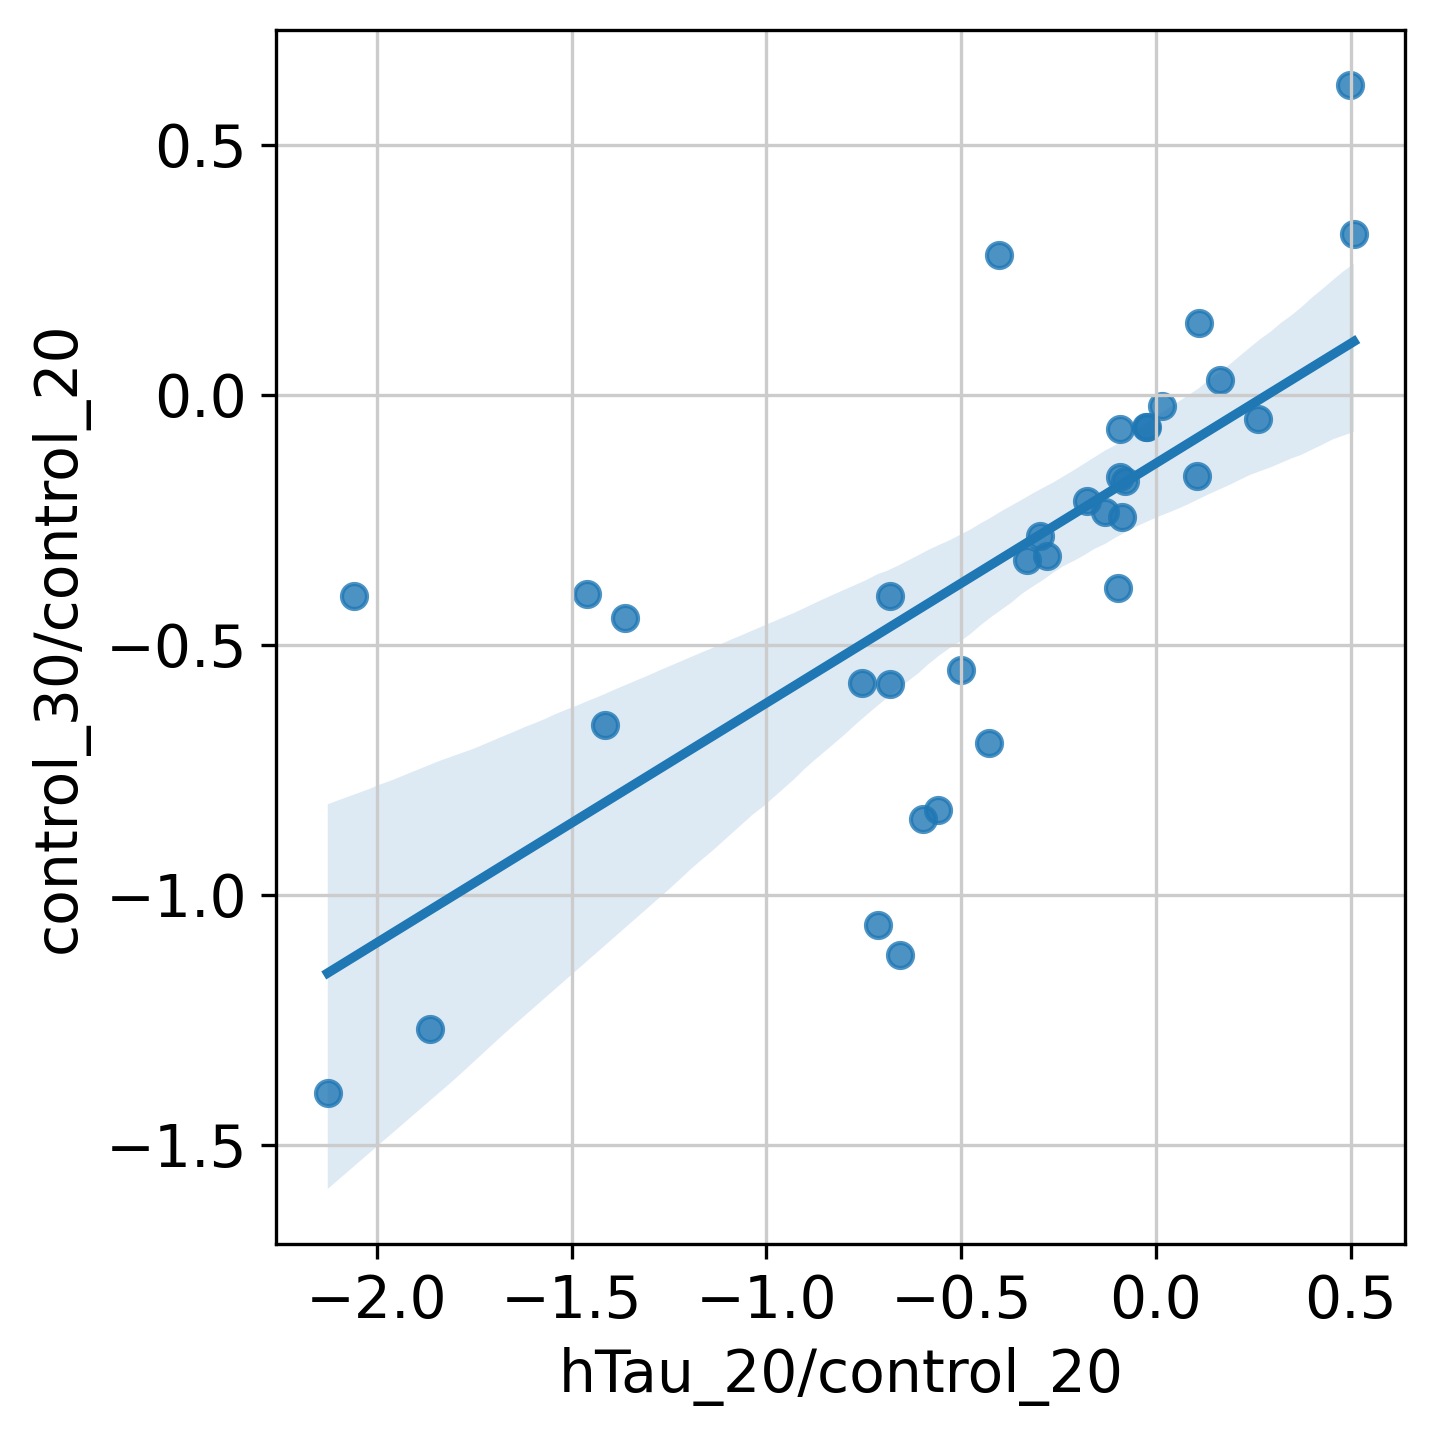

In [70]:
with rc_context({'figure.figsize': (5, 5)}):
    g = sns.regplot(x="hTau_20/control_20", y="control_30/control_20", data=umiN_mtx_body)
    # g = sns.lmplot(x="hTau_20/control_20", y="control_30/control_20", data=umiN_mtx_body)
    r, p = stats.pearsonr(umiN_mtx_body["hTau_20/control_20"], umiN_mtx_body['control_30/control_20'])

    # g.text(.02, .95, f'r={r:.2f}, p={p:.2g}', transform=g.transAxes) #  

    # texts = [plt.text(x=umiN_mtx_body['hTau_20/control_20'][n], y=umiN_mtx_body['control_30/control_20'][n], s=umiN_mtx_body.index[n], fontsize=5) 
    #          for n, cellType in enumerate(umiN_mtx_body.index) 
    #          if cellType in ['enterocyte of posterior adult midgut epithelium', 'choriogenic main body follicle cell and corpus luteum', 'adult fat body_body']]
    # adjust_text(texts, )
    plt.tight_layout()
    plt.savefig(f'{figure6PicFolder}/regression_umiN_mtx_body_correlation_noLabel.pdf', bbox_inches='tight')

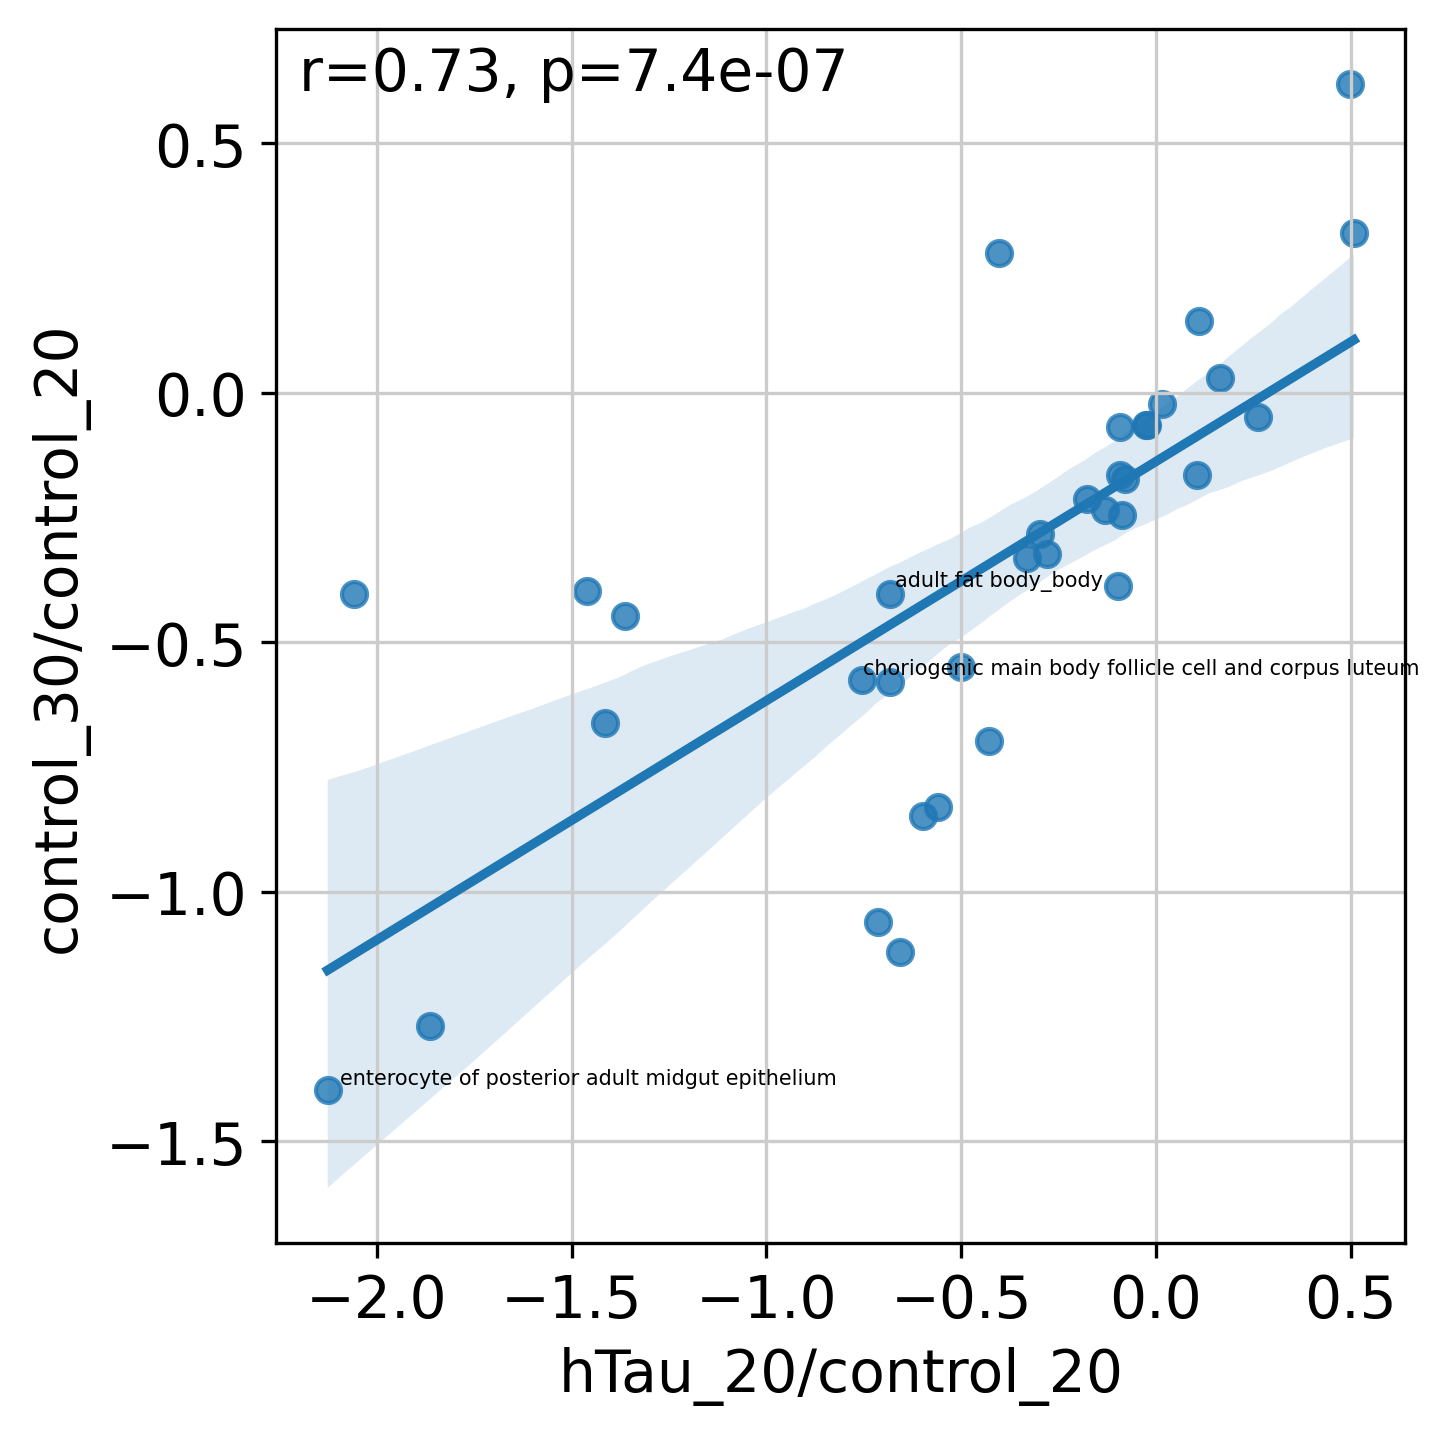

In [71]:
with rc_context({'figure.figsize': (5, 5)}):
    g = sns.regplot(x="hTau_20/control_20", y="control_30/control_20", data=umiN_mtx_body)
    # g = sns.lmplot(x="hTau_20/control_20", y="control_30/control_20", data=umiN_mtx_body)
    r, p = stats.pearsonr(umiN_mtx_body["hTau_20/control_20"], umiN_mtx_body['control_30/control_20'])

    g.text(.02, .95, f'r={r:.2f}, p={p:.2g}', transform=g.transAxes) #  
    # g.text(.02, .95, f'r2={r ** 2:.2f}, p={p:.2g}', transform=g.transAxes) # 


    texts = [plt.text(x=umiN_mtx_body['hTau_20/control_20'][n], y=umiN_mtx_body['control_30/control_20'][n], s=umiN_mtx_body.index[n], fontsize=5) 
             for n, cellType in enumerate(umiN_mtx_body.index) 
             if cellType in ['enterocyte of posterior adult midgut epithelium', 'choriogenic main body follicle cell and corpus luteum', 'adult fat body_body']]
    adjust_text(texts, )
    plt.tight_layout()
    plt.savefig(f'{figure6PicFolder}/regression_umiN_mtx_body_correlation.pdf', bbox_inches='tight')

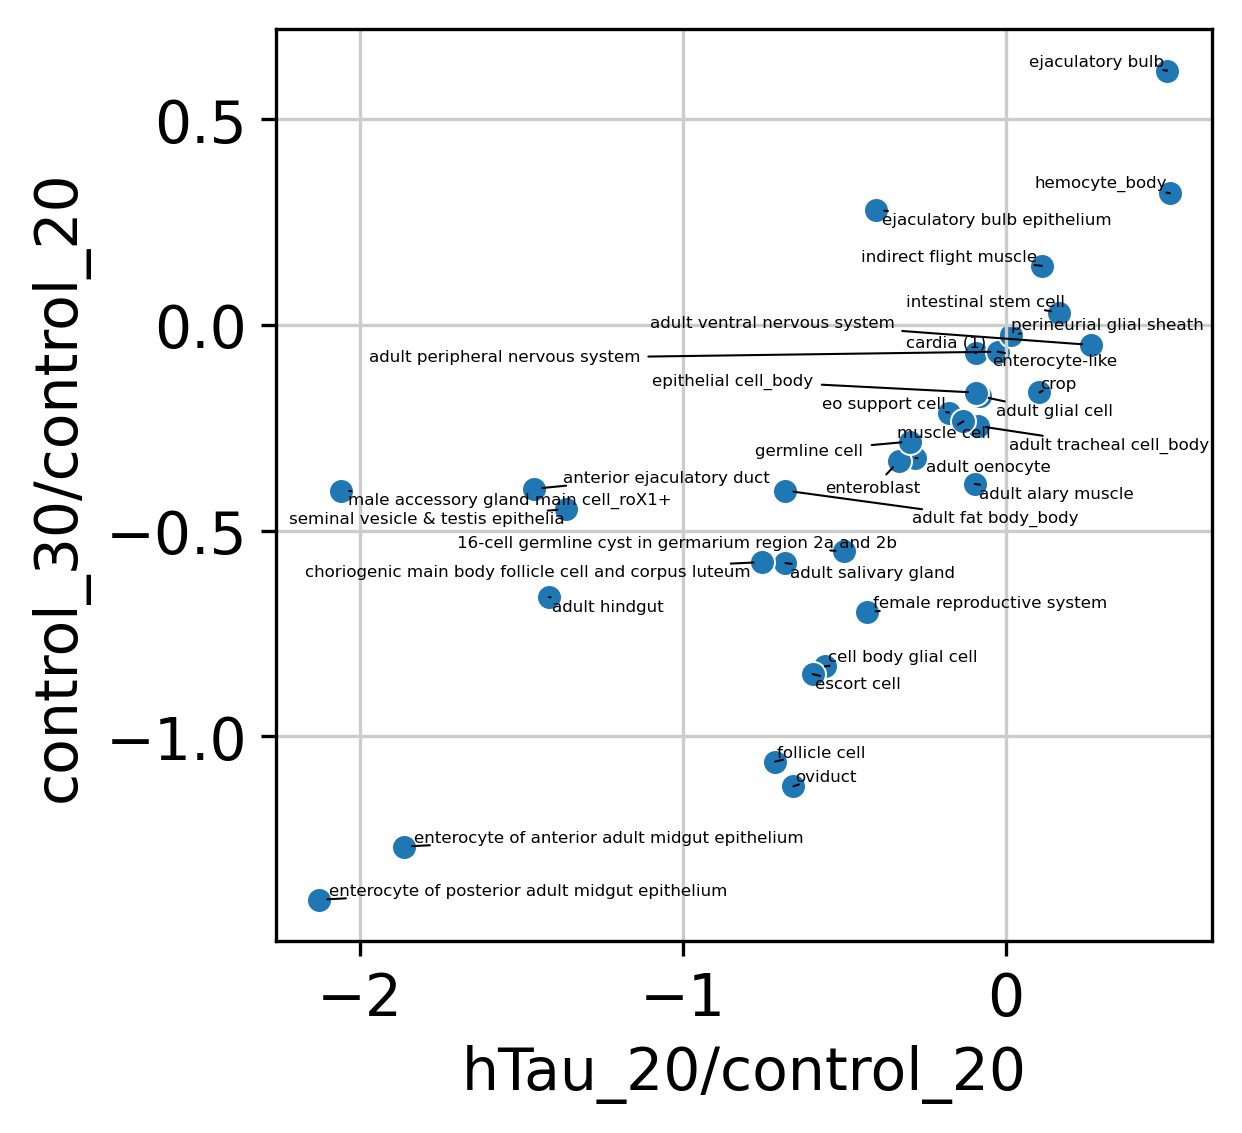

In [85]:
sns.scatterplot(data=umiN_mtx_body, x="hTau_20/control_20", y="control_30/control_20")
texts = [plt.text(x=umiN_mtx_body['hTau_20/control_20'][n], y=umiN_mtx_body['control_30/control_20'][n], s=umiN_mtx_body.index[n], fontsize=4) 
         for n, cellType in enumerate(umiN_mtx_body.index)]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5) ) # arrowprops=dict(arrowstyle='->', color='red') # arrowprops=dict(arrowstyle="-", color='k', lw=0.5)
plt.show()

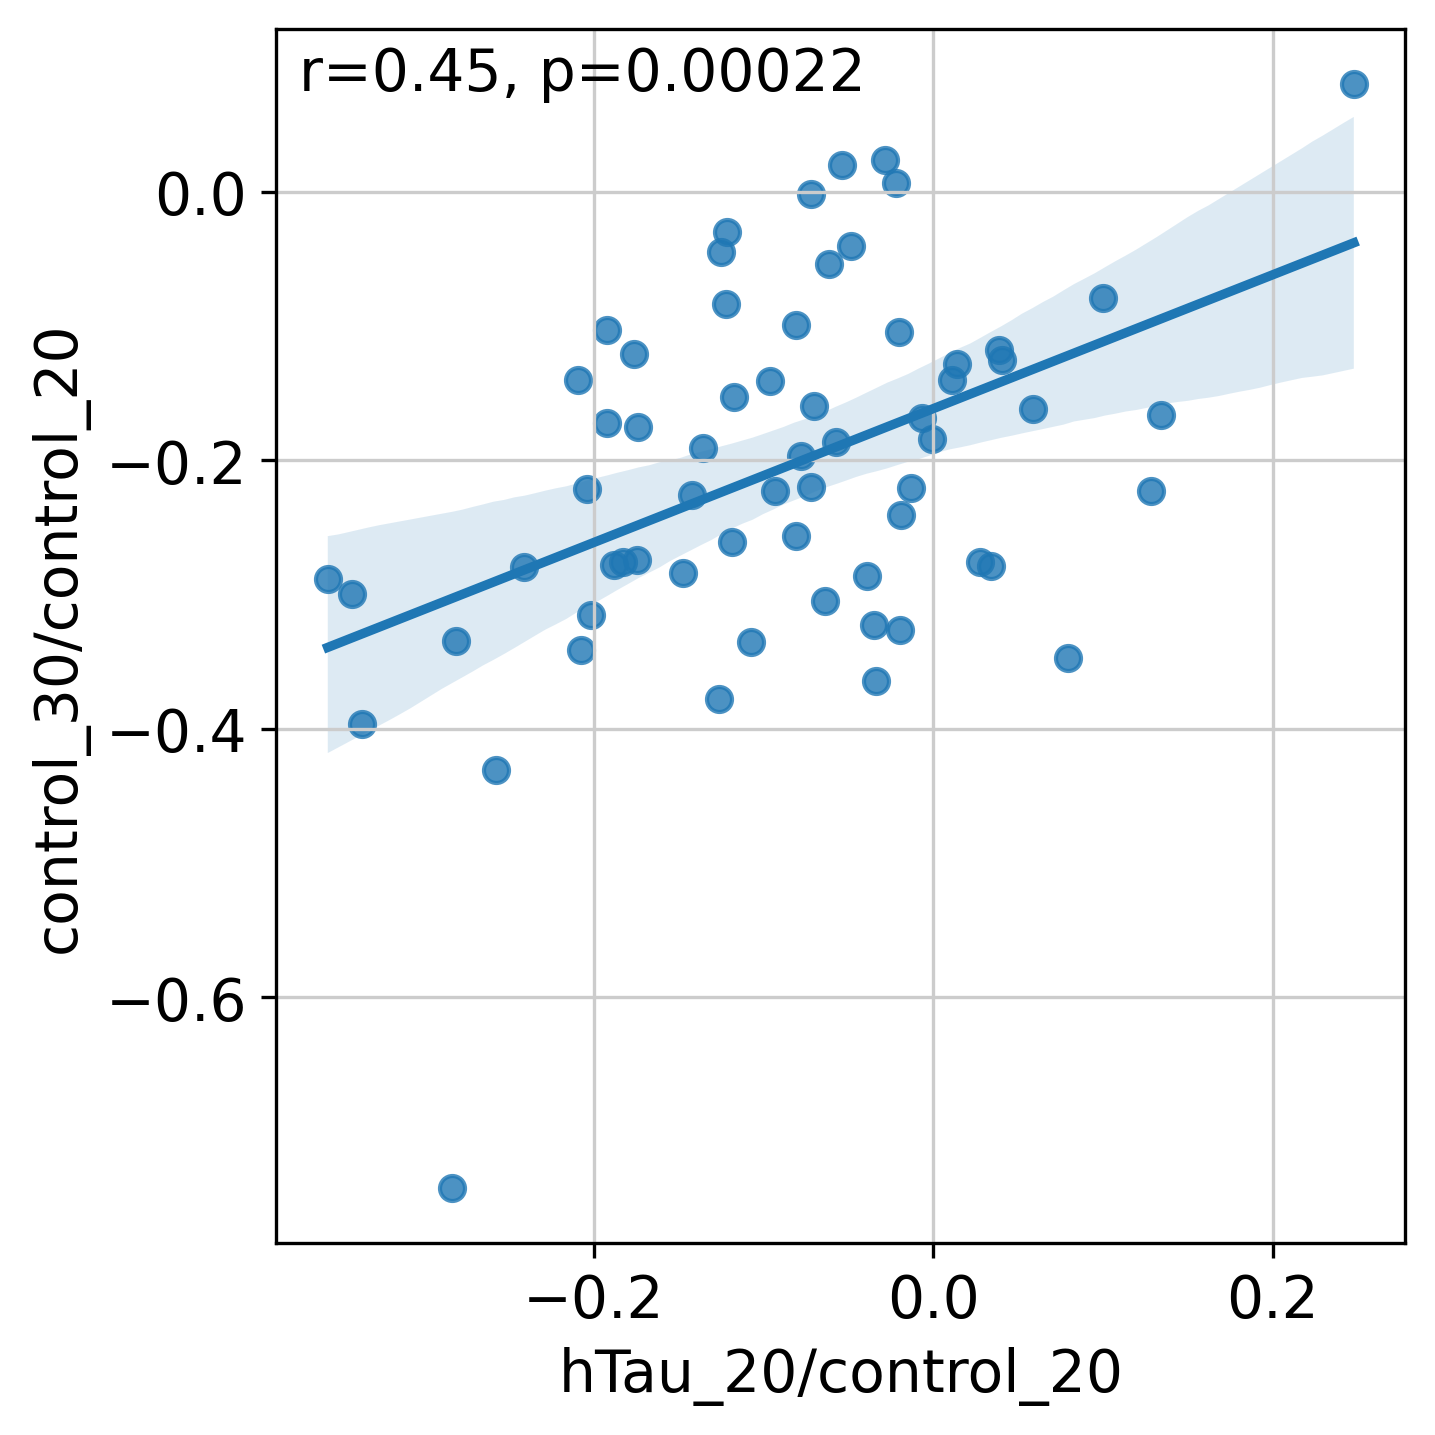

In [74]:
### head correlation

with rc_context({'figure.figsize': (5, 5)}):
    g = sns.regplot(x="hTau_20/control_20", y="control_30/control_20", data=umiN_mtx_head)
    # g = sns.lmplot(x="hTau_20/control_20", y="control_30/control_20", data=umiN_mtx_head)
    r, p = stats.pearsonr(umiN_mtx_head["hTau_20/control_20"], umiN_mtx_head['control_30/control_20'])

    g.text(.02, .95, f'r={r:.2f}, p={p:.2g}', transform=g.transAxes) #  

    # texts = [plt.text(x=umiN_mtx_head['hTau_20/control_20'][n], y=umiN_mtx_head['control_30/control_20'][n], s=umiN_mtx_head.index[n], fontsize=5) 
    #          for n, cellType in enumerate(umiN_mtx_head.index) 
    #          if cellType in ['enterocyte of posterior adult midgut epithelium', 'choriogenic main body follicle cell and corpus luteum', 'adult fat body_body']]
    # adjust_text(texts, )
    plt.tight_layout()
    plt.savefig(f'{figure6PicFolder}/regression_umiN_mtx_head_correlation_noLabel.pdf', bbox_inches='tight')

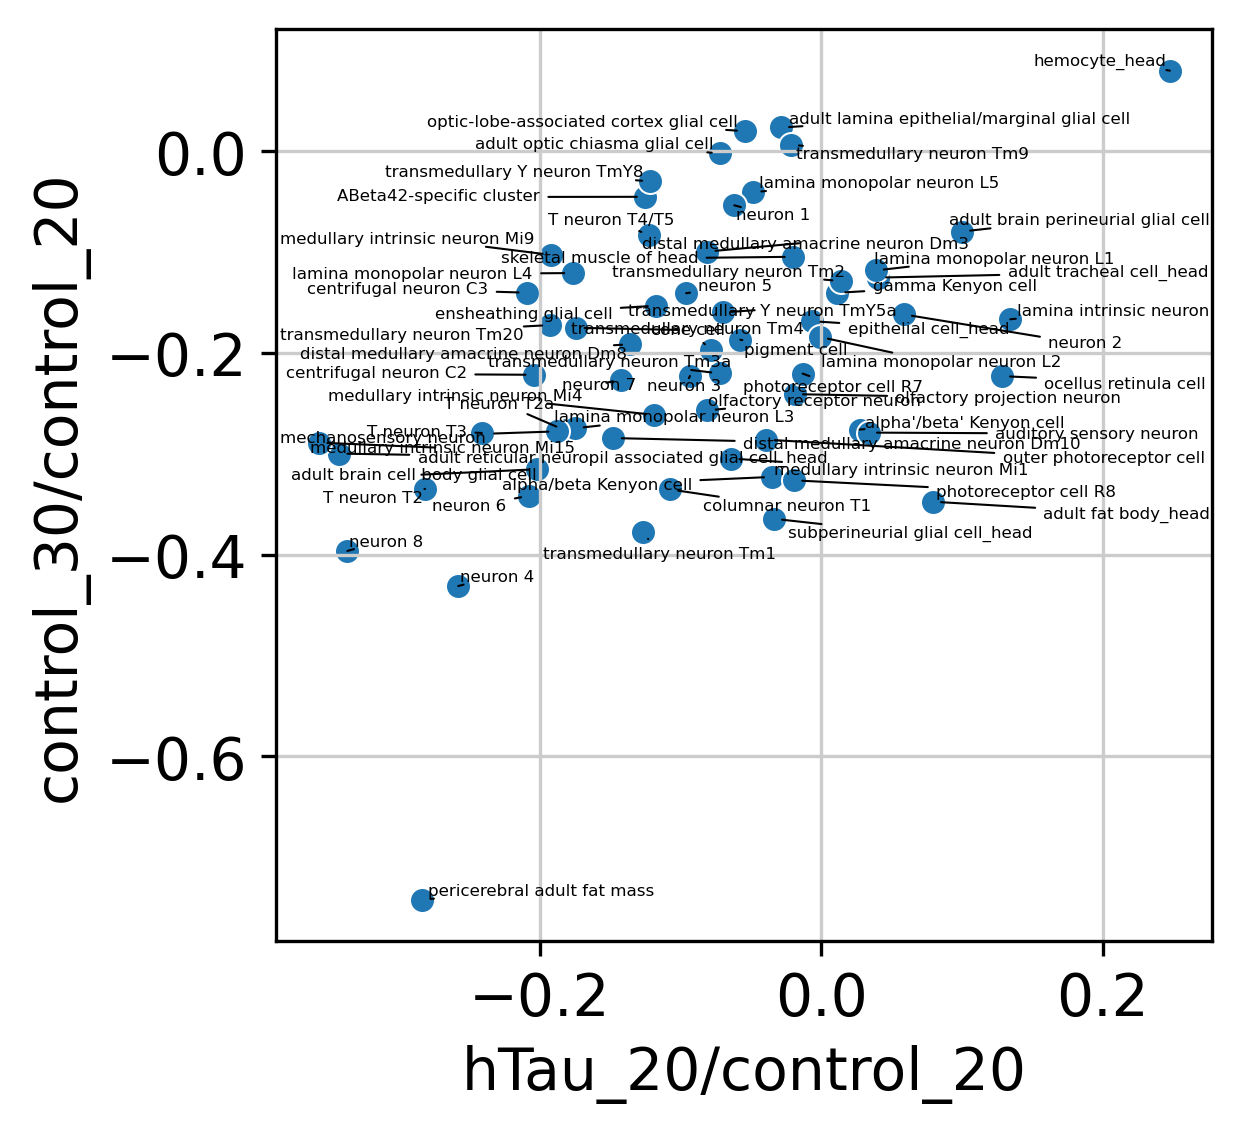

In [76]:
sns.scatterplot(data=umiN_mtx_head, x="hTau_20/control_20", y="control_30/control_20")
texts = [plt.text(x=umiN_mtx_head['hTau_20/control_20'][n], y=umiN_mtx_head['control_30/control_20'][n], s=umiN_mtx_head.index[n], fontsize=4) 
         for n, cellType in enumerate(umiN_mtx_head.index)]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5) ) # arrowprops=dict(arrowstyle='->', color='red') # arrowprops=dict(arrowstyle="-", color='k', lw=0.5)
plt.show()

### Plot pairwise geneN correlation

In [91]:
from scipy.stats import pearsonr
from scipy import stats

In [79]:
geneN_mtx_head = pd.read_csv(f'{geneNumFolder}/geneN_mtx_head.csv', index_col=0)
geneN_mtx_body = pd.read_csv(f'{geneNumFolder}/geneN_mtx_body.csv', index_col=0)
geneN_mtx_head

AB42_10/control_10  AB42_20/control_20  \
ABeta42-specific cluster              0.451258            0.424439   
T neuron T2                           0.032892           -0.085247   
T neuron T2a                          0.020780           -0.002953   
T neuron T3                           0.083861            0.043172   
T neuron T4/T5                        0.054862           -0.076816   
...                                        ...                 ...   
transmedullary neuron Tm2             0.131128            0.265590   
transmedullary neuron Tm20            0.116758           -0.035785   
transmedullary neuron Tm3a            0.095839            0.018034   
transmedullary neuron Tm4             0.054340            0.037243   
transmedullary neuron Tm9             0.191586            0.109842   

                            control_20/control_10  control_30/control_20  \
ABeta42-specific cluster                -0.151701              -0.064816   
T neuron T2                              0.032892              -0.292301   
T neuron T2a                             0.019306              -0.263034   
T neuron T3                              0.037290              -0.250120   
T neuron T4/T5                           0.065588              -0.076816   
...                                           ...                    ...   
transmedullary neuron Tm2               -0.189572              -0.072386   
transmedullary neuron Tm20               0.052348              -0.141687   
transmedullary neuron Tm3a              -0.053439              -0.202617   
transmedullary neuron Tm4               -0.050418              -0.172946   
transmedullary neuron Tm9               -0.074714               0.026505   

                            hTau_20/control_20  hTau_30/control_30  
ABeta42-specific cluster             -0.119507           -0.094583  
T neuron T2                          -0.237250            0.016200  
T neuron T2a                         -0.188857           -0.010660  
T neuron T3                          -0.196909            0.049188  
T neuron T4/T5                       -0.114884           -0.011315  
...                                        ...                 ...  
transmedullary neuron Tm2             0.003066           -0.014597  
transmedullary neuron Tm20           -0.155936           -0.046833  
transmedullary neuron Tm3a           -0.103430            0.042864  
transmedullary neuron Tm4            -0.161086           -0.039670  
transmedullary neuron Tm9            -0.030639           -0.060792  

[64 rows x 6 columns]

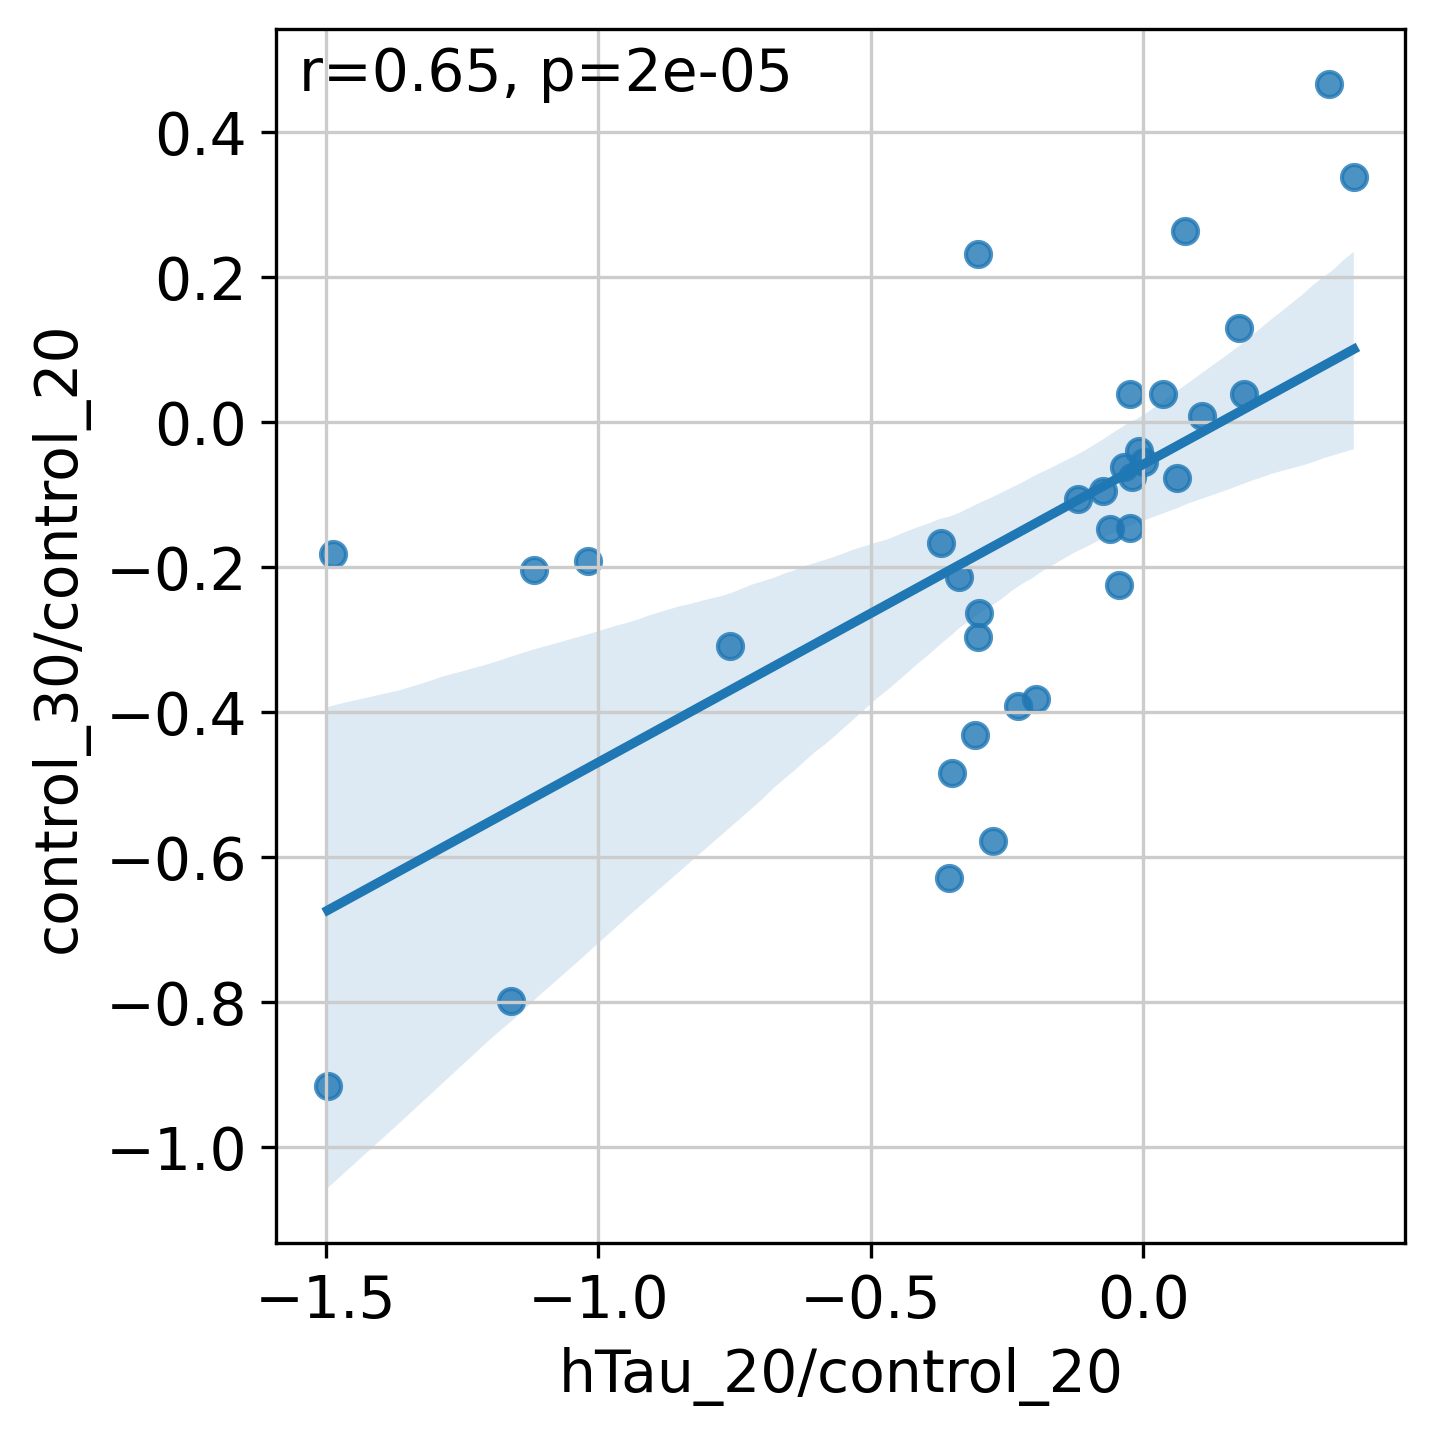

In [80]:
### body geneN
with rc_context({'figure.figsize': (5, 5)}):
    g = sns.regplot(x="hTau_20/control_20", y="control_30/control_20", data=geneN_mtx_body)
    # g = sns.lmplot(x="hTau_20/control_20", y="control_30/control_20", data=geneN_mtx_body)
    r, p = stats.pearsonr(geneN_mtx_body["hTau_20/control_20"], geneN_mtx_body['control_30/control_20'])

    g.text(.02, .95, f'r={r:.2f}, p={p:.2g}', transform=g.transAxes) #  

    # texts = [plt.text(x=geneN_mtx_body['hTau_20/control_20'][n], y=geneN_mtx_body['control_30/control_20'][n], s=geneN_mtx_body.index[n], fontsize=5) 
    #          for n, cellType in enumerate(geneN_mtx_body.index) 
    #          if cellType in ['enterocyte of posterior adult midgut epithelium', 'choriogenic main body follicle cell and corpus luteum', 'adult fat body_body']]
    # adjust_text(texts, )
    plt.tight_layout()
    plt.savefig(f'{figure6PicFolder}/regression_geneN_mtx_body_correlation_noLabel.pdf', bbox_inches='tight')

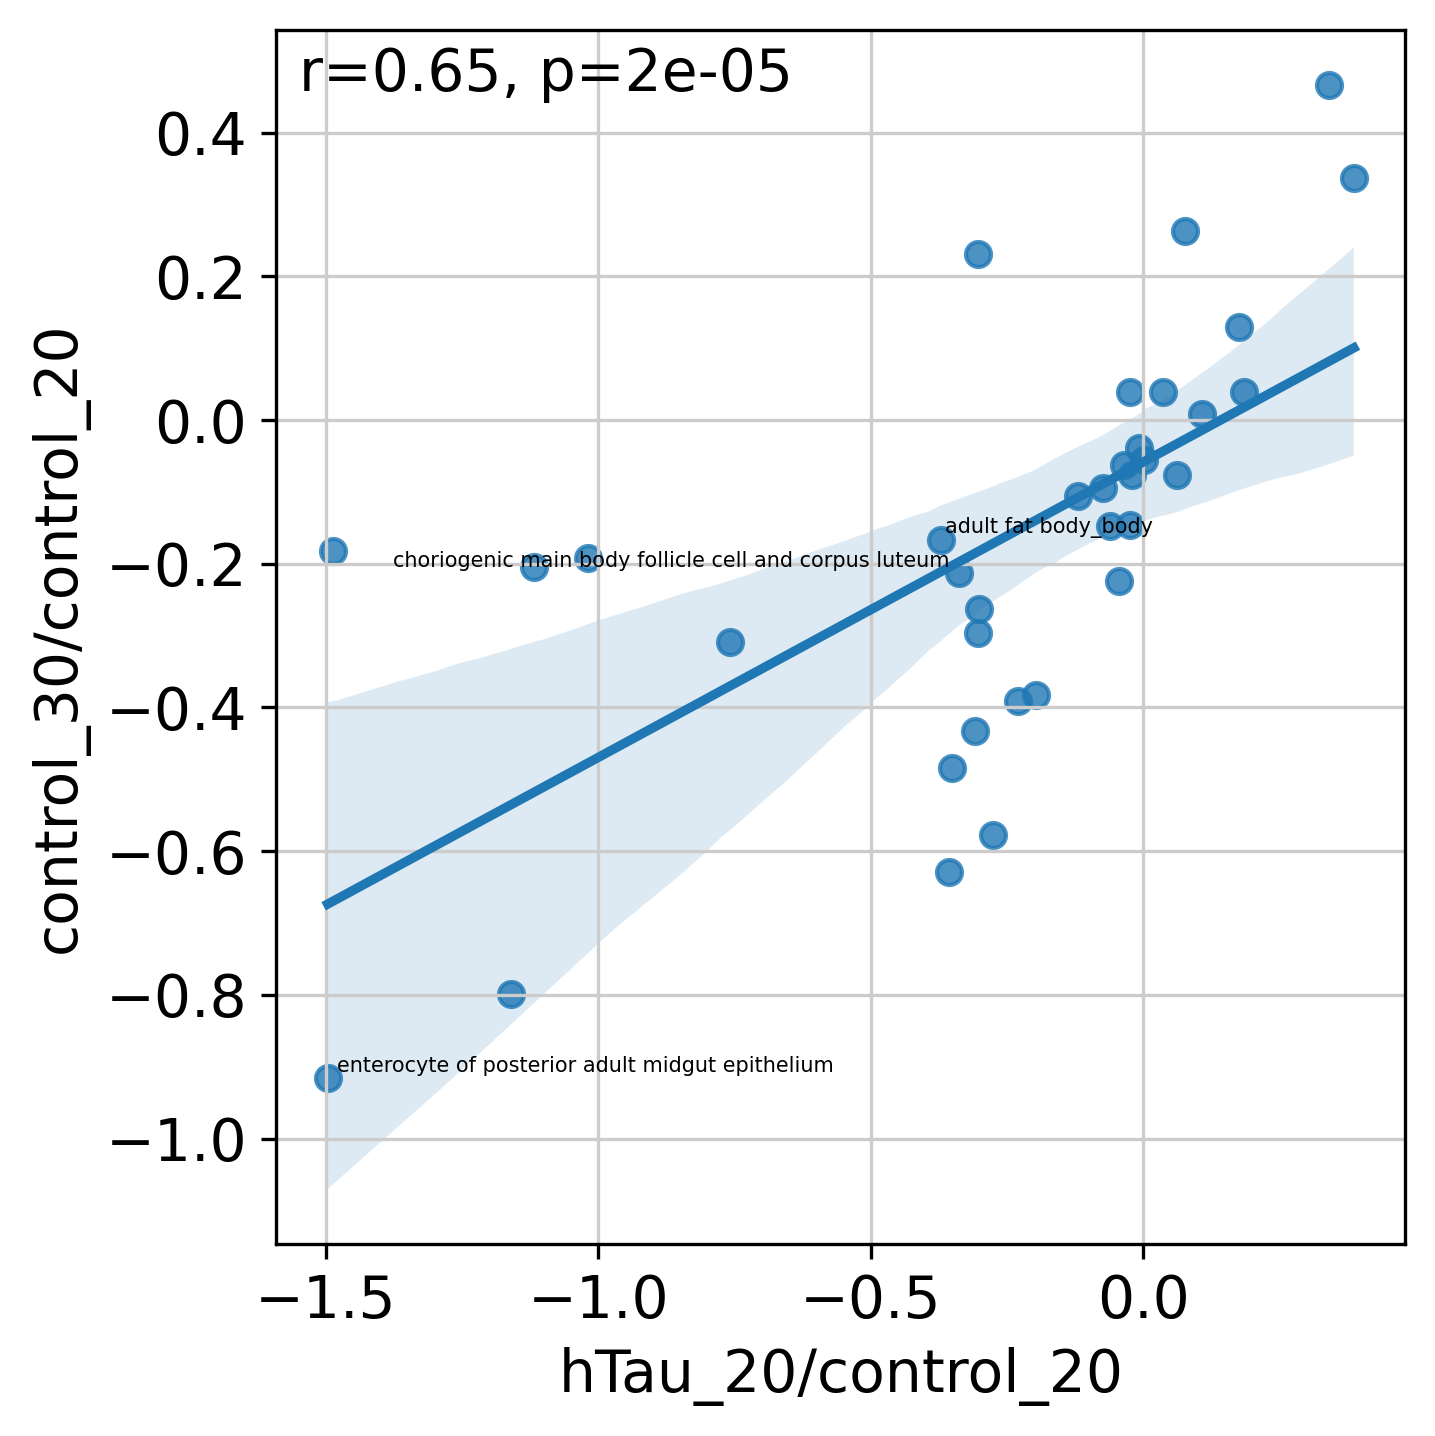

In [81]:
### body geneN with three annotations
with rc_context({'figure.figsize': (5, 5)}):
    g = sns.regplot(x="hTau_20/control_20", y="control_30/control_20", data=geneN_mtx_body)
    # g = sns.lmplot(x="hTau_20/control_20", y="control_30/control_20", data=geneN_mtx_body)
    r, p = stats.pearsonr(geneN_mtx_body["hTau_20/control_20"], geneN_mtx_body['control_30/control_20'])

    g.text(.02, .95, f'r={r:.2f}, p={p:.2g}', transform=g.transAxes) #  
    # g.text(.02, .95, f'r2={r ** 2:.2f}, p={p:.2g}', transform=g.transAxes) # 


    texts = [plt.text(x=geneN_mtx_body['hTau_20/control_20'][n], y=geneN_mtx_body['control_30/control_20'][n], s=geneN_mtx_body.index[n], fontsize=5) 
             for n, cellType in enumerate(geneN_mtx_body.index) 
             if cellType in ['enterocyte of posterior adult midgut epithelium', 'choriogenic main body follicle cell and corpus luteum', 'adult fat body_body']]
    adjust_text(texts, )
    plt.tight_layout()
    plt.savefig(f'{figure6PicFolder}/regression_geneN_mtx_body_correlation.pdf', bbox_inches='tight')

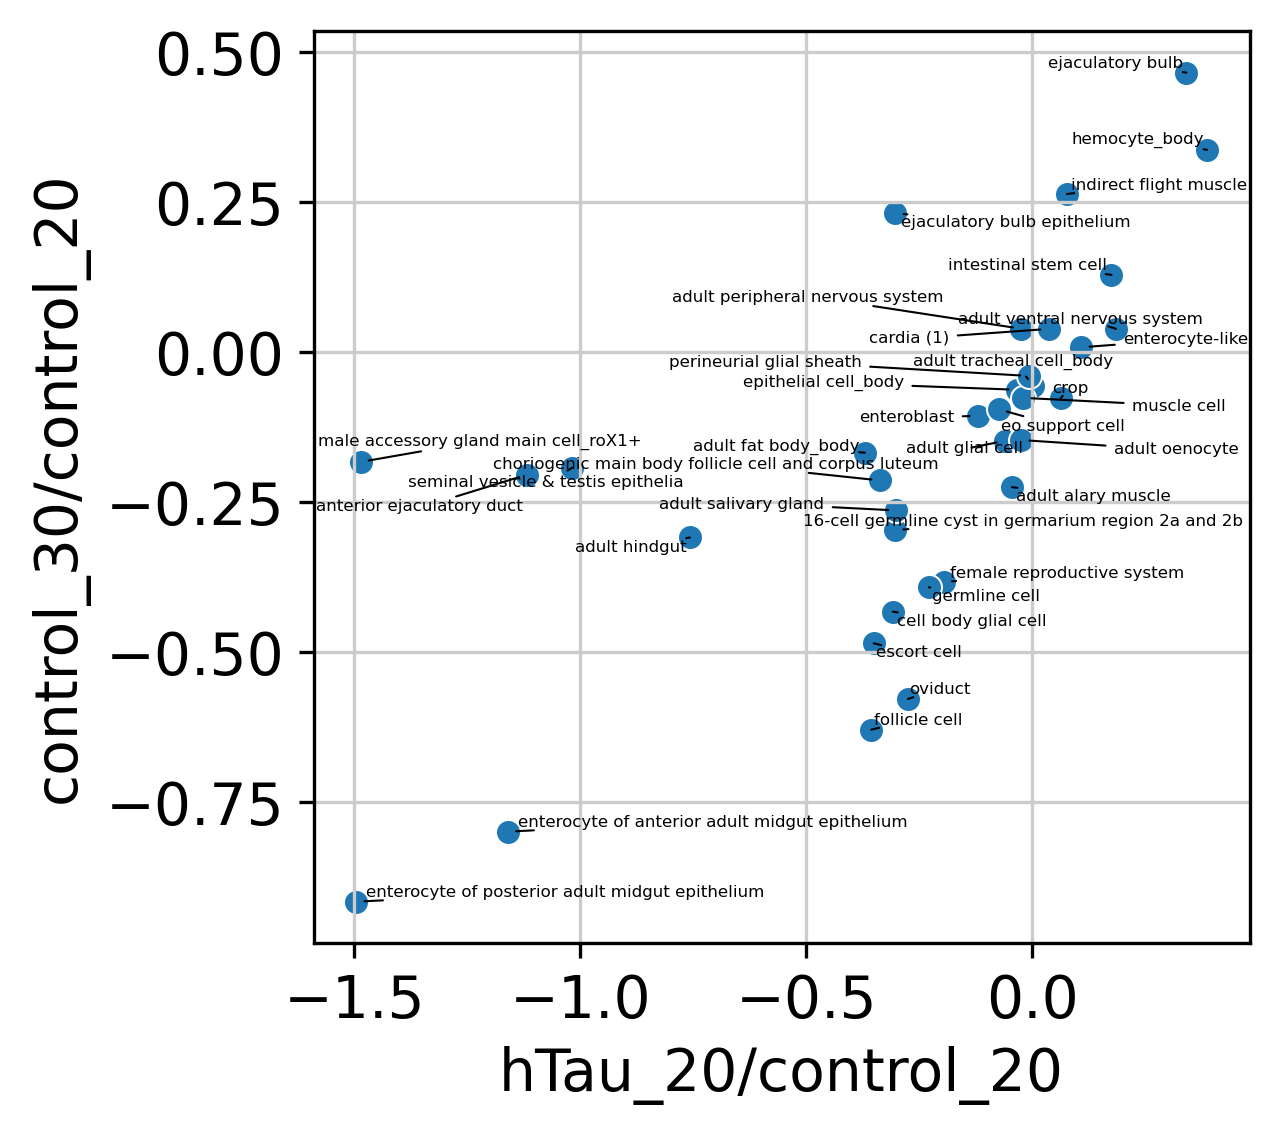

In [82]:
sns.scatterplot(data=geneN_mtx_body, x="hTau_20/control_20", y="control_30/control_20")
texts = [plt.text(x=geneN_mtx_body['hTau_20/control_20'][n], y=geneN_mtx_body['control_30/control_20'][n], s=geneN_mtx_body.index[n], fontsize=4) 
         for n, cellType in enumerate(geneN_mtx_body.index)]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5) ) # arrowprops=dict(arrowstyle='->', color='red') # arrowprops=dict(arrowstyle="-", color='k', lw=0.5)
plt.show()

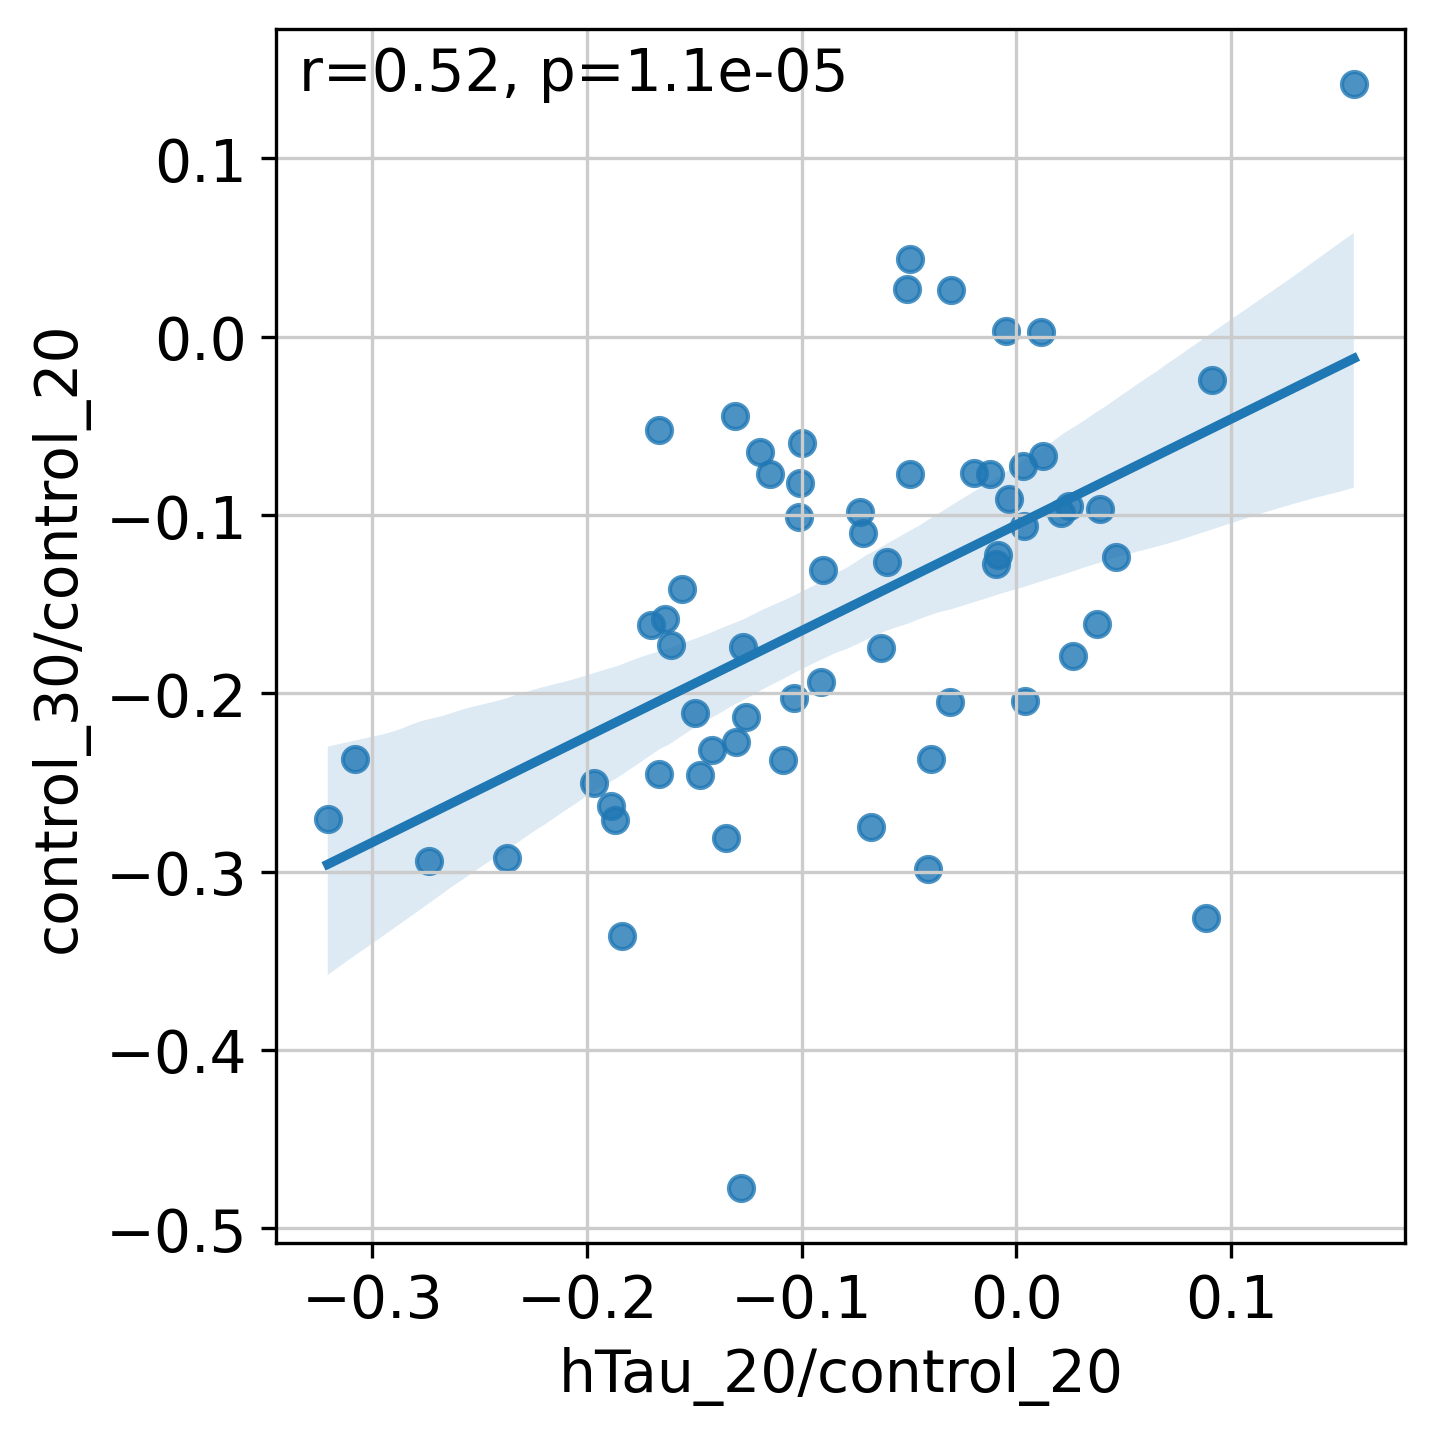

In [83]:
### head correlation

with rc_context({'figure.figsize': (5, 5)}):
    g = sns.regplot(x="hTau_20/control_20", y="control_30/control_20", data=geneN_mtx_head)
    # g = sns.lmplot(x="hTau_20/control_20", y="control_30/control_20", data=geneN_mtx_head)
    r, p = stats.pearsonr(geneN_mtx_head["hTau_20/control_20"], geneN_mtx_head['control_30/control_20'])

    g.text(.02, .95, f'r={r:.2f}, p={p:.2g}', transform=g.transAxes) #  

    # texts = [plt.text(x=geneN_mtx_head['hTau_20/control_20'][n], y=geneN_mtx_head['control_30/control_20'][n], s=geneN_mtx_head.index[n], fontsize=5) 
    #          for n, cellType in enumerate(geneN_mtx_head.index) 
    #          if cellType in ['enterocyte of posterior adult midgut epithelium', 'choriogenic main body follicle cell and corpus luteum', 'adult fat body_body']]
    # adjust_text(texts, )
    plt.tight_layout()
    plt.savefig(f'{figure6PicFolder}/regression_geneN_mtx_head_correlation_noLabel.pdf', bbox_inches='tight')

# Fig 6C: UMI#/gene# correlation

### geneN correlation

In [45]:
geneN_Df = pd.read_csv(f'{geneNumFolder}/geneNum_genoAgeCompareName.csv')
geneN_sort_Df = pd.read_csv(f'{geneNumFolder}/geneN_sort_Df_genoAgeCompare_wilcoxon.csv')
geneN_sort_Df

genoAgeCompare                                       annotation  \
0        hTau_20/control_20                                    hemocyte_body   
1        hTau_20/control_20                                 ejaculatory bulb   
2        hTau_20/control_20                     adult ventral nervous system   
3        hTau_20/control_20                             intestinal stem cell   
4        hTau_20/control_20                                    hemocyte_head   
...                     ...                                              ...   
1219  control_20/control_10               seminal vesicle & testis epithelia   
1220  control_20/control_10                        anterior ejaculatory duct   
1221  control_20/control_10   enterocyte of anterior adult midgut epithelium   
1222  control_20/control_10             male accessory gland main cell_roX1+   
1223  control_20/control_10  enterocyte of posterior adult midgut epithelium   

           ratioType  log2Ratio  ranksumsTwoSides_stat  \
0     genenLog2Ratio   0.386481              13.802174   
1     genenLog2Ratio   0.340979               6.727306   
2     genenLog2Ratio   0.185075               9.276021   
3     genenLog2Ratio   0.175012               5.037615   
4     genenLog2Ratio   0.157135               8.031052   
...              ...        ...                    ...   
1219    umiLog2Ratio  -0.066939              -1.419655   
1220    umiLog2Ratio  -0.596953              -8.198830   
1221    umiLog2Ratio  -0.256904              -0.884019   
1222    umiLog2Ratio  -0.012971              -0.489433   
1223    umiLog2Ratio  -0.072782              -0.341195   

      ranksumsTwoSides_pvalue  ranksumsGreater_stat  ranksumsGreater_pvalue  \
0                2.472802e-43             13.802174            1.236401e-43   
1                1.728336e-11              6.727306            8.641681e-12   
2                1.759253e-20              9.276021            8.796264e-21   
3                4.713694e-07              5.037615            2.356847e-07   
4                9.664037e-16              8.031052            4.832019e-16   
...                       ...                   ...                     ...   
1219             1.557081e-01             -1.419655            9.221460e-01   
1220             2.427389e-16             -8.198830            1.000000e+00   
1221             3.766860e-01             -0.884019            8.116570e-01   
1222             6.245353e-01             -0.489433            6.877324e-01   
1223             7.329569e-01             -0.341195            6.335216e-01   

      ranksumsLess_stat  ranksumsLess_pvalue  
0             13.802174         1.000000e+00  
1              6.727306         1.000000e+00  
2              9.276021         1.000000e+00  
3              5.037615         9.999998e-01  
4              8.031052         1.000000e+00  
...                 ...                  ...  
1219          -1.419655         7.785404e-02  
1220          -8.198830         1.213694e-16  
1221          -0.884019         1.883430e-01  
1222          -0.489433         3.122676e-01  
1223          -0.341195         3.664784e-01  

[1224 rows x 10 columns]

In [46]:
geneN_sort_Df.head()

genoAgeCompare                    annotation       ratioType  \
0  hTau_20/control_20                 hemocyte_body  genenLog2Ratio   
1  hTau_20/control_20              ejaculatory bulb  genenLog2Ratio   
2  hTau_20/control_20  adult ventral nervous system  genenLog2Ratio   
3  hTau_20/control_20          intestinal stem cell  genenLog2Ratio   
4  hTau_20/control_20                 hemocyte_head  genenLog2Ratio   

   log2Ratio  ranksumsTwoSides_stat  ranksumsTwoSides_pvalue  \
0   0.386481              13.802174             2.472802e-43   
1   0.340979               6.727306             1.728336e-11   
2   0.185075               9.276021             1.759253e-20   
3   0.175012               5.037615             4.713694e-07   
4   0.157135               8.031052             9.664037e-16   

   ranksumsGreater_stat  ranksumsGreater_pvalue  ranksumsLess_stat  \
0             13.802174            1.236401e-43          13.802174   
1              6.727306            8.641681e-12           6.727306   
2              9.276021            8.796264e-21           9.276021   
3              5.037615            2.356847e-07           5.037615   
4              8.031052            4.832019e-16           8.031052   

   ranksumsLess_pvalue  
0                  1.0  
1                  1.0  
2                  1.0  
3                  1.0  
4                  1.0

In [47]:
geneN_mtx = geneN_sort_Df[geneN_sort_Df.ratioType == 'genenLog2Ratio'].loc[:,['genoAgeCompare','annotation','log2Ratio']].pivot(index='annotation', columns='genoAgeCompare') #
geneN_mtx.index.name = None
geneN_mtx.columns = [colIndex[1] for colIndex in geneN_mtx.columns.to_list()]
geneN_mtx

AB42_10/control_10  \
16-cell germline cyst in germarium region 2a an...           -0.113751   
ABeta42-specific cluster                                      0.447278   
T neuron T2                                                   0.032892   
T neuron T2a                                                  0.022276   
T neuron T3                                                   0.083861   
...                                                                ...   
transmedullary neuron Tm2                                     0.131128   
transmedullary neuron Tm20                                    0.116758   
transmedullary neuron Tm3a                                    0.097297   
transmedullary neuron Tm4                                     0.057257   
transmedullary neuron Tm9                                     0.194977   

                                                    AB42_20/control_20  \
16-cell germline cyst in germarium region 2a an...            0.069348   
ABeta42-specific cluster                                      0.470179   
T neuron T2                                                  -0.080806   
T neuron T2a                                                  0.000000   
T neuron T3                                                   0.051963   
...                                                                ...   
transmedullary neuron Tm2                                     0.265590   
transmedullary neuron Tm20                                   -0.035785   
transmedullary neuron Tm3a                                    0.025509   
transmedullary neuron Tm4                                     0.037243   
transmedullary neuron Tm9                                     0.109842   

                                                    control_20/control_10  \
16-cell germline cyst in germarium region 2a an...               0.065684   
ABeta42-specific cluster                                        -0.200819   
T neuron T2                                                      0.028451   
T neuron T2a                                                     0.017848   
T neuron T3                                                      0.028499   
...                                                                   ...   
transmedullary neuron Tm2                                       -0.189572   
transmedullary neuron Tm20                                       0.052348   
transmedullary neuron Tm3a                                      -0.053494   
transmedullary neuron Tm4                                       -0.047500   
transmedullary neuron Tm9                                       -0.071323   

                                                    control_30/control_20  \
16-cell germline cyst in germarium region 2a an...              -0.296201   
ABeta42-specific cluster                                        -0.015699   
T neuron T2                                                     -0.275244   
T neuron T2a                                                    -0.263626   
T neuron T3                                                     -0.241329   
...                                                                   ...   
transmedullary neuron Tm2                                       -0.069162   
transmedullary neuron Tm20                                      -0.141687   
transmedullary neuron Tm3a                                      -0.208082   
transmedullary neuron Tm4                                       -0.172946   
transmedullary neuron Tm9                                        0.026505   

                                                    hTau_20/control_20  \
16-cell germline cyst in germarium region 2a an...           -0.303770   
ABeta42-specific cluster                                     -0.070389   
T neuron T2                                                  -0.232809   
T neuron T2a                                                 -0.189270   
T neuron T3                                           

In [48]:
geneN_mtx_head = geneN_mtx[geneN_mtx.index.isin(adata_head.obs.adfca_annotation.cat.categories)]
geneN_mtx_body = geneN_mtx[geneN_mtx.index.isin(adata_body.obs.adfca_annotation.cat.categories)]

In [49]:
geneN_mtx_head.to_csv(f'{geneNumFolder}/geneN_mtx_head.csv')
geneN_mtx_body.to_csv(f'{geneNumFolder}/geneN_mtx_body.csv')

In [50]:
### body geneN correlation
corr = geneN_mtx_body.corr(method = 'spearman').round(2)
corr

AB42_10/control_10  AB42_20/control_20  \
AB42_10/control_10                   1.00                0.08   
AB42_20/control_20                   0.08                1.00   
control_20/control_10                0.15               -0.10   
control_30/control_20                0.50                0.27   
hTau_20/control_20                   0.13                0.28   
hTau_30/control_30                  -0.31               -0.02   

                       control_20/control_10  control_30/control_20  \
AB42_10/control_10                      0.15                   0.50   
AB42_20/control_20                     -0.10                   0.27   
control_20/control_10                   1.00                  -0.02   
control_30/control_20                  -0.02                   1.00   
hTau_20/control_20                     -0.04                   0.79   
hTau_30/control_30                      0.27                   0.07   

                       hTau_20/control_20  hTau_30/control_30  
AB42_10/control_10                   0.13               -0.31  
AB42_20/control_20                   0.28               -0.02  
control_20/control_10               -0.04                0.27  
control_30/control_20                0.79                0.07  
hTau_20/control_20                   1.00                0.35  
hTau_30/control_30                   0.35                1.00

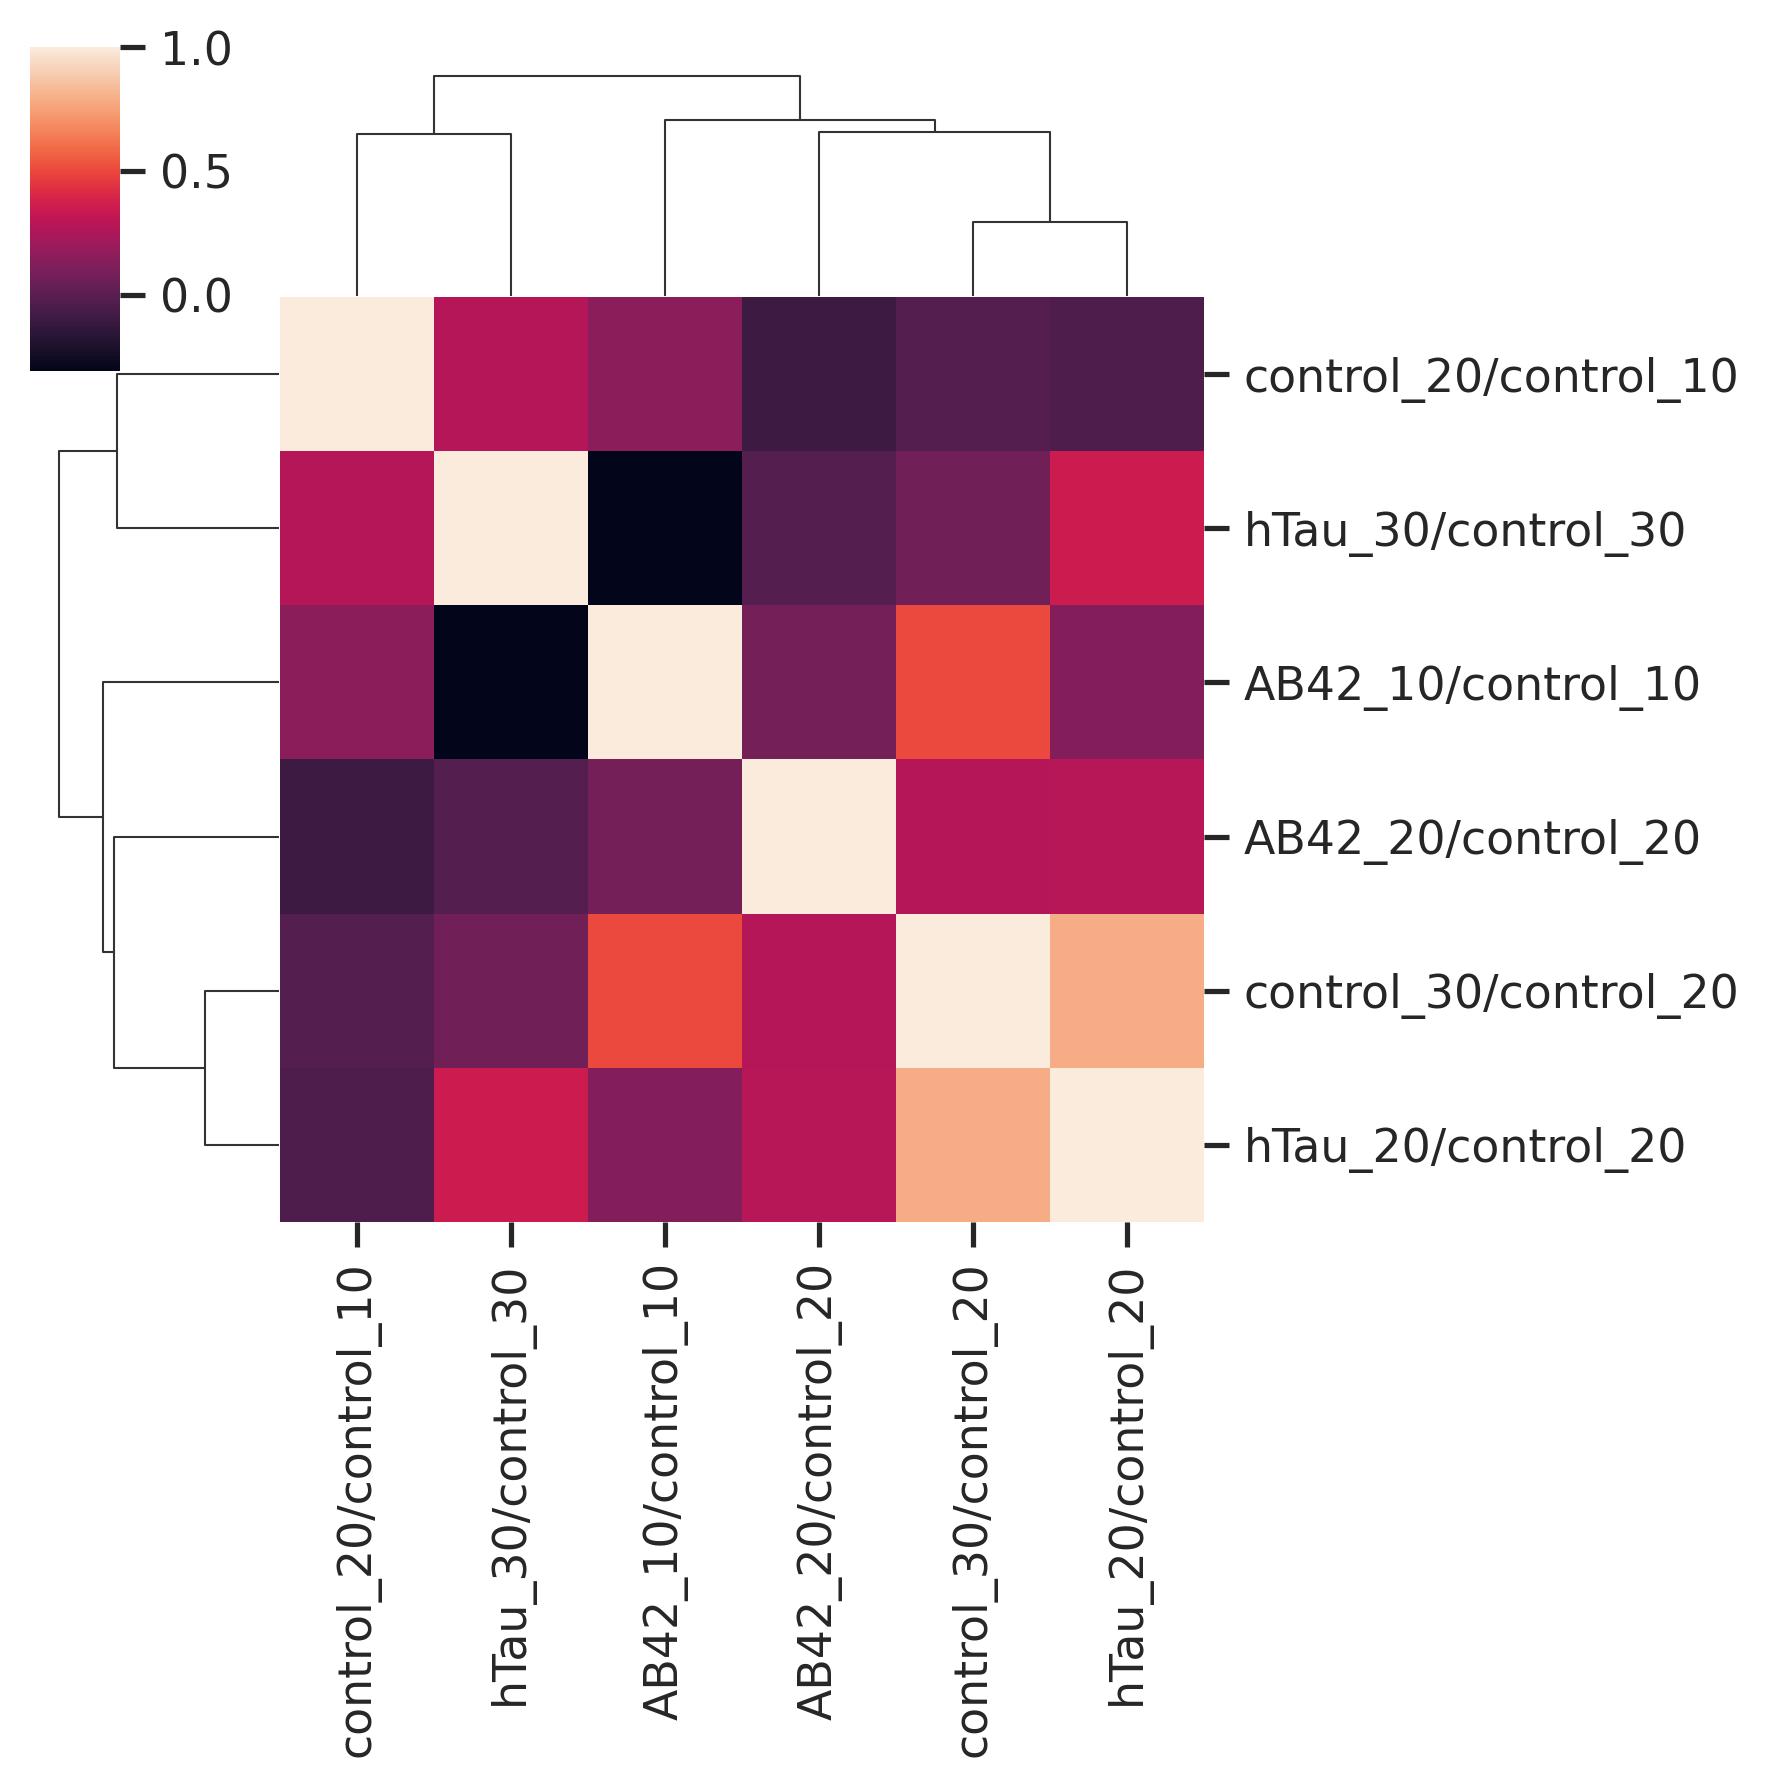

In [51]:
sns.clustermap(corr, figsize=(6, 6), annot=False)
plt.savefig(f'{figure6PicFolder}/heatmap_geneN_mtx_body_geneN.pdf', bbox_inches='tight')
plt.show()

In [52]:
### geneN_mtx_head correlation
corr = geneN_mtx_head.corr(method = 'spearman').round(2)
corr

AB42_10/control_10  AB42_20/control_20  \
AB42_10/control_10                   1.00                0.33   
AB42_20/control_20                   0.33                1.00   
control_20/control_10                0.10               -0.60   
control_30/control_20                0.05                0.31   
hTau_20/control_20                  -0.04                0.64   
hTau_30/control_30                  -0.09                0.15   

                       control_20/control_10  control_30/control_20  \
AB42_10/control_10                      0.10                   0.05   
AB42_20/control_20                     -0.60                   0.31   
control_20/control_10                   1.00                  -0.05   
control_30/control_20                  -0.05                   1.00   
hTau_20/control_20                     -0.60                   0.52   
hTau_30/control_30                     -0.24                  -0.36   

                       hTau_20/control_20  hTau_30/control_30  
AB42_10/control_10                  -0.04               -0.09  
AB42_20/control_20                   0.64                0.15  
control_20/control_10               -0.60               -0.24  
control_30/control_20                0.52               -0.36  
hTau_20/control_20                   1.00                0.17  
hTau_30/control_30                   0.17                1.00

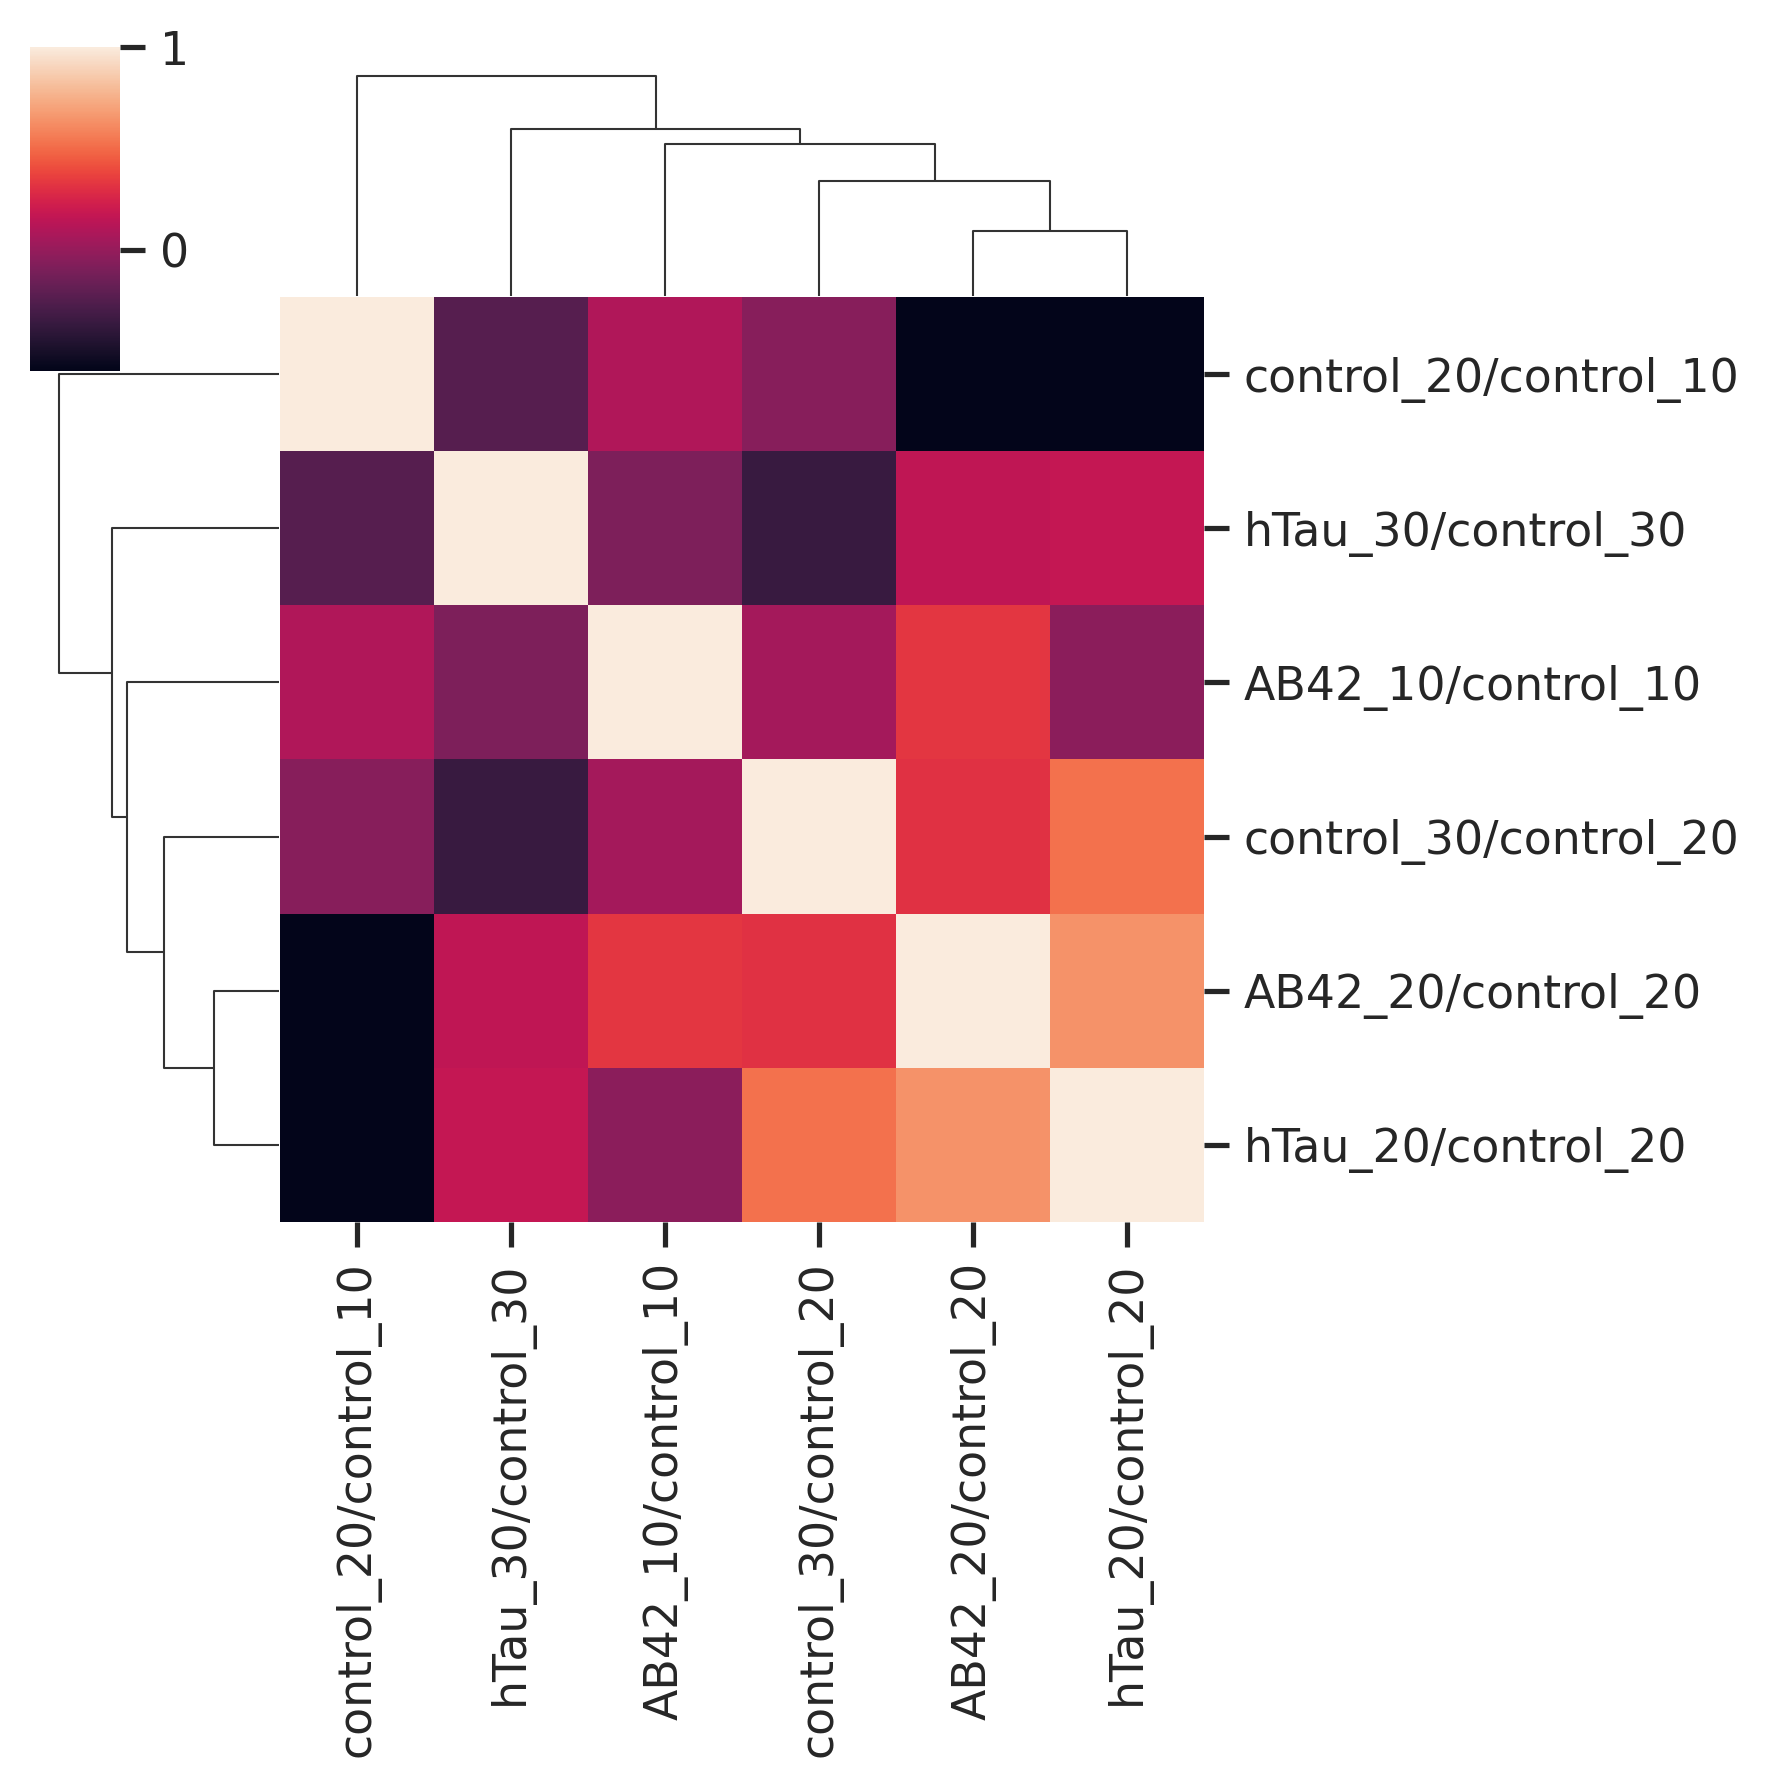

In [53]:
sns.clustermap(corr, figsize=(6, 6), annot=False)
plt.savefig(f'{figure6PicFolder}/heatmap_geneN_mtx_head_geneN.pdf', bbox_inches='tight')
plt.show()

### umi# correlation

In [54]:
geneN_Df = pd.read_csv(f'{geneNumFolder}/geneNum_genoAgeCompareName.csv')
geneN_sort_Df = pd.read_csv(f'{geneNumFolder}/geneN_sort_Df_genoAgeCompare_wilcoxon.csv')
geneN_sort_Df

genoAgeCompare                                       annotation  \
0        hTau_20/control_20                                    hemocyte_body   
1        hTau_20/control_20                                 ejaculatory bulb   
2        hTau_20/control_20                     adult ventral nervous system   
3        hTau_20/control_20                             intestinal stem cell   
4        hTau_20/control_20                                    hemocyte_head   
...                     ...                                              ...   
1219  control_20/control_10               seminal vesicle & testis epithelia   
1220  control_20/control_10                        anterior ejaculatory duct   
1221  control_20/control_10   enterocyte of anterior adult midgut epithelium   
1222  control_20/control_10             male accessory gland main cell_roX1+   
1223  control_20/control_10  enterocyte of posterior adult midgut epithelium   

           ratioType  log2Ratio  ranksumsTwoSides_stat  \
0     genenLog2Ratio   0.386481              13.802174   
1     genenLog2Ratio   0.340979               6.727306   
2     genenLog2Ratio   0.185075               9.276021   
3     genenLog2Ratio   0.175012               5.037615   
4     genenLog2Ratio   0.157135               8.031052   
...              ...        ...                    ...   
1219    umiLog2Ratio  -0.066939              -1.419655   
1220    umiLog2Ratio  -0.596953              -8.198830   
1221    umiLog2Ratio  -0.256904              -0.884019   
1222    umiLog2Ratio  -0.012971              -0.489433   
1223    umiLog2Ratio  -0.072782              -0.341195   

      ranksumsTwoSides_pvalue  ranksumsGreater_stat  ranksumsGreater_pvalue  \
0                2.472802e-43             13.802174            1.236401e-43   
1                1.728336e-11              6.727306            8.641681e-12   
2                1.759253e-20              9.276021            8.796264e-21   
3                4.713694e-07              5.037615            2.356847e-07   
4                9.664037e-16              8.031052            4.832019e-16   
...                       ...                   ...                     ...   
1219             1.557081e-01             -1.419655            9.221460e-01   
1220             2.427389e-16             -8.198830            1.000000e+00   
1221             3.766860e-01             -0.884019            8.116570e-01   
1222             6.245353e-01             -0.489433            6.877324e-01   
1223             7.329569e-01             -0.341195            6.335216e-01   

      ranksumsLess_stat  ranksumsLess_pvalue  
0             13.802174         1.000000e+00  
1              6.727306         1.000000e+00  
2              9.276021         1.000000e+00  
3              5.037615         9.999998e-01  
4              8.031052         1.000000e+00  
...                 ...                  ...  
1219          -1.419655         7.785404e-02  
1220          -8.198830         1.213694e-16  
1221          -0.884019         1.883430e-01  
1222          -0.489433         3.122676e-01  
1223          -0.341195         3.664784e-01  

[1224 rows x 10 columns]

In [55]:
geneN_Df

genoAgeCompare                                         annotation  \
0       hTau_20/control_20  16-cell germline cyst in germarium region 2a a...   
1       hTau_20/control_20                           ABeta42-specific cluster   
2       hTau_20/control_20                                        T neuron T2   
3       hTau_20/control_20                                       T neuron T2a   
4       hTau_20/control_20                                        T neuron T3   
..                     ...                                                ...   
607  control_20/control_10                          transmedullary neuron Tm2   
608  control_20/control_10                         transmedullary neuron Tm20   
609  control_20/control_10                         transmedullary neuron Tm3a   
610  control_20/control_10                          transmedullary neuron Tm4   
611  control_20/control_10                          transmedullary neuron Tm9   

     medGeneNum_exp  medGeneNum_ref  medUmiNum_exp  medUmiNum_ref  genenRatio  \
0             855.5          1056.0         1624.5         2300.0    0.810133   
1             440.0           462.0          731.0          782.5    0.952381   
2             414.0           486.5          731.0          883.5    0.850976   
3             428.0           488.0          730.5          818.0    0.877049   
4             359.5           409.0          632.0          742.0    0.878973   
..              ...             ...            ...            ...         ...   
607           470.0           536.0          827.0         1017.0    0.876866   
608           449.0           433.0          737.0          706.0    1.036952   
609           476.5           494.5          819.0          898.0    0.963600   
610           478.0           494.0          819.0          887.0    0.967611   
611           404.5           425.0          669.0          726.0    0.951765   

     genenLog2Ratio  umiRatio  umiLog2Ratio  
0         -0.303770  0.706304     -0.501638  
1         -0.070389  0.934185     -0.098219  
2         -0.232809  0.827391     -0.273359  
3         -0.189270  0.893032     -0.163217  
4         -0.186109  0.851752     -0.231495  
..              ...       ...           ...  
607       -0.189572  0.813176     -0.298360  
608        0.052348  1.043909      0.061996  
609       -0.053494  0.912027     -0.132852  
610       -0.047500  0.923337     -0.115071  
611       -0.071323  0.921488     -0.117963  

[612 rows x 10 columns]

In [56]:
umiN_mtx = geneN_sort_Df[geneN_sort_Df.ratioType == 'umiLog2Ratio'].loc[:,['genoAgeCompare','annotation','log2Ratio']].pivot(index='annotation', columns='genoAgeCompare') #
umiN_mtx.index.name = None
umiN_mtx.columns = [colIndex[1] for colIndex in umiN_mtx.columns.to_list()]
umiN_mtx

AB42_10/control_10  \
16-cell germline cyst in germarium region 2a an...           -0.171390   
ABeta42-specific cluster                                      0.568474   
T neuron T2                                                   0.031467   
T neuron T2a                                                  0.091527   
T neuron T3                                                   0.144576   
...                                                                ...   
transmedullary neuron Tm2                                     0.159643   
transmedullary neuron Tm20                                    0.175816   
transmedullary neuron Tm3a                                    0.117206   
transmedullary neuron Tm4                                     0.098993   
transmedullary neuron Tm9                                     0.203533   

                                                    AB42_20/control_20  \
16-cell germline cyst in germarium region 2a an...            0.171875   
ABeta42-specific cluster                                      0.669983   
T neuron T2                                                   0.044221   
T neuron T2a                                                  0.163247   
T neuron T3                                                   0.142444   
...                                                                ...   
transmedullary neuron Tm2                                     0.401014   
transmedullary neuron Tm20                                    0.042435   
transmedullary neuron Tm3a                                    0.111814   
transmedullary neuron Tm4                                     0.144851   
transmedullary neuron Tm9                                     0.171601   

                                                    control_20/control_10  \
16-cell germline cyst in germarium region 2a an...               0.093277   
ABeta42-specific cluster                                        -0.306916   
T neuron T2                                                     -0.037872   
T neuron T2a                                                    -0.063824   
T neuron T3                                                      0.003894   
...                                                                   ...   
transmedullary neuron Tm2                                       -0.298360   
transmedullary neuron Tm20                                       0.061996   
transmedullary neuron Tm3a                                      -0.132852   
transmedullary neuron Tm4                                       -0.115071   
transmedullary neuron Tm9                                       -0.117963   

                                                    control_30/control_20  \
16-cell germline cyst in germarium region 2a an...              -0.549951   
ABeta42-specific cluster                                        -0.030746   
T neuron T2                                                     -0.325607   
T neuron T2a                                                    -0.254944   
T neuron T3                                                     -0.269660   
...                                                                   ...   
transmedullary neuron Tm2                                       -0.118096   
transmedullary neuron Tm20                                      -0.172374   
transmedullary neuron Tm3a                                      -0.227539   
transmedullary neuron Tm4                                       -0.183864   
transmedullary neuron Tm9                                        0.006455   

                                                    hTau_20/control_20  \
16-cell germline cyst in germarium region 2a an...           -0.501638   
ABeta42-specific cluster                                     -0.098219   
T neuron T2                                                  -0.273359   
T neuron T2a                                                 -0.163217   
T neuron T3                                           

In [57]:
umiN_mtx_head = umiN_mtx[umiN_mtx.index.isin(adata_head.obs.adfca_annotation.cat.categories)]
umiN_mtx_body = umiN_mtx[umiN_mtx.index.isin(adata_body.obs.adfca_annotation.cat.categories)]

In [58]:
umiN_mtx_head.to_csv(f'{geneNumFolder}/umiN_mtx_head.csv')
umiN_mtx_body.to_csv(f'{geneNumFolder}/umiN_mtx_body.csv')

In [59]:
### body correlation
corr = umiN_mtx_body.corr(method = 'spearman').round(2)
corr

AB42_10/control_10  AB42_20/control_20  \
AB42_10/control_10                   1.00                0.20   
AB42_20/control_20                   0.20                1.00   
control_20/control_10               -0.01                0.08   
control_30/control_20                0.52                0.27   
hTau_20/control_20                   0.26                0.31   
hTau_30/control_30                  -0.25                0.01   

                       control_20/control_10  control_30/control_20  \
AB42_10/control_10                     -0.01                   0.52   
AB42_20/control_20                      0.08                   0.27   
control_20/control_10                   1.00                  -0.10   
control_30/control_20                  -0.10                   1.00   
hTau_20/control_20                      0.04                   0.86   
hTau_30/control_30                      0.38                   0.00   

                       hTau_20/control_20  hTau_30/control_30  
AB42_10/control_10                   0.26               -0.25  
AB42_20/control_20                   0.31                0.01  
control_20/control_10                0.04                0.38  
control_30/control_20                0.86                0.00  
hTau_20/control_20                   1.00                0.30  
hTau_30/control_30                   0.30                1.00

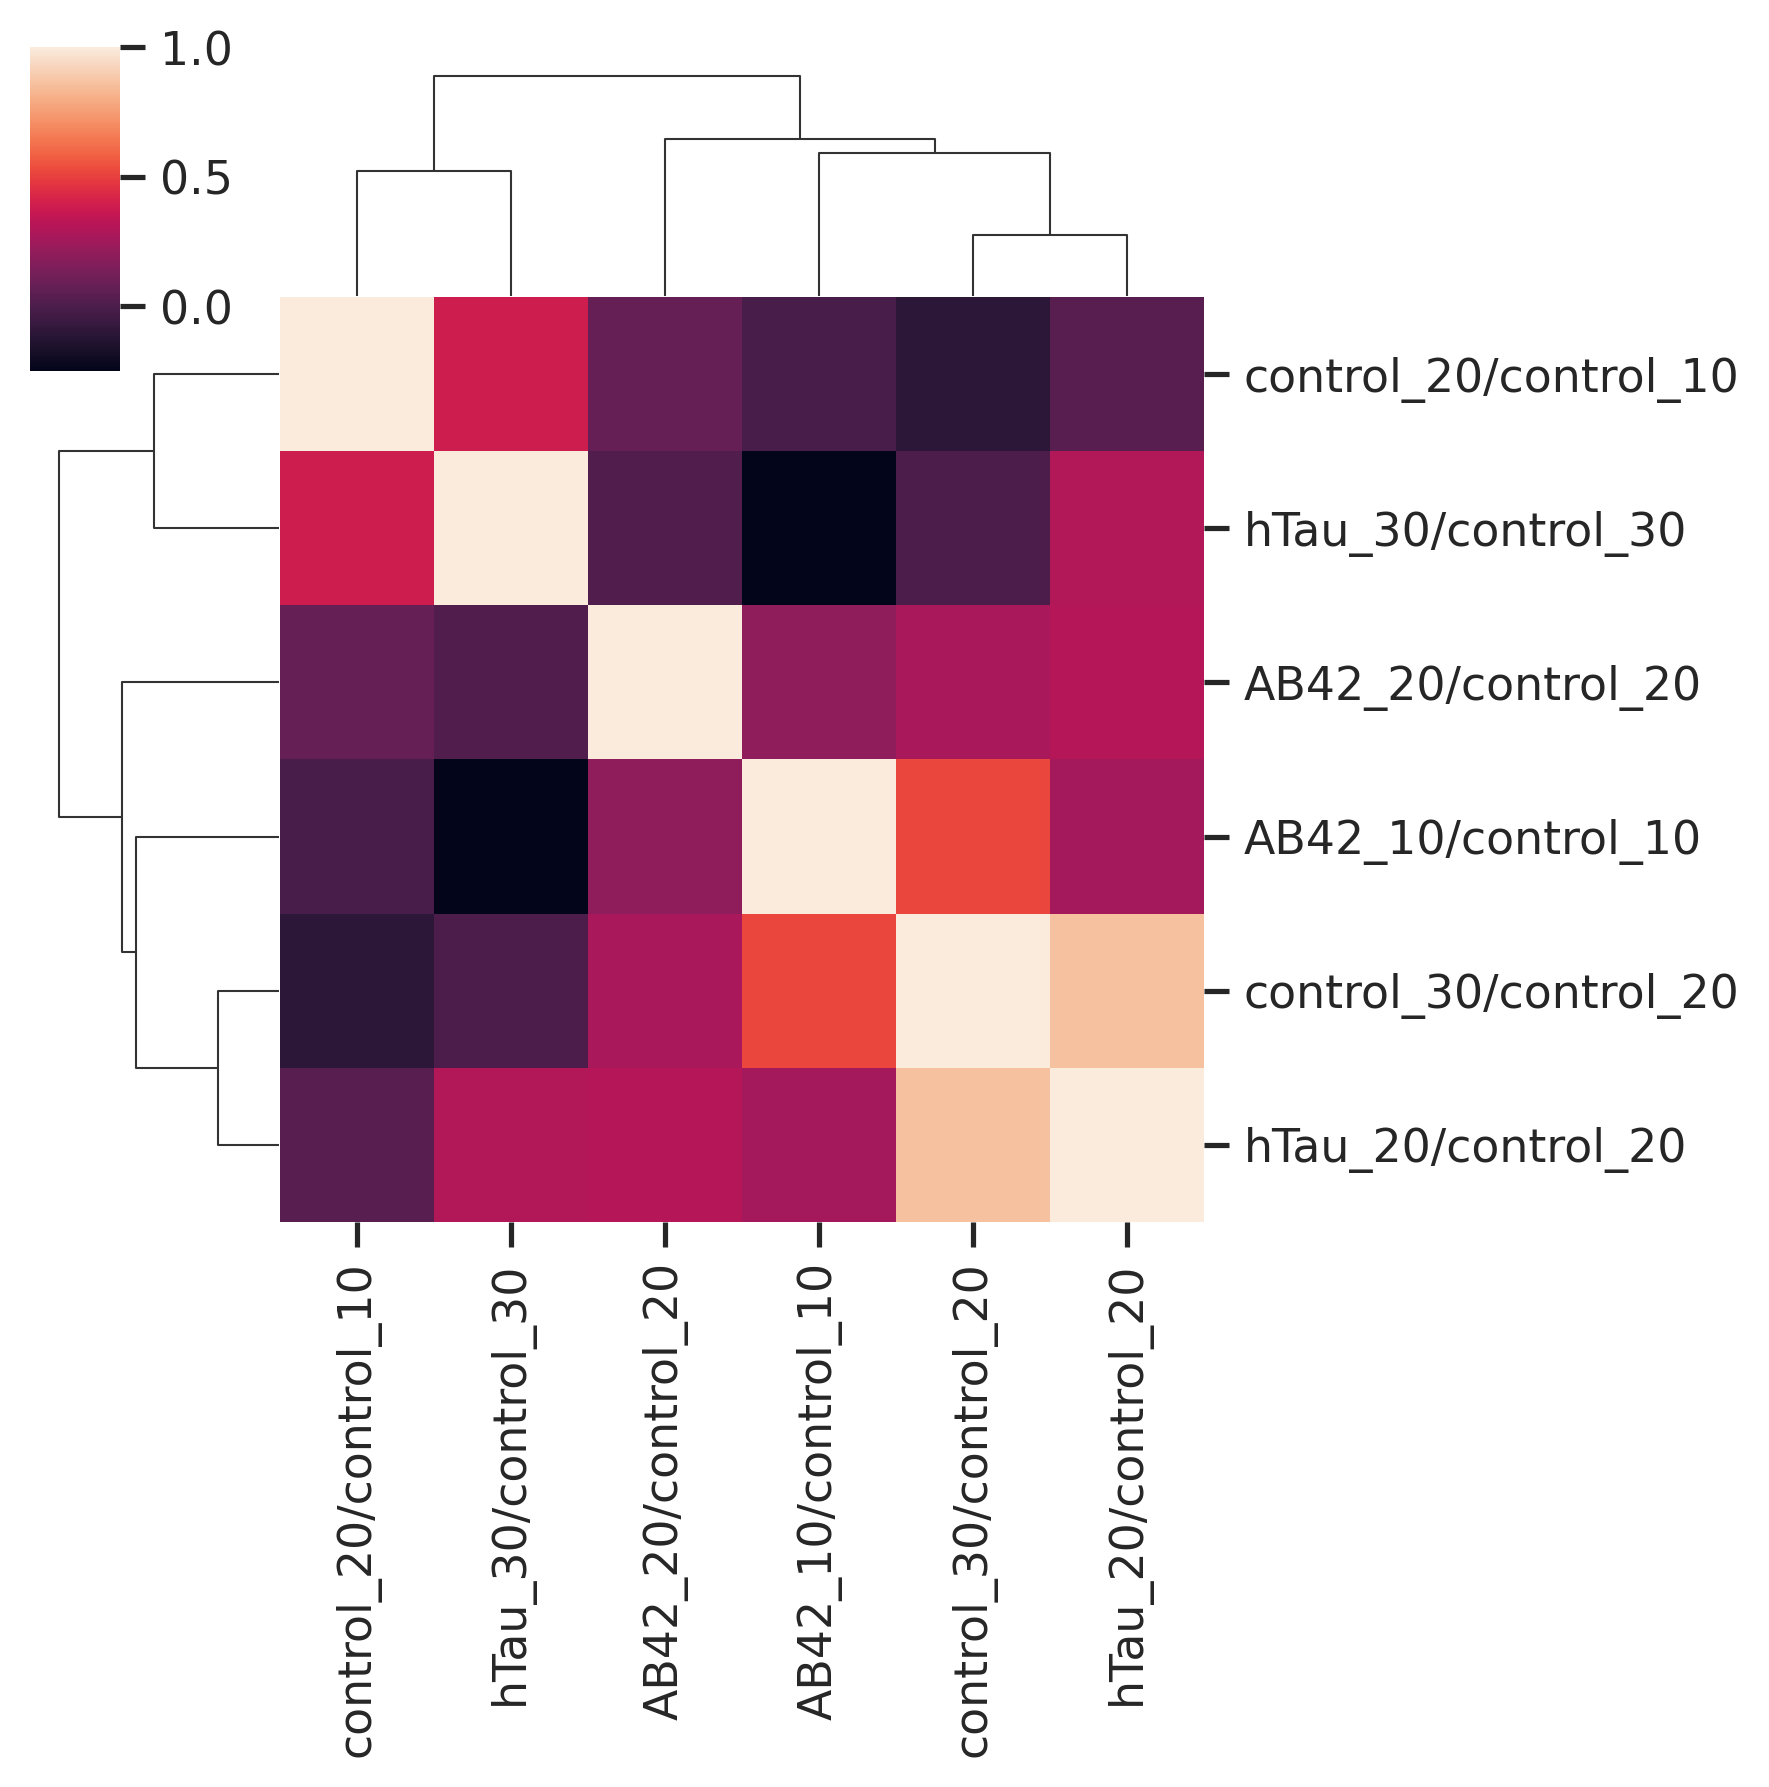

In [60]:
sns.clustermap(corr, figsize=(6, 6), annot=False)
# plt.tight_layout()
plt.savefig(f'{figure6PicFolder}/heatmap_umiN_mtx_body_correlation.pdf', bbox_inches='tight')
plt.show()

In [61]:
### head correlation
corr = umiN_mtx_head.corr(method = 'spearman').round(2)
corr

AB42_10/control_10  AB42_20/control_20  \
AB42_10/control_10                   1.00                0.36   
AB42_20/control_20                   0.36                1.00   
control_20/control_10               -0.01               -0.55   
control_30/control_20               -0.08                0.05   
hTau_20/control_20                  -0.08                0.59   
hTau_30/control_30                  -0.10                0.22   

                       control_20/control_10  control_30/control_20  \
AB42_10/control_10                     -0.01                  -0.08   
AB42_20/control_20                     -0.55                   0.05   
control_20/control_10                   1.00                   0.16   
control_30/control_20                   0.16                   1.00   
hTau_20/control_20                     -0.54                   0.36   
hTau_30/control_30                     -0.31                  -0.38   

                       hTau_20/control_20  hTau_30/control_30  
AB42_10/control_10                  -0.08               -0.10  
AB42_20/control_20                   0.59                0.22  
control_20/control_10               -0.54               -0.31  
control_30/control_20                0.36               -0.38  
hTau_20/control_20                   1.00                0.32  
hTau_30/control_30                   0.32                1.00

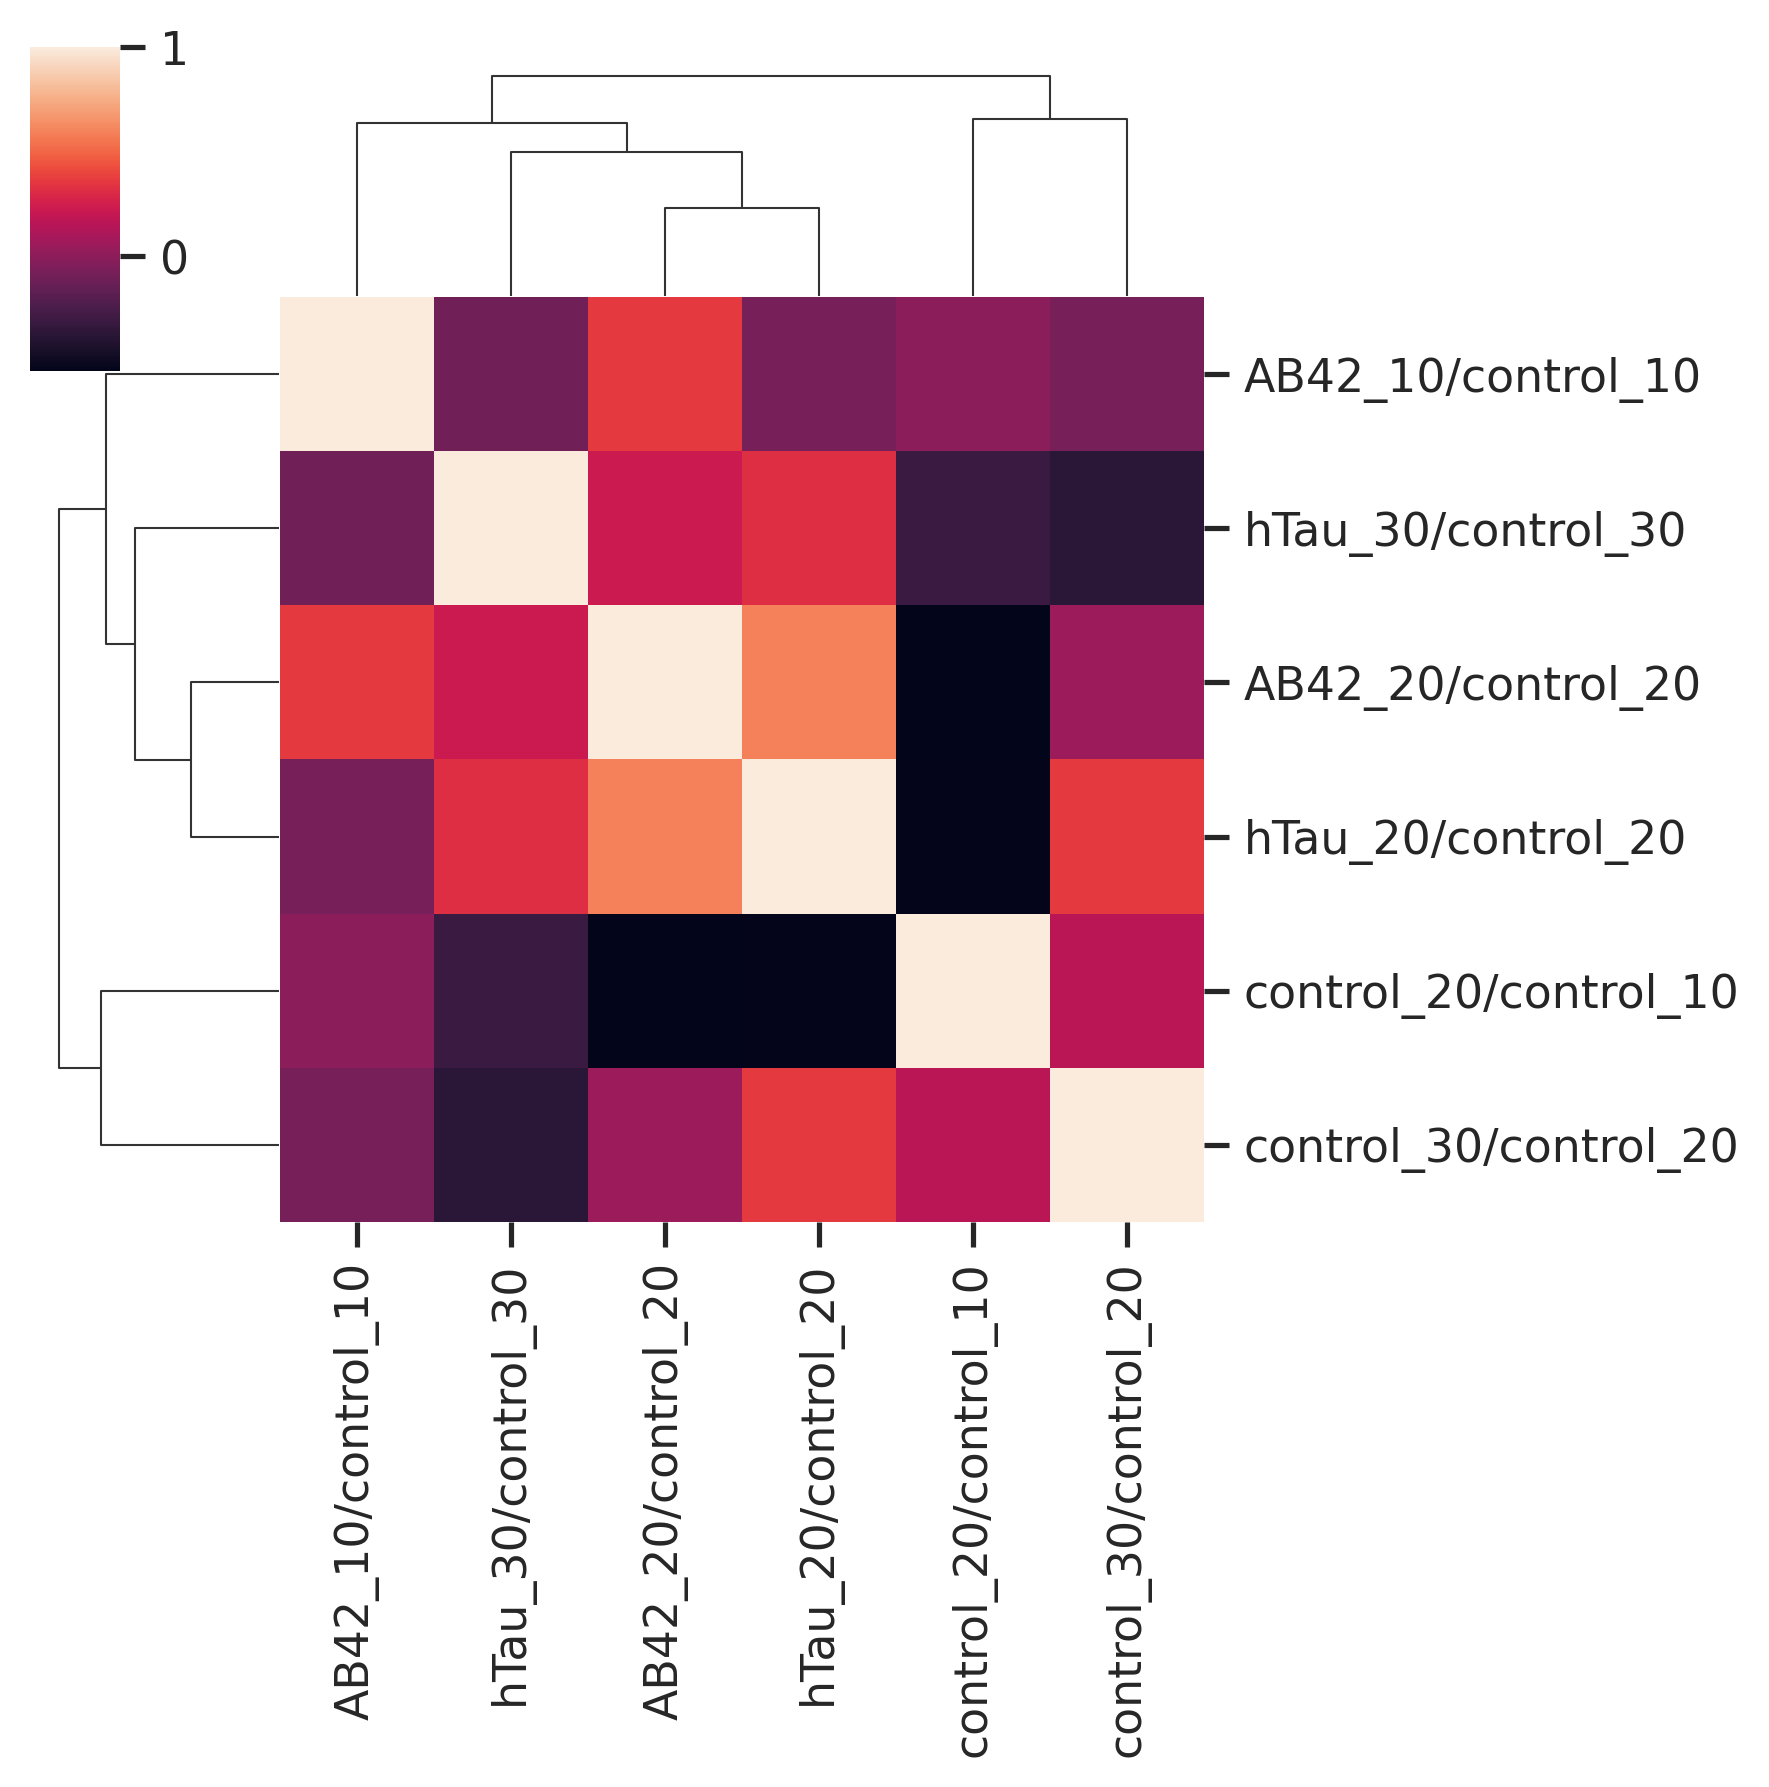

In [62]:
sns.clustermap(corr, figsize=(6, 6), annot=False)
plt.savefig(f'{figure6PicFolder}/heatmap_umiN_mtx_head_correlation.pdf', bbox_inches='tight')
plt.show()

# Fig 6D: correlation of Cell composition (compare between different genoAge groups)

## Load data

In [63]:
cellN_Df_head = pd.read_csv(f'{figure2Folder}/cellN/head_cellN_genotypeGroup.csv', index_col=0)
cellN_Df_body = pd.read_csv(f'{figure6Folder}/cellN/body_cellN_genotypeGroup.csv', index_col=0)

cellN_Df_body

TotalCellN  \
follicle cell                                            39540   
adult fat body_body                                      36353   
muscle cell                                              26905   
epithelial cell_body                                     24734   
indirect flight muscle                                   20334   
...                                                        ...   
prefollicle cell/stalk follicle cell                        59   
adult Malpighian tubule principal cell of lower...          49   
adult heart ventral longitudinal muscle                     34   
cardiomyocyte, working adult heart muscle (non-...          25   
young germ cell                                             22   

                                                    control_10_CellN  \
follicle cell                                                   6925   
adult fat body_body                                             8340   
muscle cell                                                     3942   
epithelial cell_body                                            3087   
indirect flight muscle                                          3260   
...                                                              ...   
prefollicle cell/stalk follicle cell                               5   
adult Malpighian tubule principal cell of lower...                 7   
adult heart ventral longitudinal muscle                           10   
cardiomyocyte, working adult heart muscle (non-...                 5   
young germ cell                                                   15   

                                                    control_20_CellN  \
follicle cell                                                   6241   
adult fat body_body                                             7409   
muscle cell                                                     2554   
epithelial cell_body                                            1743   
indirect flight muscle                                          2974   
...                                                              ...   
prefollicle cell/stalk follicle cell                               8   
adult Malpighian tubule principal cell of lower...                12   
adult heart ventral longitudinal muscle                            1   
cardiomyocyte, working adult heart muscle (non-...                 6   
young germ cell                                                    3   

                                                    control_30_CellN  \
follicle cell                                                 2511.0   
adult fat body_body                                           2536.0   
muscle cell                                                   3162.0   
epithelial cell_body                                          3650.0   
indirect flight muscle                                        2151.0   
...                                                              ...   
prefollicle cell/stalk follicle cell                             5.0   
adult Malpighian tubule principal cell of lower...               1.0   
adult heart ventral longitudinal muscle                          3.0   
cardiomyocyte, working adult heart muscle (non-...               1.0   
young germ cell                                                  0.0   

                                                    AB42_10_CellN  \
follicle cell                                              9785.0   
adult fat body_body                                       10596.0   
muscle cell                                                3955.0   
epithelial cell_body                                       3254.0   
indirect flight muscle                                     3064.0   
...                                                           ...   
prefollicle cell/stalk follicle cell                          8.0   
adult Malpighian tubule principal cell of lower...           21.0   
adult heart ventral longitudinal muscle    

In [64]:
genoCompare_D = dict(zip(genoCompare_Df.expSet, genoCompare_Df.controlSet))
genoCompare_D

{'AB42': 'control_inAB42', 'hTau': 'control_inTau'}

In [30]:
# ageCompare_Df

expSet  controlSet
0  control_20  control_10
1  control_30  control_20
2     AB42_20     AB42_10
3     hTau_30     hTau_20

In [66]:
genoCompare_Df

expSet      controlSet    age
0   AB42  control_inAB42  10,20
1   hTau   control_inTau  20,30

In [70]:
genoAge_L[:2]

['control_10', 'control_20']

In [71]:
genoAge_ctlAge_Df = pd.DataFrame(columns=genoCompare_Df.columns[:2])
for n, expSet in enumerate(genoCompare_Df.expSet):
    age_L = genoCompare_Df.age[n].split(',')
    
    for age in age_L:
        genoAge_ctlAge_Df.loc[len(genoAge_ctlAge_Df)] = [f'{expSet}_{age}', f'control_{age}']

for n, genoAge in enumerate(genoAge_L[:2]):
    genoAge_ctlAge_Df.loc[len(genoAge_ctlAge_Df)] = [genoAge_L[n+1], f'{genoAge}']
genoAge_ctlAge_Df

expSet  controlSet
0     AB42_10  control_10
1     AB42_20  control_20
2     hTau_20  control_20
3     hTau_30  control_30
4  control_20  control_10
5  control_30  control_20

In [72]:
genoAge_ctlAge_D = dict(zip(genoAge_ctlAge_Df.expSet, genoAge_ctlAge_Df.controlSet))
genoAge_ctlAge_D

{'AB42_10': 'control_10',
 'AB42_20': 'control_20',
 'hTau_20': 'control_20',
 'hTau_30': 'control_30',
 'control_20': 'control_10',
 'control_30': 'control_20'}

## Ratio (separated by genoAge)
Filter cell types with cellN <700

In [73]:
tissueCellN_D = {'head':cellN_Df_head, 'body': cellN_Df_body}
tissueRatio_D = {}

for tissue in tissueCellN_D.keys():
    print(f'tissue: {tissue}')

    ratioDf=pd.DataFrame(index=tissueCellN_D[tissue].index.to_list(), columns=[genoAge + '_ratio' for genoAge in genoAge_L])
    for genoAge in genoAge_L:
        print(genoAge)
        ratioDf[f'{genoAge}_ratio'] = ( tissueCellN_D[tissue][f'{genoAge}_CellN']/sum(tissueCellN_D[tissue][f'{genoAge}_CellN']) )
    ratioDf = ratioDf.sort_values(by=[f'{genoAge_L[0]}_ratio'])
    
    tissueRatio_D[tissue] = ratioDf
    print()

tissue: head
control_10
control_20
control_30
AB42_10
AB42_20
hTau_20
hTau_30

tissue: body
control_10
control_20
control_30
AB42_10
AB42_20
hTau_20
hTau_30



In [76]:
tissueRatio_D['body']

control_10_ratio  \
adult differentiating enterocyte                            0.000067   
adult midgut enterocyte                                     0.000089   
prefollicle cell/stalk follicle cell                        0.000111   
cardiomyocyte, working adult heart muscle (non-...          0.000111   
adult Malpighian tubule principal cell of lower...          0.000155   
...                                                              ...   
epithelial cell_body                                        0.068527   
indirect flight muscle                                      0.072367   
muscle cell                                                 0.087507   
follicle cell                                               0.153725   
adult fat body_body                                         0.185136   

                                                    control_20_ratio  \
adult differentiating enterocyte                            0.000505   
adult midgut enterocyte                                     0.000319   
prefollicle cell/stalk follicle cell                        0.000213   
cardiomyocyte, working adult heart muscle (non-...          0.000159   
adult Malpighian tubule principal cell of lower...          0.000319   
...                                                              ...   
epithelial cell_body                                        0.046305   
indirect flight muscle                                      0.079007   
muscle cell                                                 0.067850   
follicle cell                                               0.165799   
adult fat body_body                                         0.196828   

                                                    control_30_ratio  \
adult differentiating enterocyte                            0.000325   
adult midgut enterocyte                                     0.000831   
prefollicle cell/stalk follicle cell                        0.000181   
cardiomyocyte, working adult heart muscle (non-...          0.000036   
adult Malpighian tubule principal cell of lower...          0.000036   
...                                                              ...   
epithelial cell_body                                        0.131869   
indirect flight muscle                                      0.077712   
muscle cell                                                 0.114238   
follicle cell                                               0.090719   
adult fat body_body                                         0.091622   

                                                    AB42_10_ratio  \
adult differentiating enterocyte                         0.000208   
adult midgut enterocyte                                  0.000113   
prefollicle cell/stalk follicle cell                     0.000151   
cardiomyocyte, working adult heart muscle (non-...       0.000151   
adult Malpighian tubule principal cell of lower...       0.000397   
...                                                           ...   
epithelial cell_body                                     0.061457   
indirect flight muscle                                   0.057868   
muscle cell                                              0.074696   
follicle cell                                            0.184804   
adult fat body_body                                      0.200121   

                                                    AB42_20_ratio  \
adult differentiating enterocyte                         0.000133   
adult midgut enterocyte                                  0.000166   
prefollicle cell/stalk follicle cell                     0.000099   
cardiomyocyte, working adult heart muscle (non-...       0.000133   
adult Malpighian tubule principal cell of lower...       0.000199   
...                                                           ...   
epithelial cell_body                                     0.057713   
indirect flight muscle                                   0.112212   
muscle 

## Relative ratio (normalize to control, separated by genoAge)
Filter cell types with cellN <700

### Summarize normalized ratio

In [78]:
tissueNorRatio_D = {}
tissueNorRatioNoLog2_D = {}
tissueNorRatio_long_D = {}

for tissue in tissueRatio_D.keys():
    print(f'tissue: {tissue}')

    normalRatio_Df=tissueRatio_D[tissue][:]
    # normalRatio_Df=normalRatio_Df.drop(['unannotated', 'uncharacterized CNS neuron'], axis=0)
    normalRatio_Df=normalRatio_Df[~normalRatio_Df.index.isin(['unannotated', 'uncharacterized CNS neuron'])]
    normalRatio_Df=normalRatio_Df[normalRatio_Df.index.isin(celltypeN700_L)]


    for expSet in genoAge_ctlAge_Df.expSet:
        controlSet = genoAge_ctlAge_D[expSet]
        normalRatio_Df[f'{expSet}/{controlSet}_ratio']=normalRatio_Df[f'{expSet}_ratio']/normalRatio_Df[f'{controlSet}_ratio']

    normalRatio_Df=normalRatio_Df.iloc[:,7:]
    normalRatioNoLog2_Df=normalRatio_Df[:]
    normalRatio_Df=np.log2(normalRatio_Df)

    normalRatioNoLog2_Df=normalRatioNoLog2_Df.sort_values(by=f'{genoAge_ctlAge_Df.iloc[0,0]}/{genoAge_ctlAge_Df.iloc[0,1]}_ratio', ascending=False)
    normalRatio_Df=normalRatio_Df.sort_values(by=f'{genoAge_ctlAge_Df.iloc[0,0]}/{genoAge_ctlAge_Df.iloc[0,1]}_ratio', ascending=False)

    normalRatio_Df.replace([np.inf, -np.inf], np.nan, inplace=True)
    normalRatioNoLog2_Df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    normalRatio_Df.insert(0, 'annotation', normalRatio_Df.index.to_list())
    normalRatio_longDf=normalRatio_Df.melt(id_vars=['annotation'], var_name='genoAgeCompare', value_name='log2ratio')
    normalRatio_longDf

    tissueNorRatio_D[tissue]  = normalRatio_Df
    tissueNorRatioNoLog2_D[tissue]  = normalRatioNoLog2_Df
    tissueNorRatio_long_D[tissue]  = normalRatio_longDf
    
    normalRatio_Df.to_csv(f'{cellnFig5Folder}/{tissue}_normalRatio_Df.csv')
    normalRatio_longDf.to_csv(f'{cellnFig5Folder}/{tissue}_normalRatio_longDf.csv')
    normalRatioNoLog2_Df.to_csv(f'{cellnFig5Folder}/{tissue}_normalRatioNoLog2_Df.csv')

tissue: head
tissue: body


In [79]:
tissueNorRatio_long_D['head']

annotation  \
0                             ABeta42-specific cluster   
1                             alpha'/beta' Kenyon cell   
2    adult reticular neuropil associated glial cell...   
3                           lamina monopolar neuron L4   
4                                  adult fat body_head   
..                                                 ...   
397                         lamina monopolar neuron L1   
398                            lamina intrinsic neuron   
399                         transmedullary neuron Tm3a   
400                                        T neuron T2   
401                        lobula columnar neuron LC16   

                  genoAgeCompare  log2ratio  
0       AB42_10/control_10_ratio   5.611472  
1       AB42_10/control_10_ratio   0.439646  
2       AB42_10/control_10_ratio   0.334667  
3       AB42_10/control_10_ratio   0.320298  
4       AB42_10/control_10_ratio   0.243655  
..                           ...        ...  
397  control_30/control_20_ratio  -0.447042  
398  control_30/control_20_ratio   0.023007  
399  control_30/control_20_ratio   0.110129  
400  control_30/control_20_ratio  -0.379262  
401  control_30/control_20_ratio  -0.041015  

[402 rows x 3 columns]

In [80]:
tissueCellN_D['head']

TotalCellN  control_10_CellN  \
uncharacterized CNS neuron                    90979             13540   
unannotated                                   28928              5212   
outer photoreceptor cell                      26996              3879   
cone cell                                     24409              3206   
epithelial cell_head                          21390              3208   
...                                             ...               ...   
proximal medullary amacrine neuron Pm3*         182                30   
distal medullary amacrine neuron Dm1            152                27   
neuron 16                                       135                13   
octopaminergic/tyraminergic neuron              112                20   
crystal cell_head                                90                27   

                                         control_20_CellN  control_30_CellN  \
uncharacterized CNS neuron                          15102             13353   
unannotated                                          4731              2984   
outer photoreceptor cell                             5563              3864   
cone cell                                            4572              3421   
epithelial cell_head                                 3142              2696   
...                                                   ...               ...   
proximal medullary amacrine neuron Pm3*                25                30   
distal medullary amacrine neuron Dm1                   25                15   
neuron 16                                              16                21   
octopaminergic/tyraminergic neuron                     13                11   
crystal cell_head                                      11                 6   

                                         AB42_10_CellN  AB42_20_CellN  \
uncharacterized CNS neuron                       11023           9525   
unannotated                                       4659           4114   
outer photoreceptor cell                          3225           3111   
cone cell                                         2844           3013   
epithelial cell_head                              3076           2879   
...                                                ...            ...   
proximal medullary amacrine neuron Pm3*             16             19   
distal medullary amacrine neuron Dm1                20             13   
neuron 16                                           19             23   
octopaminergic/tyraminergic neuron                  17              8   
crystal cell_head                                   19             15   

                                         hTau_20_CellN  hTau_30_CellN  
uncharacterized CNS neuron                       15912          12524  
unannotated                                       4124           3104  
outer photoreceptor cell                          3341           4013  
cone cell                                         4431           2922  
epithelial cell_head                              3504           2885  
...                                                ...            ...  
proximal medullary amacrine neuron Pm3*             35             27  
distal medullary amacrine neuron Dm1                33             19  
neuron 16                                           24             19  
octopaminergic/tyraminergic neuron                  21             22  
crystal cell_head                                    6              6  

[108 rows x 8 columns]

In [81]:
tissueCellN_D[tissue].columns.to_list()[-4:] + tissueCellN_D[tissue].columns.to_list()[2:4]

['AB42_10_CellN',
 'AB42_20_CellN',
 'hTau_20_CellN',
 'hTau_30_CellN',
 'control_20_CellN',
 'control_30_CellN']

In [82]:
tissue_dfAll_D = {}

for tissue in tissueNorRatio_D.keys():
    # dfAll=pd.concat([tissueNorRatio_D[tissue],
    #            tissueCellN_D[tissue].loc[tissueNorRatio_D[tissue].index.to_list(),:].drop(tissueCellN_D[tissue].columns[:4].to_list(), axis=1)], 
    #           axis=1)
    
    dfAll=pd.concat([tissueNorRatio_D[tissue],
               tissueCellN_D[tissue].loc[tissueNorRatio_D[tissue].index.to_list(), tissueCellN_D[tissue].columns.to_list()[-4:] + tissueCellN_D[tissue].columns.to_list()[2:4] ]], 
              axis=1)
    
    tissue_dfAll_D[tissue] = dfAll

In [83]:
tissue_dfAll_D['head']

annotation  \
ABeta42-specific cluster                                                     ABeta42-specific cluster   
alpha'/beta' Kenyon cell                                                     alpha'/beta' Kenyon cell   
adult reticular neuropil associated glial cell_...  adult reticular neuropil associated glial cell...   
lamina monopolar neuron L4                                                 lamina monopolar neuron L4   
adult fat body_head                                                               adult fat body_head   
...                                                                                               ...   
lamina monopolar neuron L1                                                 lamina monopolar neuron L1   
lamina intrinsic neuron                                                       lamina intrinsic neuron   
transmedullary neuron Tm3a                                                 transmedullary neuron Tm3a   
T neuron T2                                                                               T neuron T2   
lobula columnar neuron LC16                                               lobula columnar neuron LC16   

                                                    AB42_10/control_10_ratio  \
ABeta42-specific cluster                                            5.611472   
alpha'/beta' Kenyon cell                                            0.439646   
adult reticular neuropil associated glial cell_...                  0.334667   
lamina monopolar neuron L4                                          0.320298   
adult fat body_head                                                 0.243655   
...                                                                      ...   
lamina monopolar neuron L1                                         -0.376695   
lamina intrinsic neuron                                            -0.383280   
transmedullary neuron Tm3a                                         -0.495883   
T neuron T2                                                        -0.505137   
lobula columnar neuron LC16                                        -0.559846   

                                                    AB42_20/control_20_ratio  \
ABeta42-specific cluster                                            4.194436   
alpha'/beta' Kenyon cell                                            0.545429   
adult reticular neuropil associated glial cell_...                  0.155282   
lamina monopolar neuron L4                                          0.340314   
adult fat body_head                                                -0.520490   
...                                                                      ...   
lamina monopolar neuron L1                                         -0.118326   
lamina intrinsic neuron                                            -0.316999   
transmedullary neuron Tm3a                                         -0.126861   
T neuron T2                                                         0.070260   
lobula columnar neuron LC16                                        -0.703154   

                                                    hTau_20/control_20_ratio  \
ABeta42-specific cluster                                           -0.288576   
alpha'/beta' Kenyon cell                                            0.871647   
adult reticular neuropil associated glial cell_...                  0.066040   
lamina monopolar neuron L4                                          0.188511   
adult fat body_head                                                 0.011678   
...                                                                      ...   
lamina monopolar neuron L1                                          0.323242   
lamina intrinsic neuron                                             0.149181   
transmedullary neuron Tm3a                                          0.315540   
T neuron T2                                                         0.310678   
lobula columnar neuron LC16 

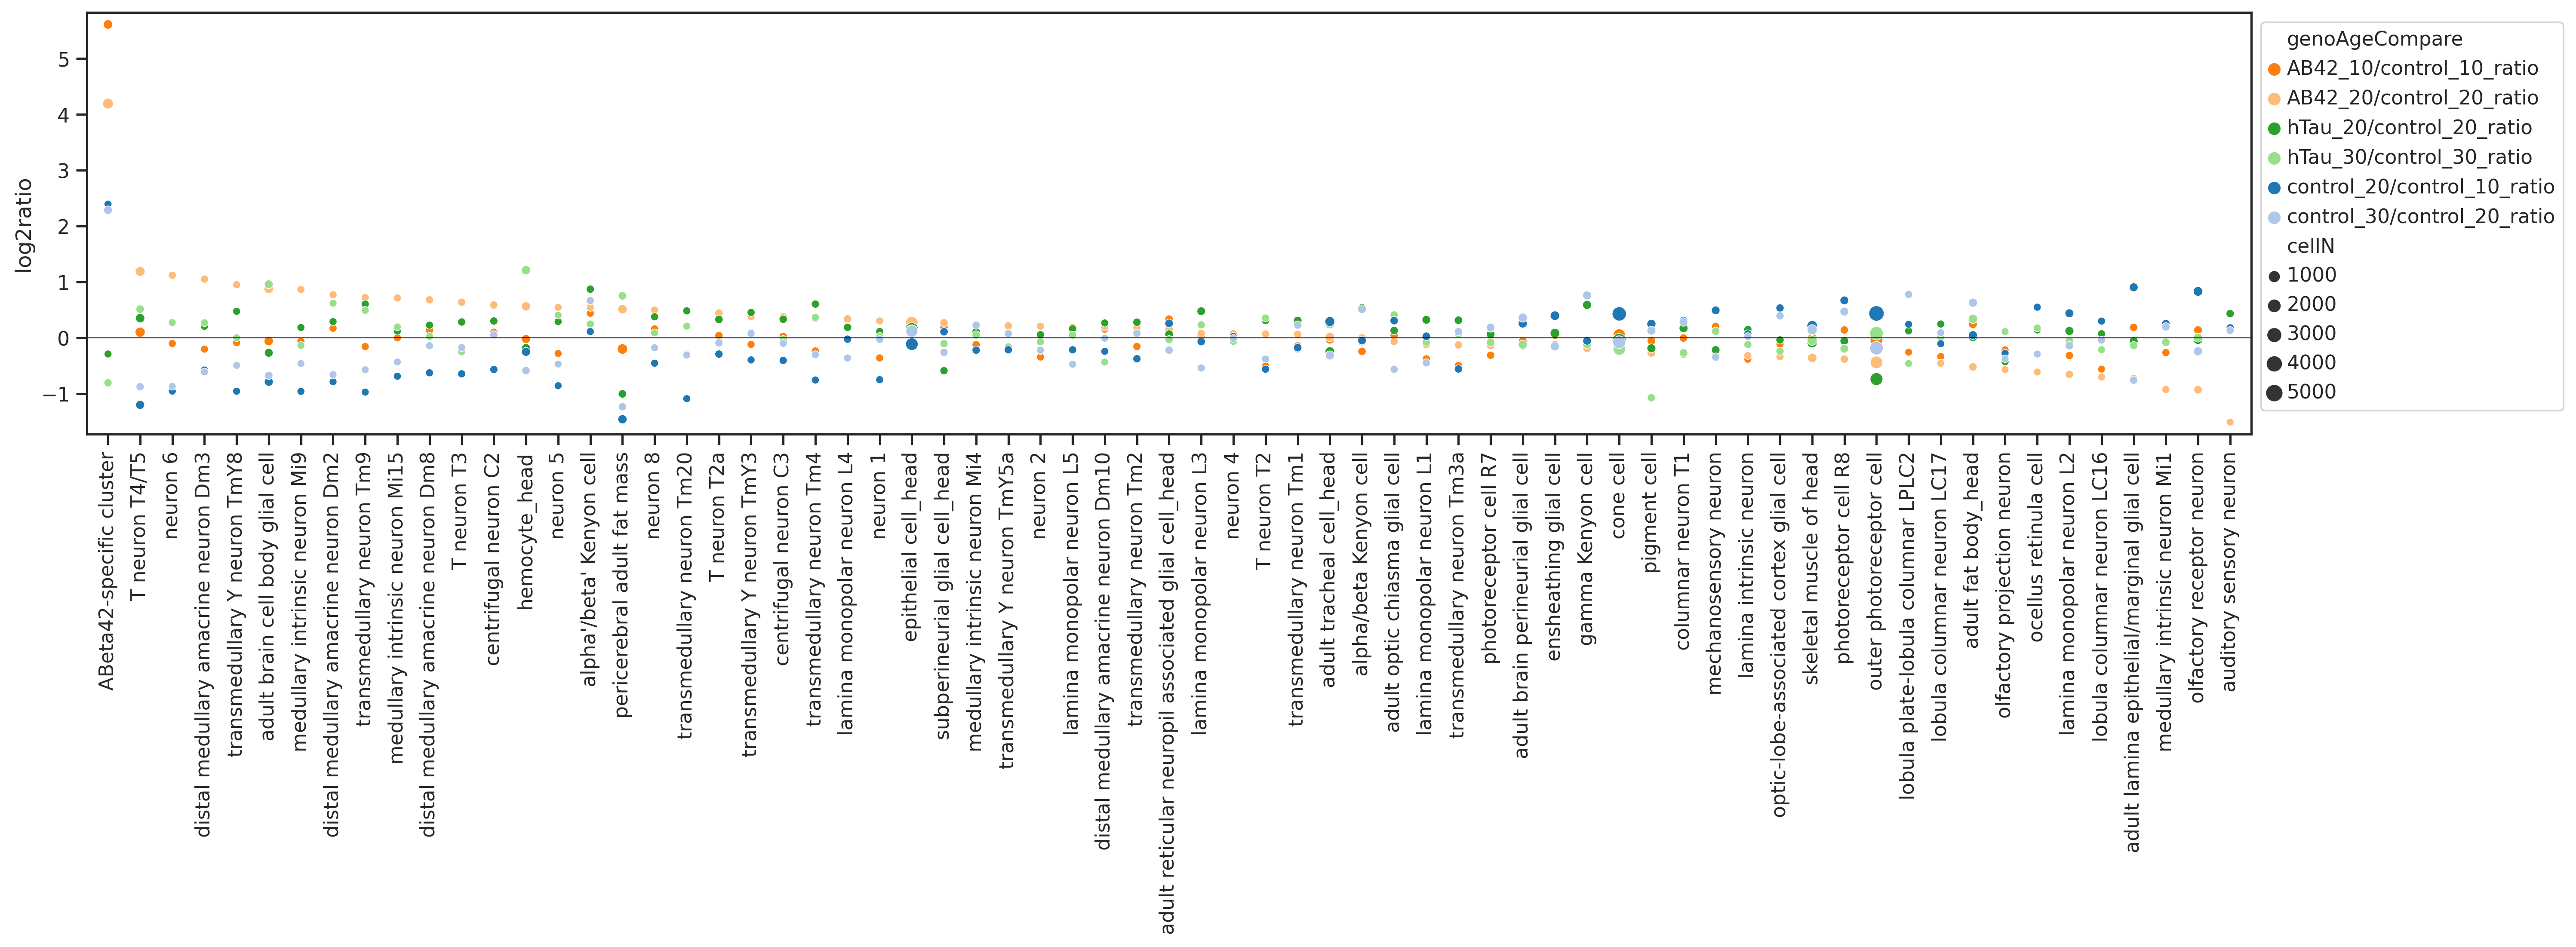

In [84]:
### head dotplot

# Load dotplot data
tissue = 'head'
tissue_dfAll_D[tissue].sort_values(by=['AB42_20/control_20_ratio'], ascending=False, inplace=True)

dotplot_Df=tissue_dfAll_D[tissue].melt(id_vars=['annotation'], value_vars=list(tissue_dfAll_D[tissue].columns[1:7]), 
                      var_name='genoAgeCompare', value_name='log2ratio')
# dotplot_Df

dotplot_Df=pd.concat([dotplot_Df, 
           tissue_dfAll_D[tissue].melt(id_vars=['annotation'], value_vars=list(tissue_dfAll_D[tissue].columns[7:]), 
                      var_name='genoAgeCompare', value_name='cellN').iloc[:,2] ], 
          axis=1) #

# plot
with rc_context({'figure.figsize': (20, 7.5)}):
    ax=sns.scatterplot(data=dotplot_Df, 
                       x="annotation", y="log2ratio", hue="genoAgeCompare", size='cellN', palette=sns.color_palette("tab20")[2:6]+sns.color_palette("tab20")[:2]) # palette=set2Color_L # palette='Set2', 
    ax.grid(axis='x',visible=False)
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.axhline(0, color='black', linewidth=0.5)
    # plt.tight_layout(w_pad=0.5)
    plt.subplots_adjust(bottom=0.6)
    plt.tight_layout()
    ax.margins(0.01, 0.03)
    plt.savefig(f'{figure6PicFolder}/{tissue}_dotplot_cellRatio_normalizeToControl_genoAge.pdf')
    plt.show()

In [85]:
dotplot_Df.to_csv(f'{figure6Folder}/dotplot_Df_{tissue}_genoAge_ctlAge.csv', index=False)

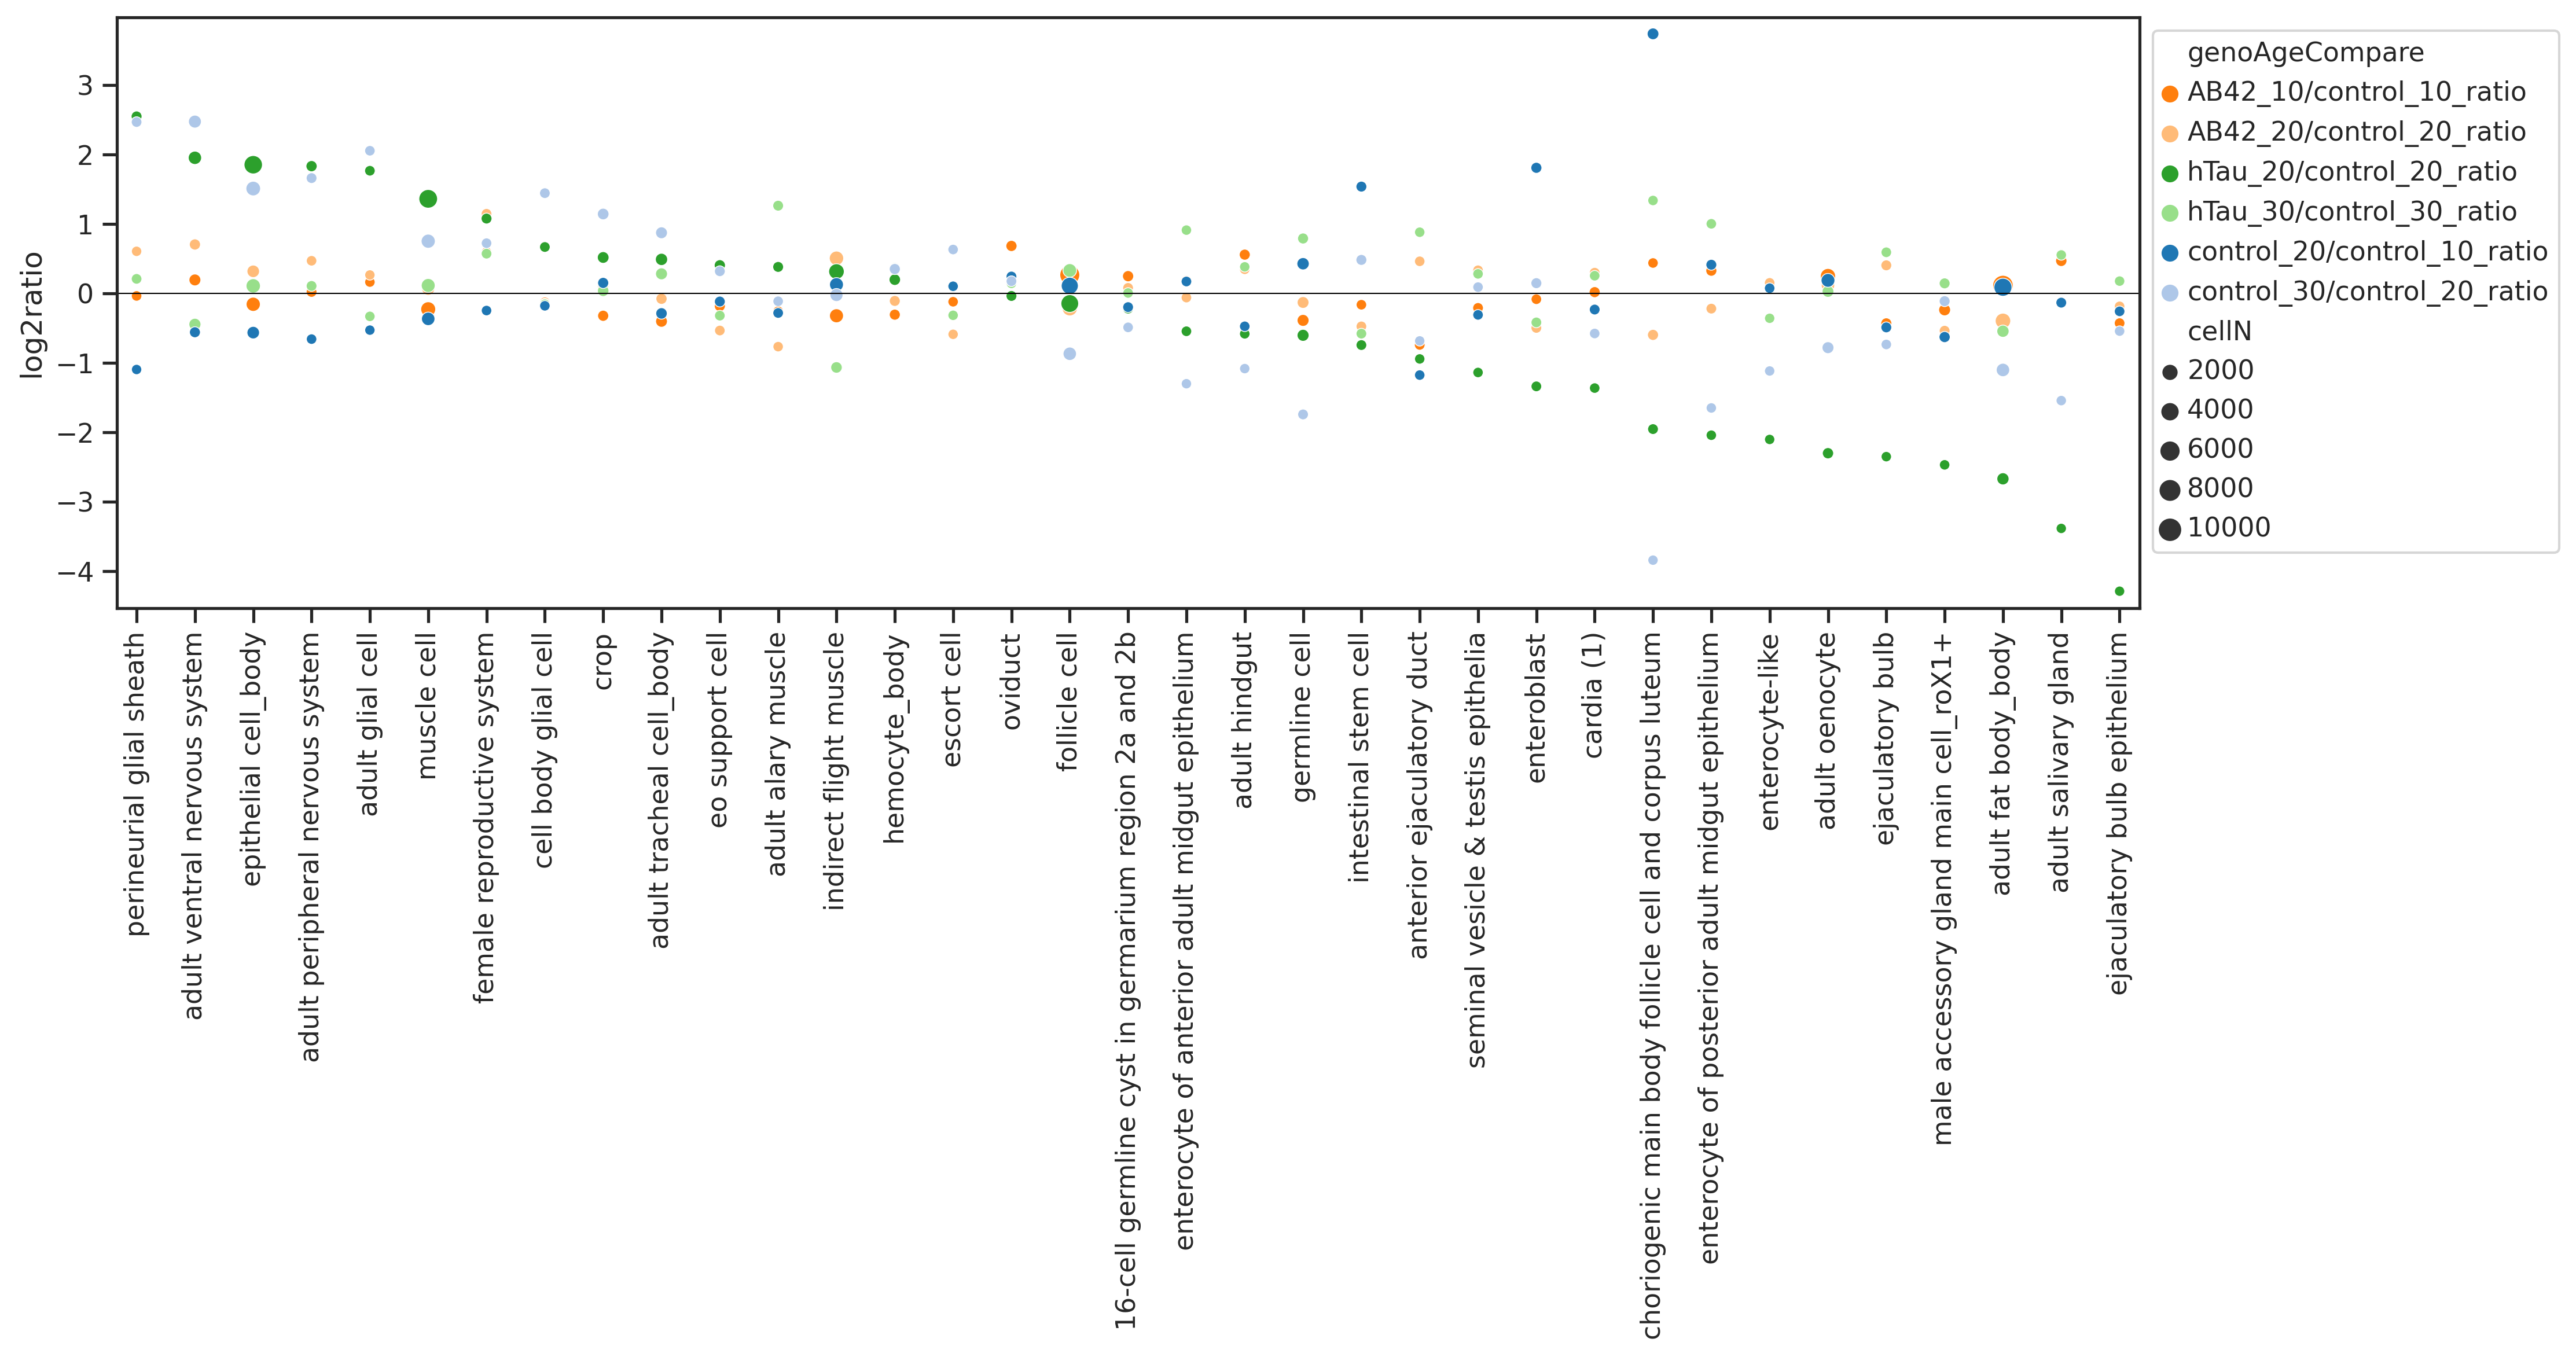

In [86]:
### body dotplot

# Load dotplot data
tissue = 'body'
tissue_dfAll_D[tissue].sort_values(by=['hTau_20/control_20_ratio'], ascending=False, inplace=True)

dotplot_Df=tissue_dfAll_D[tissue].melt(id_vars=['annotation'], value_vars=list(tissue_dfAll_D[tissue].columns[1:7]), 
                      var_name='genoAgeCompare', value_name='log2ratio')
# dotplot_Df

dotplot_Df=pd.concat([dotplot_Df, 
           tissue_dfAll_D[tissue].melt(id_vars=['annotation'], value_vars=list(tissue_dfAll_D[tissue].columns[7:]), 
                      var_name='genoAgeCompare', value_name='cellN').iloc[:,2] ], 
          axis=1) #

# plot
with rc_context({'figure.figsize': (15, 8)}):
    ax=sns.scatterplot(data=dotplot_Df, 
                       x="annotation", y="log2ratio", hue="genoAgeCompare", size='cellN', palette=sns.color_palette("tab20")[2:6]+sns.color_palette("tab20")[:2]) # palette=set2Color_L # palette='Set2', 
    ax.grid(axis='x',visible=False)
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.axhline(0, color='black', linewidth=0.5)
    # plt.tight_layout(w_pad=0.5)
    plt.subplots_adjust(bottom=0.6)
    plt.tight_layout()
    ax.margins(0.01, 0.03)
    plt.savefig(f'{figure6PicFolder}/{tissue}_dotplot_cellRatio_normalizeToControl_genoAge.pdf')
    plt.show()

In [87]:
dotplot_Df.to_csv(f'{figure6Folder}/dotplot_Df_{tissue}_genoAge_ctlAge.csv', index=False)

### Plot pairwise correlation

In [88]:
from scipy.stats import pearsonr
from scipy import stats

In [89]:
dotplot_Df_head = pd.read_csv(f'{figure6Folder}/dotplot_Df_head_genoAge_ctlAge.csv')
dotplot_Df_body = pd.read_csv(f'{figure6Folder}/dotplot_Df_body_genoAge_ctlAge.csv')
dotplot_Df_head

annotation               genoAgeCompare  \
0                       ABeta42-specific cluster     AB42_10/control_10_ratio   
1                                 T neuron T4/T5     AB42_10/control_10_ratio   
2                                       neuron 6     AB42_10/control_10_ratio   
3           distal medullary amacrine neuron Dm3     AB42_10/control_10_ratio   
4                   transmedullary Y neuron TmY8     AB42_10/control_10_ratio   
..                                           ...                          ...   
397                  lobula columnar neuron LC16  control_30/control_20_ratio   
398  adult lamina epithelial/marginal glial cell  control_30/control_20_ratio   
399               medullary intrinsic neuron Mi1  control_30/control_20_ratio   
400                    olfactory receptor neuron  control_30/control_20_ratio   
401                      auditory sensory neuron  control_30/control_20_ratio   

     log2ratio  cellN  
0     5.611472    962  
1     0.101016   1369  
2    -0.100345    162  
3    -0.201559    154  
4    -0.085788    158  
..         ...    ...  
397  -0.041015    112  
398  -0.757086    290  
399   0.197750    401  
400  -0.240132    713  
401   0.131607    198  

[402 rows x 4 columns]

In [90]:
normalRatio_Df_head = pd.read_csv(f'{figure6Folder}/cellN/head_normalRatio_Df.csv', index_col=0)
normalRatio_Df_body = pd.read_csv(f'{figure6Folder}/cellN/body_normalRatio_Df.csv', index_col=0)
normalRatio_Df_body

annotation  \
oviduct                                                                                       oviduct   
female reproductive system                                                 female reproductive system   
adult hindgut                                                                           adult hindgut   
adult salivary gland                                                             adult salivary gland   
choriogenic main body follicle cell and corpus ...  choriogenic main body follicle cell and corpus...   
enterocyte of posterior adult midgut epithelium       enterocyte of posterior adult midgut epithelium   
follicle cell                                                                           follicle cell   
adult oenocyte                                                                         adult oenocyte   
16-cell germline cyst in germarium region 2a an...  16-cell germline cyst in germarium region 2a a...   
adult ventral nervous system                                             adult ventral nervous system   
enterocyte of anterior adult midgut epithelium         enterocyte of anterior adult midgut epithelium   
adult glial cell                                                                     adult glial cell   
adult fat body_body                                                               adult fat body_body   
enterocyte-like                                                                       enterocyte-like   
adult peripheral nervous system                                       adult peripheral nervous system   
cardia (1)                                                                                 cardia (1)   
perineurial glial sheath                                                     perineurial glial sheath   
enteroblast                                                                               enteroblast   
escort cell                                                                               escort cell   
cell body glial cell                                                             cell body glial cell   
epithelial cell_body                                                             epithelial cell_body   
intestinal stem cell                                                             intestinal stem cell   
eo support cell                                                                       eo support cell   
seminal vesicle & testis epithelia                                 seminal vesicle & testis epithelia   
muscle cell                                                                               muscle cell   
male accessory gland main cell_roX1+                             male accessory gland main cell_roX1+   
adult alary muscle                                                                 adult alary muscle   
hemocyte_body                                                                           hemocyte_body   
indirect flight muscle                                                         indirect flight muscle   
crop                                                                                             crop   
germline cell                                                                           germline cell   
adult tracheal cell_body                                                     adult tracheal cell_body   
ejaculatory bulb epithelium                                               ejaculatory bulb epithelium   
ejaculatory bulb                                                                     ejaculatory bulb   
anterior ejaculatory duct                                                   anterior ejaculatory duct   

                                                    AB42_10/control_10_ratio  \
oviduct                                                             0.683198   
female reproductive system                                          0.589201   
adult hindgut                                                       0.

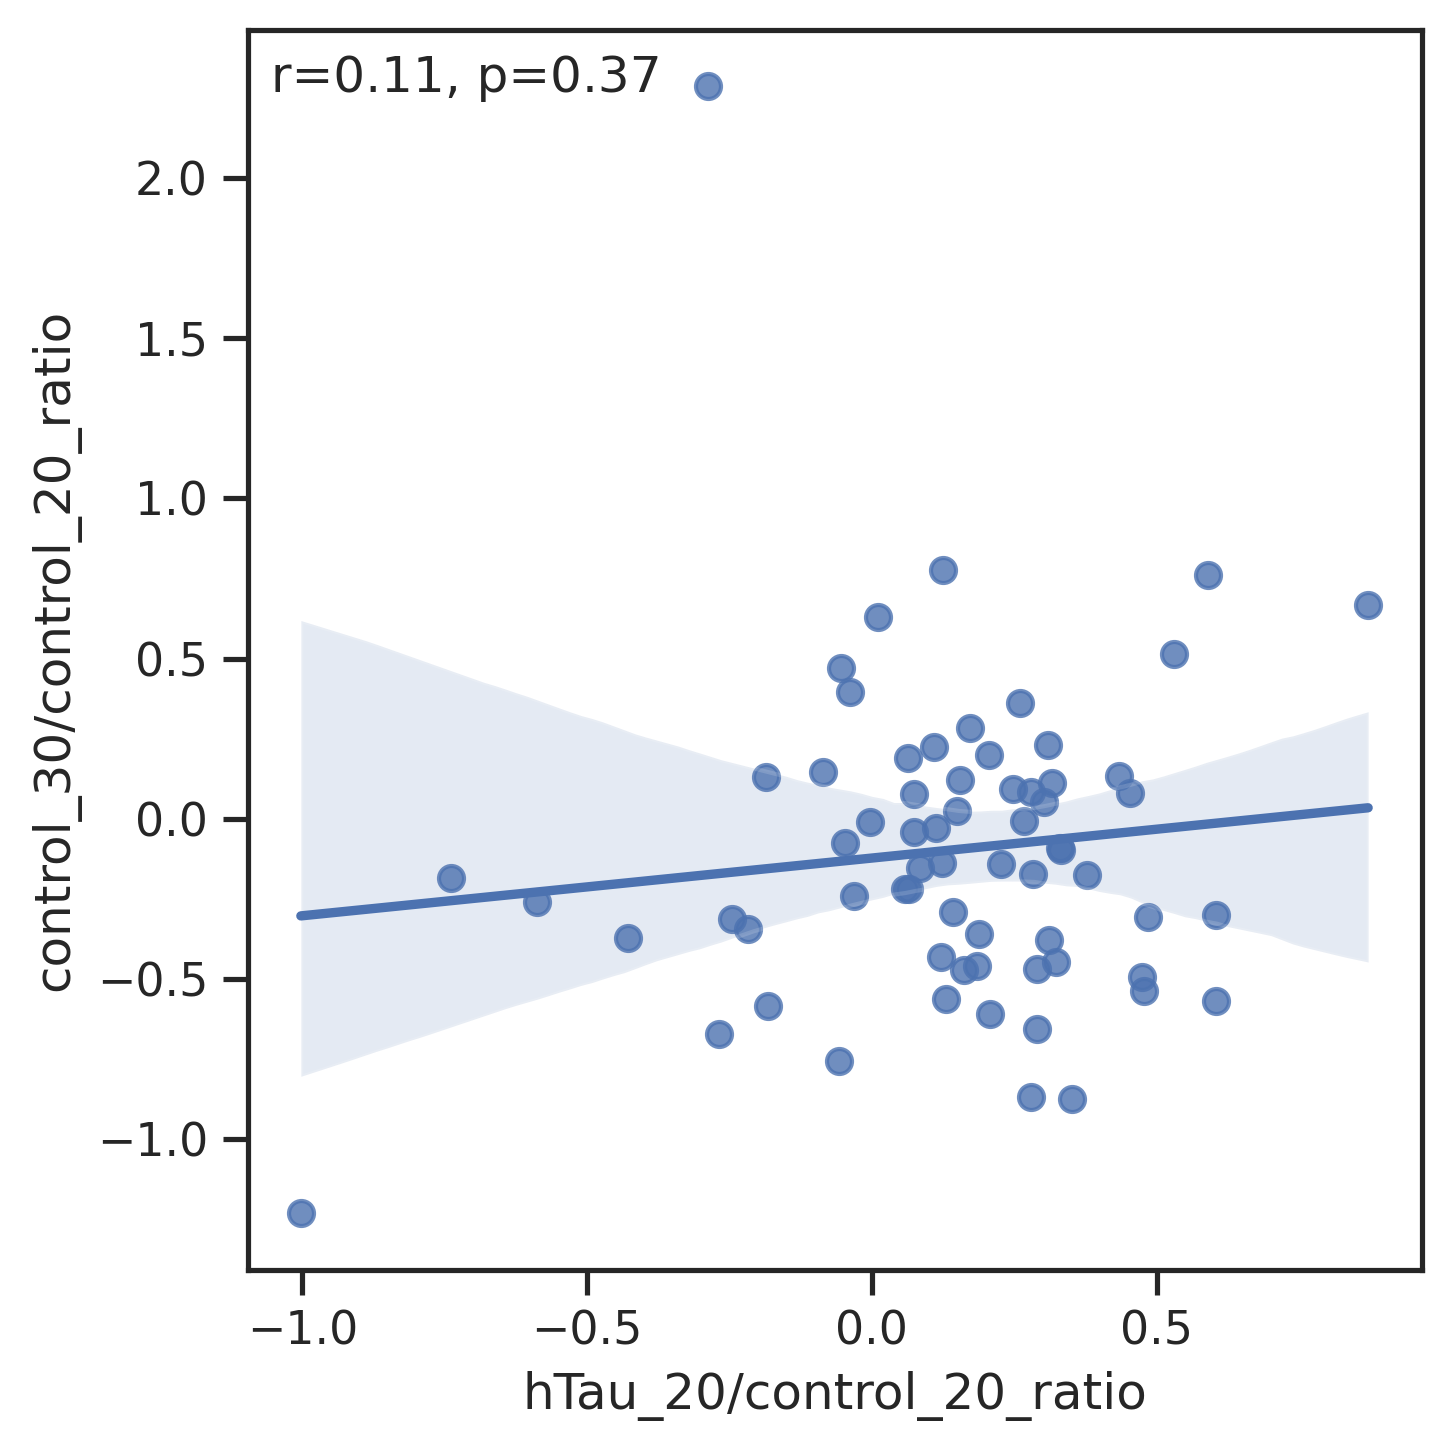

In [91]:
with rc_context({'figure.figsize': (5, 5)}):
    g = sns.regplot(x="hTau_20/control_20_ratio", y="control_30/control_20_ratio", data=normalRatio_Df_head)
    # g = sns.lmplot(x="hTau_20/control_20", y="control_30/control_20", data=umiN_mtx_body)
    r, p = stats.pearsonr(normalRatio_Df_head["hTau_20/control_20_ratio"], normalRatio_Df_head['control_30/control_20_ratio'])
    g.text(.02, .95, f'r={r:.2f}, p={p:.2g}', transform=g.transAxes) #  
    
    plt.tight_layout()
    plt.savefig(f'{figure6PicFolder}/regression_normalRatio_Df_head_correlation_noLabel.pdf', bbox_inches='tight')

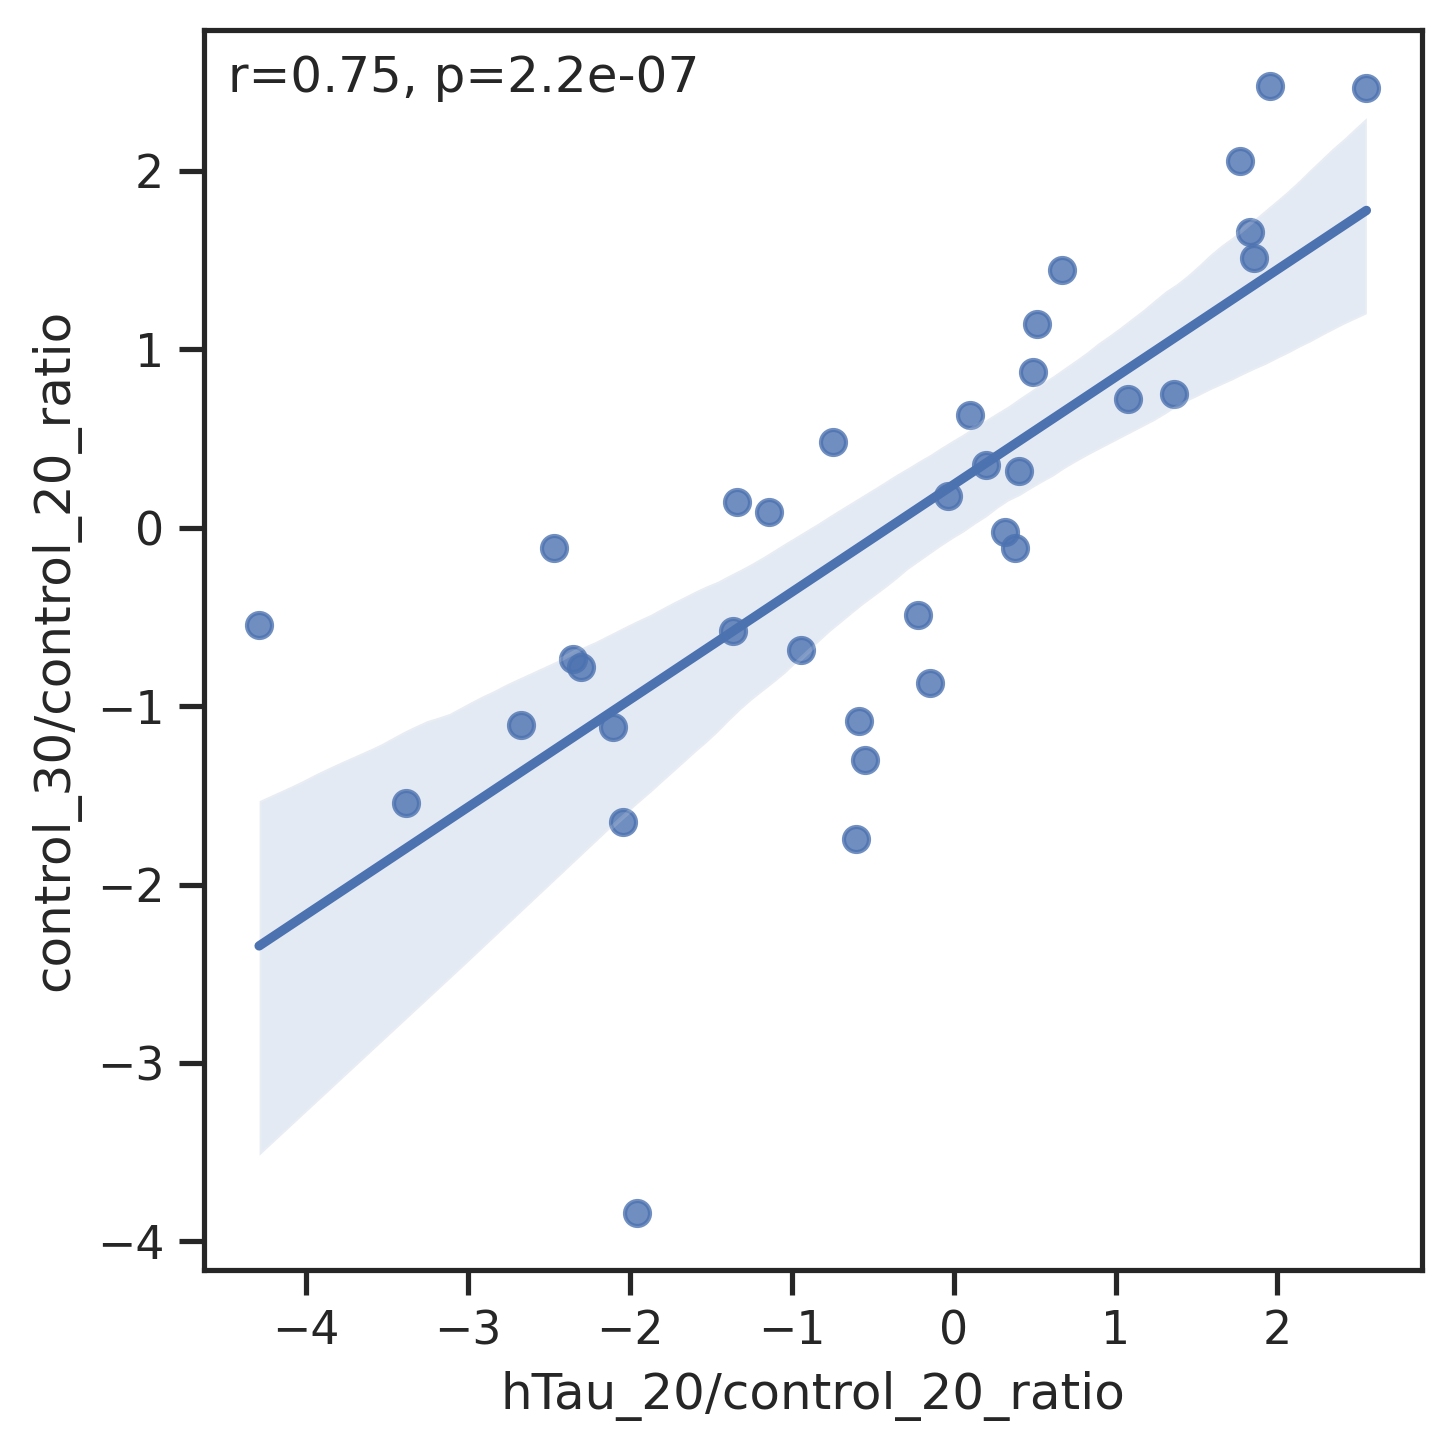

In [92]:
with rc_context({'figure.figsize': (5, 5)}):
    g = sns.regplot(x="hTau_20/control_20_ratio", y="control_30/control_20_ratio", data=normalRatio_Df_body)
    # g = sns.lmplot(x="hTau_20/control_20", y="control_30/control_20", data=umiN_mtx_body)
    r, p = stats.pearsonr(normalRatio_Df_body["hTau_20/control_20_ratio"], normalRatio_Df_body['control_30/control_20_ratio'])
    g.text(.02, .95, f'r={r:.2f}, p={p:.2g}', transform=g.transAxes) #  

    plt.tight_layout()
    plt.savefig(f'{figure6PicFolder}/regression_normalRatio_Df_body_correlation_noLabel.pdf', bbox_inches='tight')

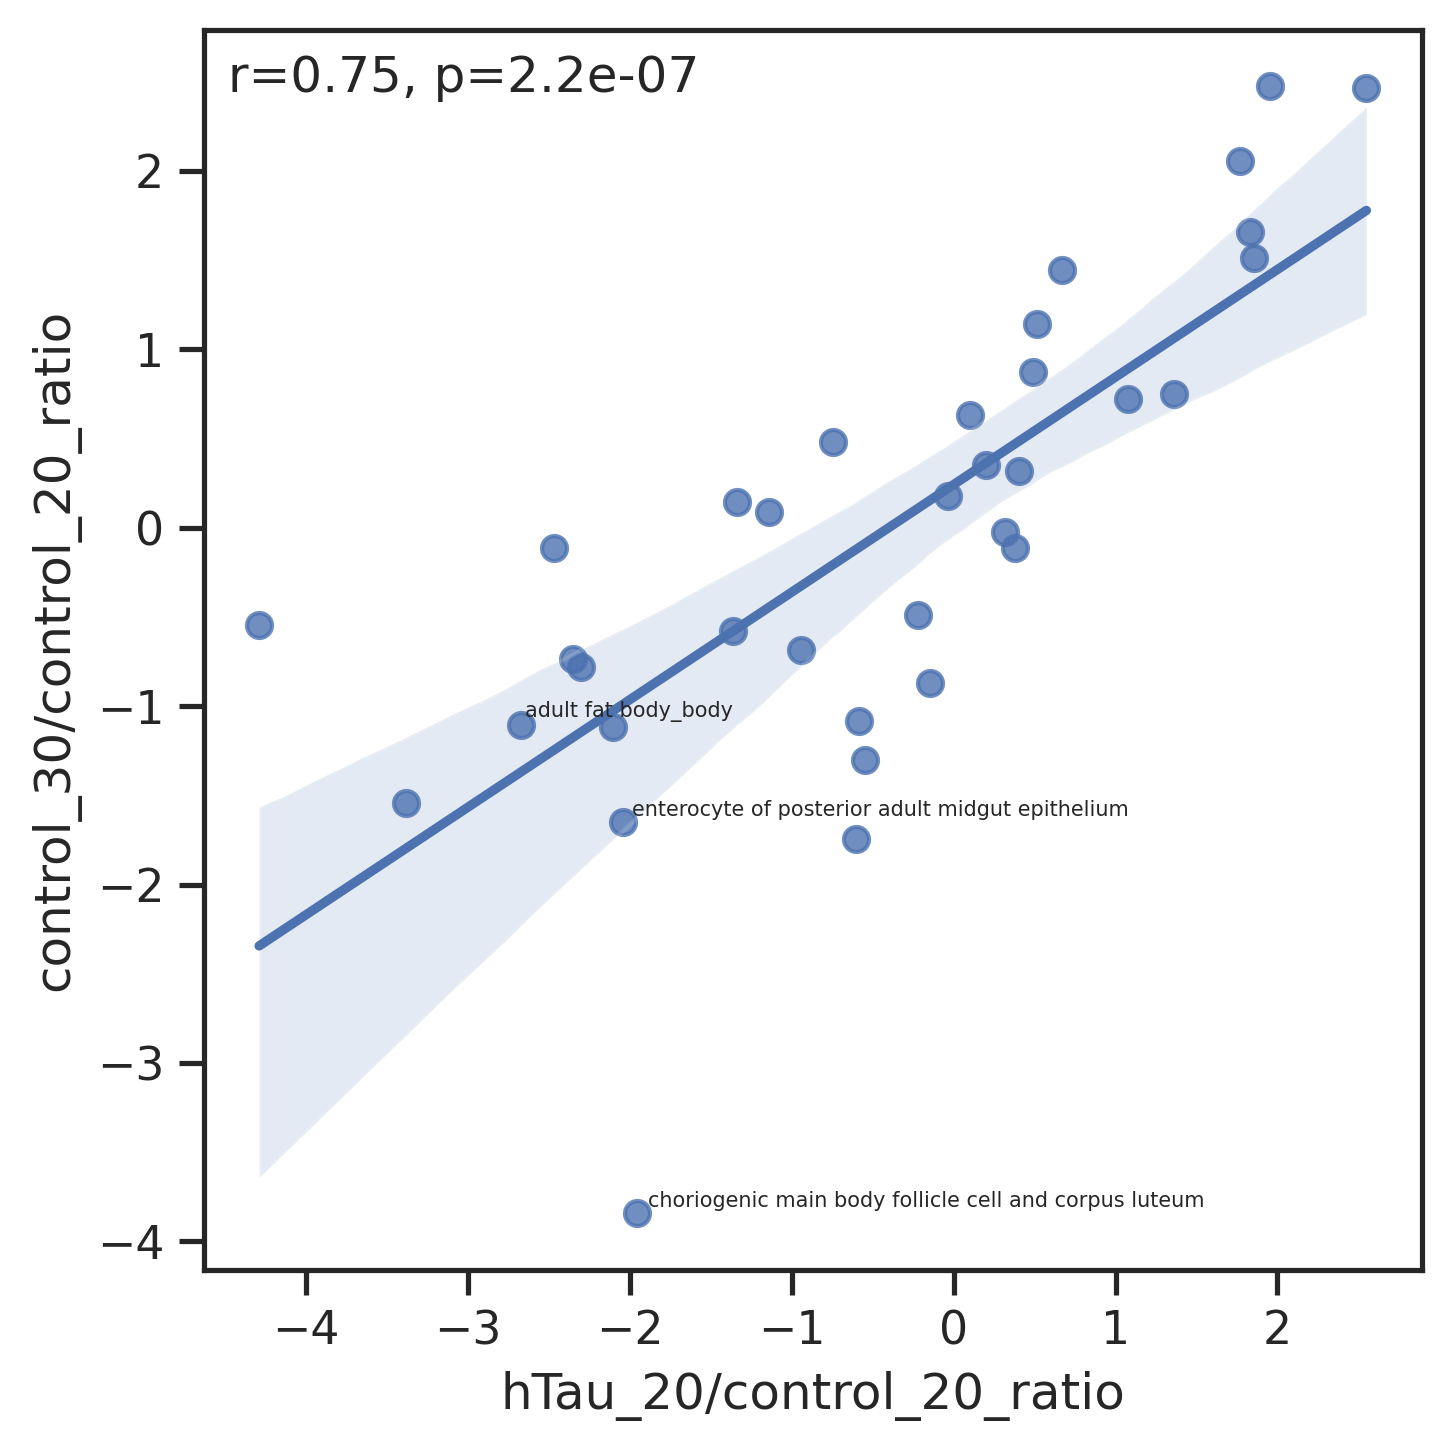

In [93]:
with rc_context({'figure.figsize': (5, 5)}):
    g = sns.regplot(x="hTau_20/control_20_ratio", y="control_30/control_20_ratio", data=normalRatio_Df_body)
    # g = sns.lmplot(x="hTau_20/control_20", y="control_30/control_20", data=umiN_mtx_body)
    r, p = stats.pearsonr(normalRatio_Df_body["hTau_20/control_20_ratio"], normalRatio_Df_body['control_30/control_20_ratio'])

    g.text(.02, .95, f'r={r:.2f}, p={p:.2g}', transform=g.transAxes) #  


    texts = [plt.text(x=normalRatio_Df_body['hTau_20/control_20_ratio'][n], y=normalRatio_Df_body['control_30/control_20_ratio'][n], s=normalRatio_Df_body.index[n], fontsize=5) 
             for n, cellType in enumerate(normalRatio_Df_body.index) 
             if cellType in ['enterocyte of posterior adult midgut epithelium', 'choriogenic main body follicle cell and corpus luteum', 'adult fat body_body']]
    adjust_text(texts, )
    plt.tight_layout()
    plt.savefig(f'{figure6PicFolder}/regression_normalRatio_Df_body_correlation.pdf', bbox_inches='tight')

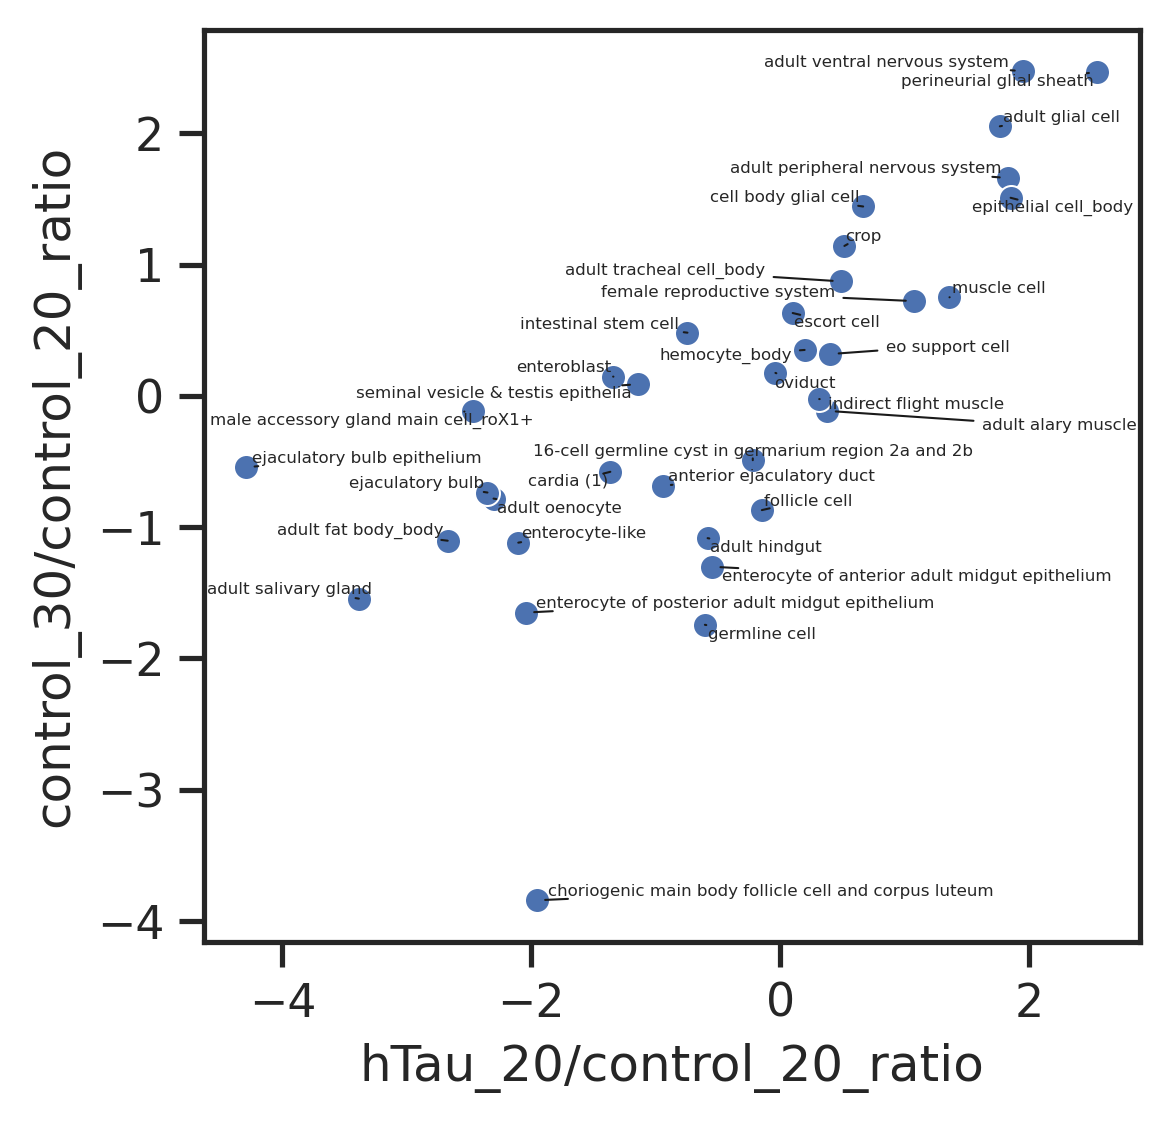

In [94]:
sns.scatterplot(data=normalRatio_Df_body, x="hTau_20/control_20_ratio", y="control_30/control_20_ratio")
texts = [plt.text(x=normalRatio_Df_body['hTau_20/control_20_ratio'][n], y=normalRatio_Df_body['control_30/control_20_ratio'][n], s=normalRatio_Df_body.index[n], fontsize=4) 
         for n, cellType in enumerate(normalRatio_Df_body.index)]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5) ) # arrowprops=dict(arrowstyle='->', color='red') # arrowprops=dict(arrowstyle="-", color='k', lw=0.5)
plt.show()

### correlation heatmap

In [95]:
normalRatio_Df_head = pd.read_csv(f'{figure6Folder}/cellN/head_normalRatio_Df.csv', index_col=0).iloc[:,1:]
normalRatio_Df_body = pd.read_csv(f'{figure6Folder}/cellN/body_normalRatio_Df.csv', index_col=0).iloc[:,1:]
# normalRatio_Df_body

In [96]:
### body correlation
corr = normalRatio_Df_body.corr(method = 'spearman').round(2)
corr

AB42_10/control_10_ratio  \
AB42_10/control_10_ratio                         1.00   
AB42_20/control_20_ratio                         0.15   
hTau_20/control_20_ratio                        -0.02   
hTau_30/control_30_ratio                         0.02   
control_20/control_10_ratio                      0.21   
control_30/control_20_ratio                     -0.19   

                             AB42_20/control_20_ratio  \
AB42_10/control_10_ratio                         0.15   
AB42_20/control_20_ratio                         1.00   
hTau_20/control_20_ratio                         0.29   
hTau_30/control_30_ratio                         0.01   
control_20/control_10_ratio                     -0.50   
control_30/control_20_ratio                      0.25   

                             hTau_20/control_20_ratio  \
AB42_10/control_10_ratio                        -0.02   
AB42_20/control_20_ratio                         0.29   
hTau_20/control_20_ratio                         1.00   
hTau_30/control_30_ratio                        -0.19   
control_20/control_10_ratio                     -0.33   
control_30/control_20_ratio                      0.81   

                             hTau_30/control_30_ratio  \
AB42_10/control_10_ratio                         0.02   
AB42_20/control_20_ratio                         0.01   
hTau_20/control_20_ratio                        -0.19   
hTau_30/control_30_ratio                         1.00   
control_20/control_10_ratio                     -0.03   
control_30/control_20_ratio                     -0.47   

                             control_20/control_10_ratio  \
AB42_10/control_10_ratio                            0.21   
AB42_20/control_20_ratio                           -0.50   
hTau_20/control_20_ratio                           -0.33   
hTau_30/control_30_ratio                           -0.03   
control_20/control_10_ratio                         1.00   
control_30/control_20_ratio                        -0.44   

                             control_30/control_20_ratio  
AB42_10/control_10_ratio                           -0.19  
AB42_20/control_20_ratio                            0.25  
hTau_20/control_20_ratio                            0.81  
hTau_30/control_30_ratio                           -0.47  
control_20/control_10_ratio                        -0.44  
control_30/control_20_ratio                         1.00

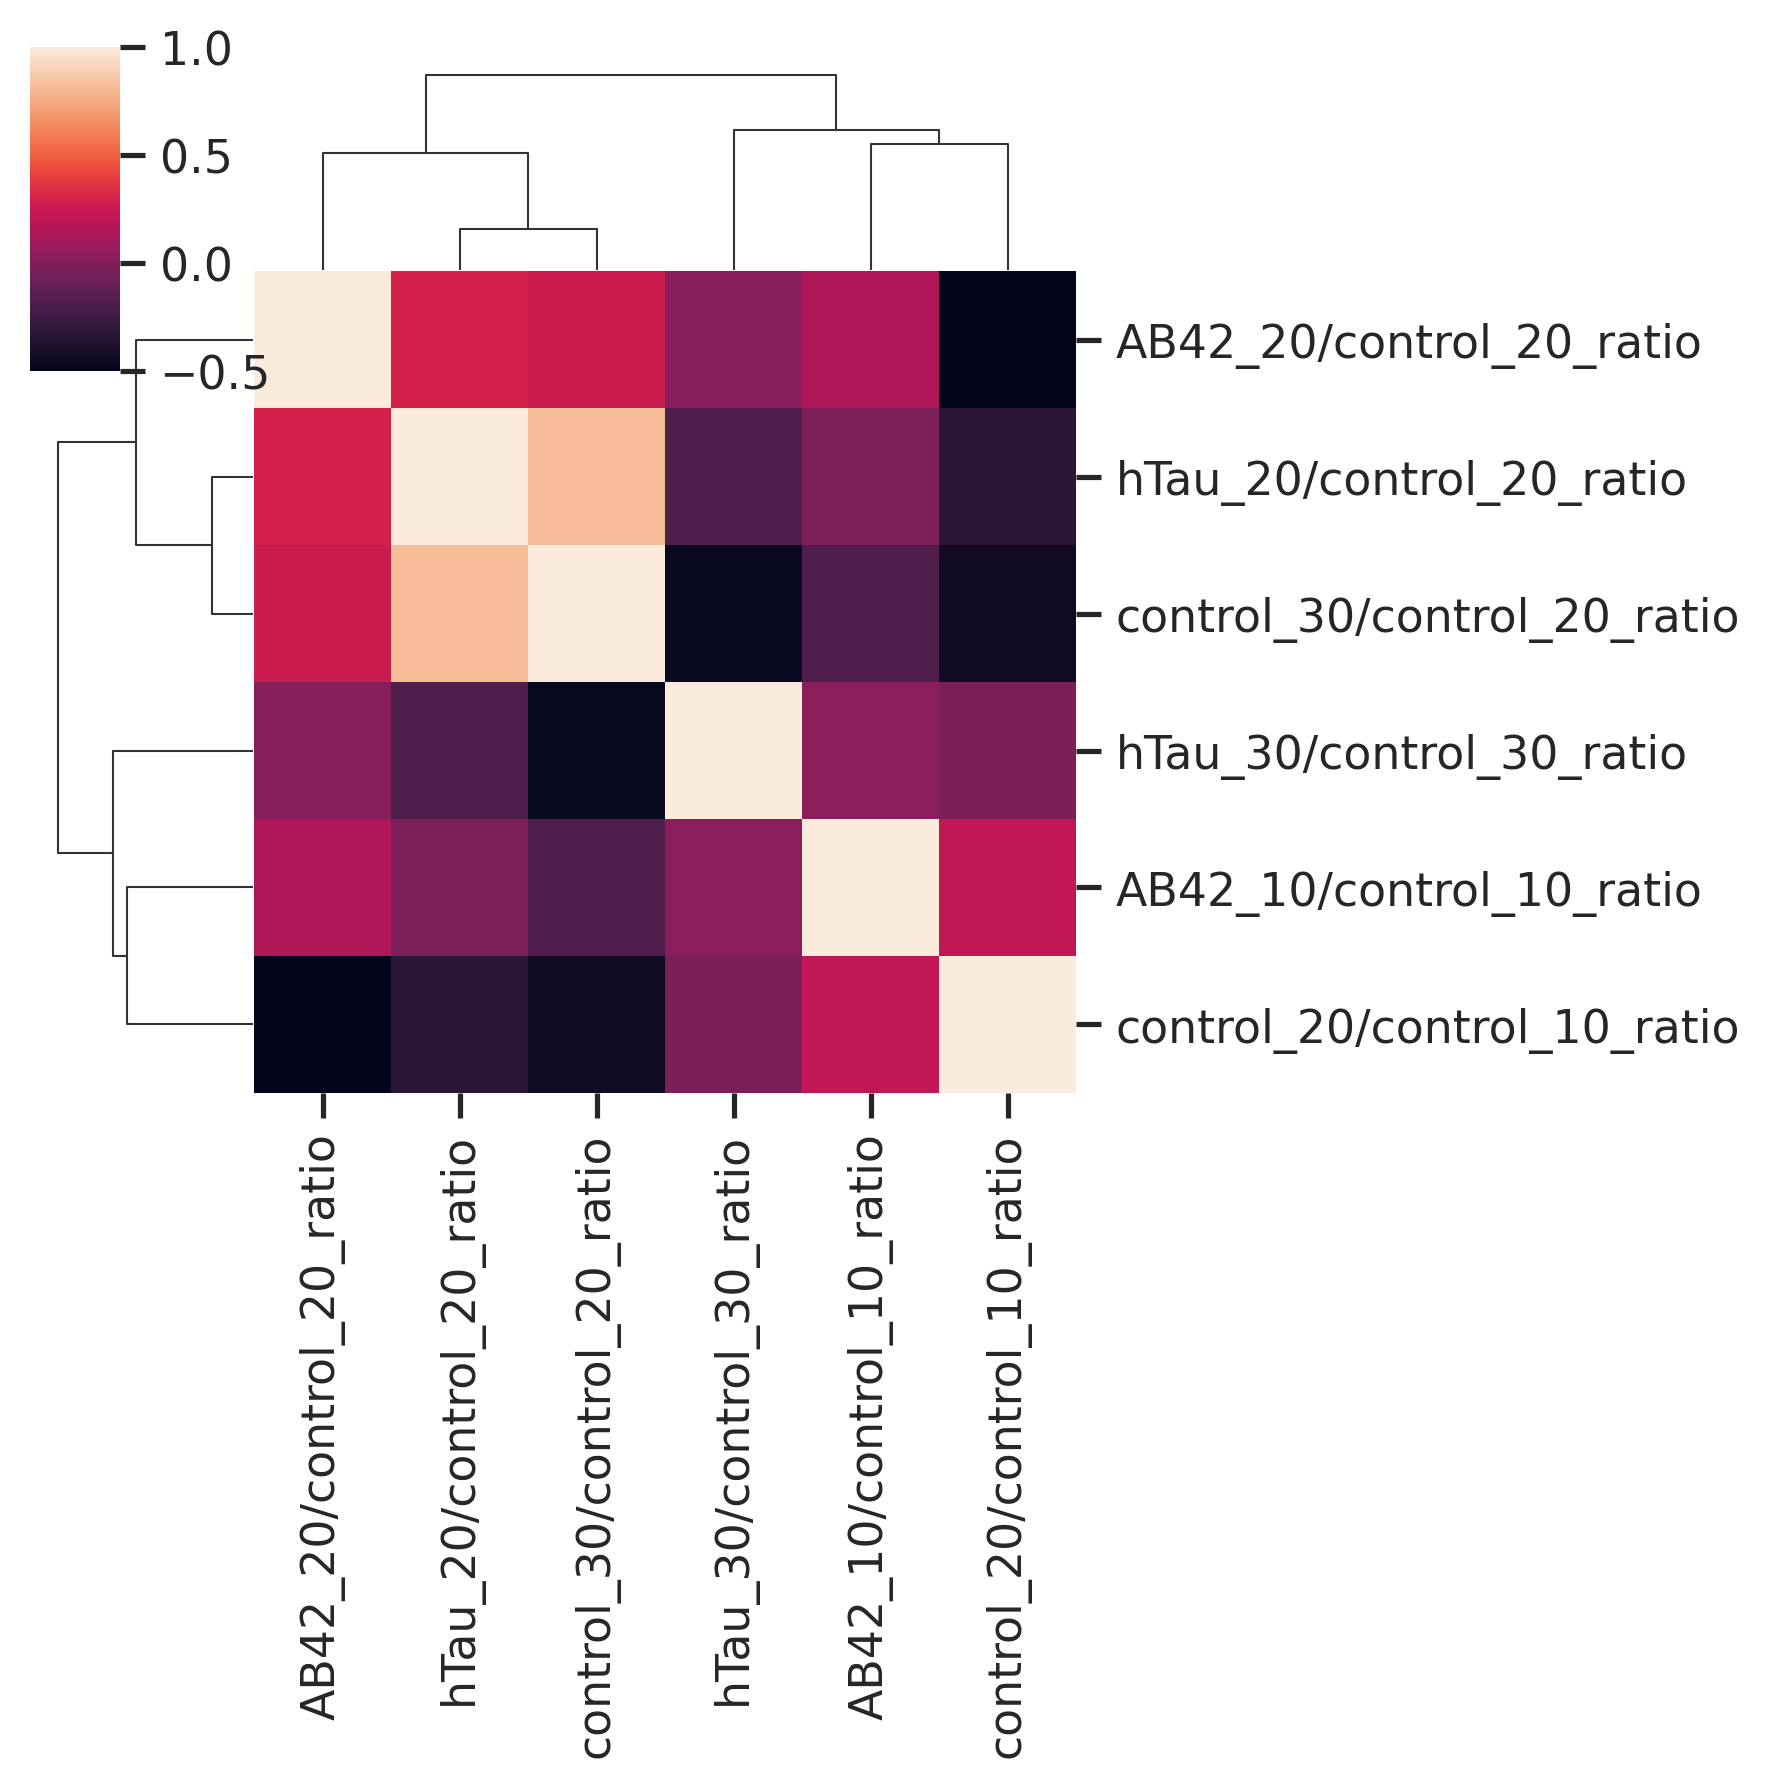

In [97]:
sns.clustermap(corr, figsize=(6, 6), annot=False)
plt.savefig(f'{figure6PicFolder}/heatmap_nucleiRatio_normalRatio_Df_body.pdf', bbox_inches='tight')
plt.show()

In [98]:
### head correlation
corr = normalRatio_Df_head.corr(method = 'spearman').round(2)
corr

AB42_10/control_10_ratio  \
AB42_10/control_10_ratio                         1.00   
AB42_20/control_20_ratio                         0.10   
hTau_20/control_20_ratio                        -0.17   
hTau_30/control_30_ratio                         0.04   
control_20/control_10_ratio                      0.29   
control_30/control_20_ratio                     -0.01   

                             AB42_20/control_20_ratio  \
AB42_10/control_10_ratio                         0.10   
AB42_20/control_20_ratio                         1.00   
hTau_20/control_20_ratio                         0.31   
hTau_30/control_30_ratio                         0.37   
control_20/control_10_ratio                     -0.75   
control_30/control_20_ratio                     -0.42   

                             hTau_20/control_20_ratio  \
AB42_10/control_10_ratio                        -0.17   
AB42_20/control_20_ratio                         0.31   
hTau_20/control_20_ratio                         1.00   
hTau_30/control_30_ratio                         0.20   
control_20/control_10_ratio                     -0.48   
control_30/control_20_ratio                      0.02   

                             hTau_30/control_30_ratio  \
AB42_10/control_10_ratio                         0.04   
AB42_20/control_20_ratio                         0.37   
hTau_20/control_20_ratio                         0.20   
hTau_30/control_30_ratio                         1.00   
control_20/control_10_ratio                     -0.49   
control_30/control_20_ratio                     -0.56   

                             control_20/control_10_ratio  \
AB42_10/control_10_ratio                            0.29   
AB42_20/control_20_ratio                           -0.75   
hTau_20/control_20_ratio                           -0.48   
hTau_30/control_30_ratio                           -0.49   
control_20/control_10_ratio                         1.00   
control_30/control_20_ratio                         0.44   

                             control_30/control_20_ratio  
AB42_10/control_10_ratio                           -0.01  
AB42_20/control_20_ratio                           -0.42  
hTau_20/control_20_ratio                            0.02  
hTau_30/control_30_ratio                           -0.56  
control_20/control_10_ratio                         0.44  
control_30/control_20_ratio                         1.00

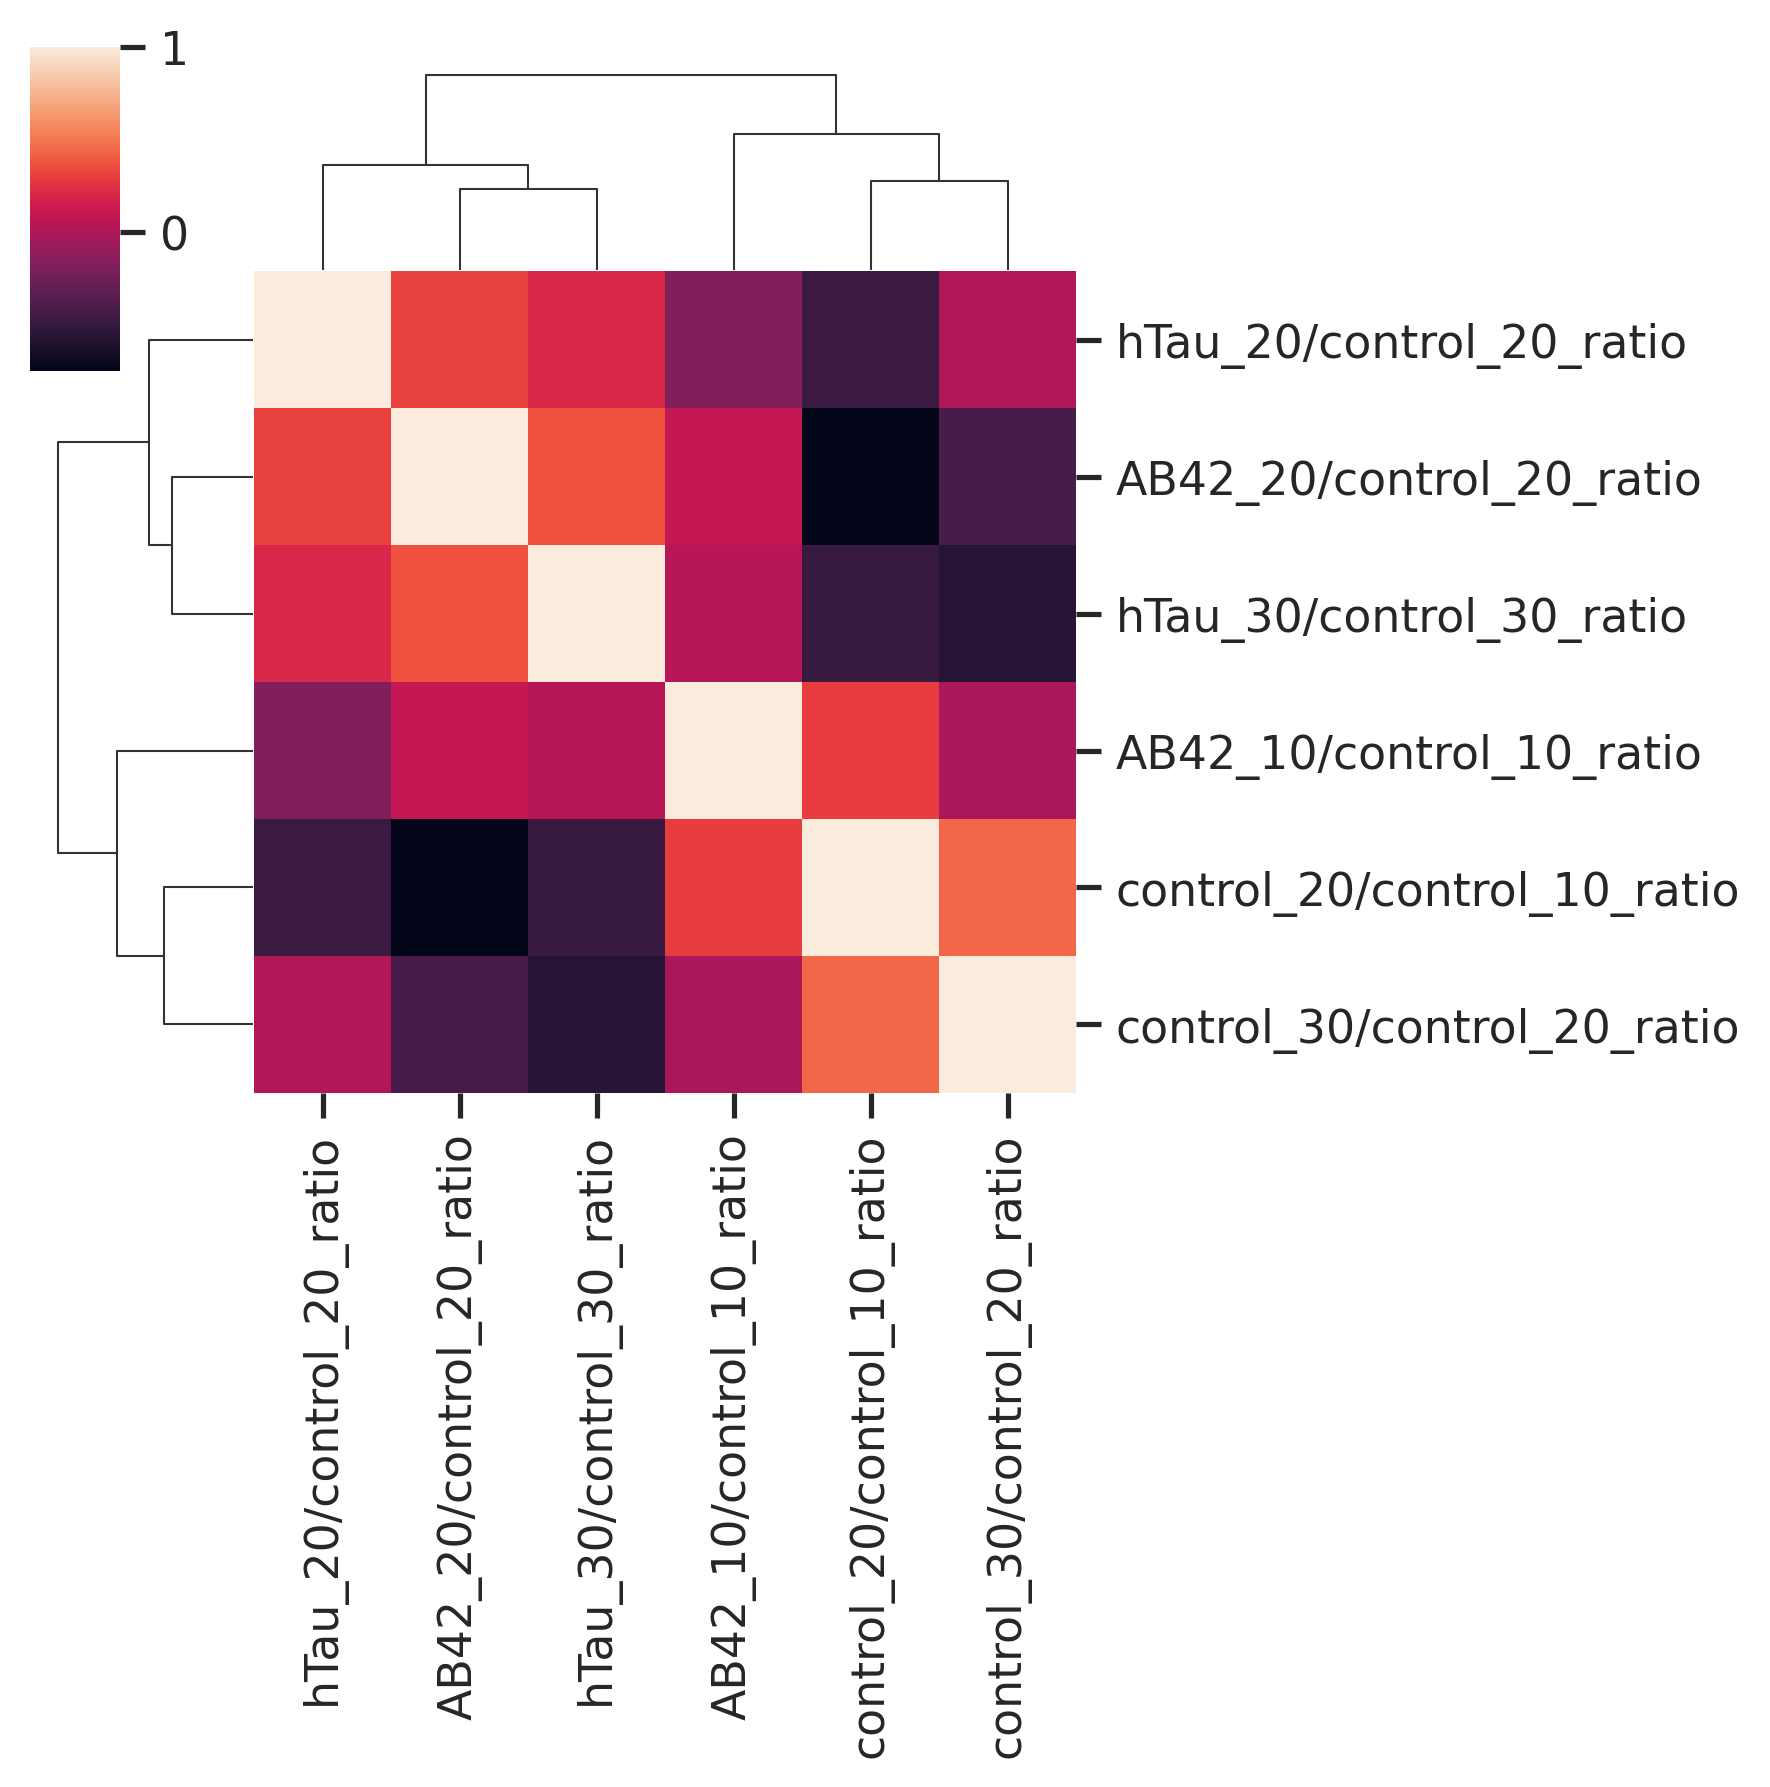

In [99]:
sns.clustermap(corr, figsize=(6, 6), annot=False)
plt.savefig(f'{figure6PicFolder}/heatmap_nucleiRatio_normalRatio_Df_head.pdf', bbox_inches='tight')
plt.show()

# Finish